# 1.确定套利对

对于以下套利对做 ADFtest 和 Cointegration Test 

 玉米(C) - 淀粉(CS) ; 
 
 焦炭(J) - 焦煤(JM);

 豆油(Y) - 豆粕(M);

 螺纹钢(RB) - 热卷(HC)  

 铜(CU) - 铝(AL)

In [2]:
import pandas as pd

preadjust_data = '../data/1d_2017to2024_preadjust.h5'
noadjust_data = '../data/1d_2017to2024_noadjust.h5'

# 查看文件中的所有键（可选）
with pd.HDFStore(noadjust_data, mode='r') as store:
    keys = store.keys()
    print(f"文件中的所有键: {keys}")

文件中的所有键: ['/A', '/AG', '/AL', '/AO', '/AP', '/AU', '/B', '/BB', '/BC', '/BR', '/BU', '/C', '/CF', '/CJ', '/CS', '/CU', '/CY', '/EB', '/EC', '/EG', '/FB', '/FG', '/FU', '/HC', '/I', '/IC', '/IF', '/IH', '/IM', '/J', '/JD', '/JM', '/JR', '/L', '/LC', '/LG', '/LH', '/LR', '/LU', '/M', '/MA', '/NI', '/NR', '/OI', '/P', '/PB', '/PF', '/PG', '/PK', '/PM', '/PP', '/PR', '/PS', '/PX', '/RB', '/RI', '/RM', '/RR', '/RS', '/RU', '/SA', '/SC', '/SF', '/SH', '/SI', '/SM', '/SN', '/SP', '/SR', '/SS', '/T', '/TA', '/TF', '/TL', '/TS', '/UR', '/V', '/WH', '/WR', '/Y', '/ZC', '/ZN']


In [202]:
# List of commodity keys
keys_to_extract = ['/C', '/FG', '/V', '/CS', '/RM', '/OI', '/J', '/JM', '/Y', '/M', '/HC', '/RB', 
                   '/CU', '/AL', '/ZN','/EG', '/NI', '/PP', '/MA', '/ZC','/RU','/AG', '/L', '/PP', 
                   '/SC', '/TA', '/CF','/SR', '/FU', '/BC', '/P', '/I', '/M', '/A']

# Dictionary to store merged results
dataframes = {}

for key in keys_to_extract:
    # Load no-adjusted and pre-adjusted data
    df_noadj = pd.read_hdf(noadjust_data, key).reset_index()
    df_preadj = pd.read_hdf(preadjust_data, key).reset_index()

    # Extract and rename 'open' and 'close' from preadjusted data
    cols_to_add = {}
    if 'open' in df_preadj.columns:
        cols_to_add['adj_open'] = df_preadj['open']
    if 'close' in df_preadj.columns:
        cols_to_add['adj_close'] = df_preadj['close']

    df_adj = pd.DataFrame(cols_to_add)
    df_adj['date'] = df_preadj['date']  # Ensure merge key exists

    # Merge with noadjust data on 'date'
    merged_df = pd.merge(df_noadj, df_adj, on='date', how='left')

    dataframes[key] = merged_df
    print(f"Merged DataFrame for {key} created and stored.")

Merged DataFrame for /C created and stored.
Merged DataFrame for /FG created and stored.
Merged DataFrame for /V created and stored.
Merged DataFrame for /CS created and stored.
Merged DataFrame for /RM created and stored.
Merged DataFrame for /OI created and stored.
Merged DataFrame for /J created and stored.
Merged DataFrame for /JM created and stored.
Merged DataFrame for /Y created and stored.
Merged DataFrame for /M created and stored.
Merged DataFrame for /HC created and stored.
Merged DataFrame for /RB created and stored.
Merged DataFrame for /CU created and stored.
Merged DataFrame for /AL created and stored.
Merged DataFrame for /ZN created and stored.
Merged DataFrame for /EG created and stored.
Merged DataFrame for /NI created and stored.
Merged DataFrame for /PP created and stored.
Merged DataFrame for /MA created and stored.
Merged DataFrame for /ZC created and stored.
Merged DataFrame for /RU created and stored.
Merged DataFrame for /AG created and stored.
Merged DataFram

In [4]:
print(dataframes['/RU'].tail())

     underlying_symbol       date dominant_id     open    close     high  \
1938                RU 2024-12-25      RU2505  17660.0  17705.0  17785.0   
1939                RU 2024-12-26      RU2505  17730.0  17505.0  17730.0   
1940                RU 2024-12-27      RU2505  17535.0  17645.0  17745.0   
1941                RU 2024-12-30      RU2505  17705.0  17885.0  17930.0   
1942                RU 2024-12-31      RU2505  17910.0  17820.0  17915.0   

          low  total_turnover    volume  prev_close  settlement  \
1938  17540.0    7.242940e+10  409615.0     17625.0     17680.0   
1939  17500.0    6.273864e+10  356019.0     17705.0     17620.0   
1940  17450.0    7.265363e+10  412738.0     17505.0     17600.0   
1941  17535.0    9.004267e+10  507619.0     17645.0     17735.0   
1942  17745.0    5.769097e+10  323837.0     17885.0     17810.0   

      prev_settlement  open_interest  limit_up  limit_down  day_session_open  \
1938          17520.0       204518.0   18570.0     16465.0  

## ADF Test

In [5]:
## ADF test

from statsmodels.tsa.stattools import adfuller

# ADF Test function
def adf_test(series, title=''):
    print(f'ADF Test: {title}')
    
    # Perform ADF test on the original series
    result = adfuller(series, autolag='AIC')
    
    # Print ADF test statistics, p-value and 5% critical value
    print(f"ADF Test Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print(f"Critical Value (1%): {result[4]['1%']:.4f}")
    print(f"Critical Value (5%): {result[4]['5%']:.4f}")
    
    # Check if the series is stationary
    if result[1] <= 0.05:
        print('Result: Stationary\n')
    else:
        print('Result: Non-Stationary\n')
        
        # Perform ADF test on the first difference of the series
        series_diff = series.diff().dropna()
        result_diff = adfuller(series_diff, autolag='AIC')
        print(f"ADF Test Statistic (First Difference): {result_diff[0]:.4f}")
        print(f"p-value: {result_diff[1]:.4f}")
        print(f"Critical Value (1%): {result[4]['1%']:.4f}")
        print(f"Critical Value (5%): {result[4]['5%']:.4f}")
        
        # Check if the differenced series is stationary
        if result_diff[1] <= 0.05:
            print('Result: Stationary\n')
        else:
            print('Result: Non-Stationary\n')

In [6]:
# ADF test for CU and AL
adf_test(dataframes['/CU']['close'], '铜(CU)')
adf_test(dataframes['/AL']['close'], '铝(AL)')

ADF Test: 铜(CU)
ADF Test Statistic: -1.2683
p-value: 0.6435
Critical Value (1%): -3.4337
Critical Value (5%): -2.8630
Result: Non-Stationary

ADF Test Statistic (First Difference): -29.7603
p-value: 0.0000
Critical Value (1%): -3.4337
Critical Value (5%): -2.8630
Result: Stationary

ADF Test: 铝(AL)
ADF Test Statistic: -1.4575
p-value: 0.5544
Critical Value (1%): -3.4338
Critical Value (5%): -2.8630
Result: Non-Stationary

ADF Test Statistic (First Difference): -9.1205
p-value: 0.0000
Critical Value (1%): -3.4338
Critical Value (5%): -2.8630
Result: Stationary



In [7]:
# ADF test for C and CS
adf_test(dataframes['/C']['close'], 'C(玉米)')
adf_test(dataframes['/CS']['close'], 'CS(淀粉)')

ADF Test: C(玉米)
ADF Test Statistic: -1.7429
p-value: 0.4091
Critical Value (1%): -3.4337
Critical Value (5%): -2.8630
Result: Non-Stationary

ADF Test Statistic (First Difference): -43.7230
p-value: 0.0000
Critical Value (1%): -3.4337
Critical Value (5%): -2.8630
Result: Stationary

ADF Test: CS(淀粉)
ADF Test Statistic: -1.9205
p-value: 0.3225
Critical Value (1%): -3.4337
Critical Value (5%): -2.8630
Result: Non-Stationary

ADF Test Statistic (First Difference): -16.3245
p-value: 0.0000
Critical Value (1%): -3.4337
Critical Value (5%): -2.8630
Result: Stationary



In [8]:
# ADF test for J and JM
adf_test(dataframes['/J']['close'], 'J(焦炭)')
adf_test(dataframes['/JM']['close'], 'JM(焦煤)')

ADF Test: J(焦炭)
ADF Test Statistic: -2.4189
p-value: 0.1365
Critical Value (1%): -3.4338
Critical Value (5%): -2.8630
Result: Non-Stationary

ADF Test Statistic (First Difference): -10.7907
p-value: 0.0000
Critical Value (1%): -3.4338
Critical Value (5%): -2.8630
Result: Stationary

ADF Test: JM(焦煤)
ADF Test Statistic: -2.2102
p-value: 0.2026
Critical Value (1%): -3.4338
Critical Value (5%): -2.8630
Result: Non-Stationary

ADF Test Statistic (First Difference): -9.5702
p-value: 0.0000
Critical Value (1%): -3.4338
Critical Value (5%): -2.8630
Result: Stationary



In [9]:
# ADF test for Y and M
adf_test(dataframes['/Y']['close'], 'Y(豆油)')
adf_test(dataframes['/M']['close'], 'M(豆粕)')

ADF Test: Y(豆油)
ADF Test Statistic: -1.3837
p-value: 0.5901
Critical Value (1%): -3.4338
Critical Value (5%): -2.8630
Result: Non-Stationary

ADF Test Statistic (First Difference): -10.3403
p-value: 0.0000
Critical Value (1%): -3.4338
Critical Value (5%): -2.8630
Result: Stationary

ADF Test: M(豆粕)
ADF Test Statistic: -2.1366
p-value: 0.2301
Critical Value (1%): -3.4337
Critical Value (5%): -2.8630
Result: Non-Stationary

ADF Test Statistic (First Difference): -26.2735
p-value: 0.0000
Critical Value (1%): -3.4337
Critical Value (5%): -2.8630
Result: Stationary



In [10]:
# ADF test for RB and HC
adf_test(dataframes['/RB']['close'], 'RB(螺纹钢)')
adf_test(dataframes['/HC']['close'], 'HC(热卷)')

ADF Test: RB(螺纹钢)
ADF Test Statistic: -2.6487
p-value: 0.0833
Critical Value (1%): -3.4337
Critical Value (5%): -2.8630
Result: Non-Stationary

ADF Test Statistic (First Difference): -46.0335
p-value: 0.0000
Critical Value (1%): -3.4337
Critical Value (5%): -2.8630
Result: Stationary

ADF Test: HC(热卷)
ADF Test Statistic: -2.2887
p-value: 0.1756
Critical Value (1%): -3.4337
Critical Value (5%): -2.8630
Result: Non-Stationary

ADF Test Statistic (First Difference): -44.3944
p-value: 0.0000
Critical Value (1%): -3.4337
Critical Value (5%): -2.8630
Result: Stationary



## Engle-Granger test & Plot price trend

In [11]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
import matplotlib.pyplot as plt

def plot_price_trends(dataframes, key1, key2, title):

    if key1 in dataframes and key2 in dataframes:
        plt.figure(figsize=(14, 10))
        plt.plot(dataframes[key1]['date'], dataframes[key1]['close'], 
                 label=f'{key1[1:]} Main Contract Price', color='blue')
        plt.plot(dataframes[key2]['date'], dataframes[key2]['close'], 
                 label=f'{key2[1:]} Main Contract Price', color='green')
        plt.title(f'Price Trends for {title}')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.grid(True)
        plt.gcf().patch.set_facecolor('white')
        plt.gca().set_facecolor('white')
        plt.show()

def analyze_cointegration_and_plot(dataframes, pair1, pair2):
    """
    Perform cointegration test, OLS regression, plot price trends, and spread for two price series.
    """
    # Extract the two series for analysis
    series1 = dataframes[pair1]['close']
    series2 = dataframes[pair2]['close']

    # Plot the price trends for both pairs
    plot_price_trends(dataframes, pair1, pair2, f'{pair1[1:]} and {pair2[1:]}')

    # Conduct the cointegration test
    score, p_value, _ = coint(series1, series2)

    print(f"Cointegration test score: {score}")
    print(f"Cointegration test p-value: {p_value}")

    # Conduct OLS regression to find the cointegration coefficient
    X = sm.add_constant(series2)  
    model = sm.OLS(series1, X).fit()  
    print(model.summary())

    # Calculate the spread, considering the intercept
    dataframes['Spread'] = series1 - (model.params[0] + model.params[1] * series2)

    # Plot the spread
    plt.figure(figsize=(14, 7))
    dataframes['Spread'].plot(label='Spread')
    plt.axhline(dataframes['Spread'].mean(), color='red', linestyle='--')
    plt.title(f'Spread between {pair1[1:]} and {pair2[1:]}')
    plt.xlabel('Date')
    plt.ylabel('Spread')
    plt.legend()
    plt.grid(True)
    plt.gcf().patch.set_facecolor('white')
    plt.gca().set_facecolor('white')
    plt.show()


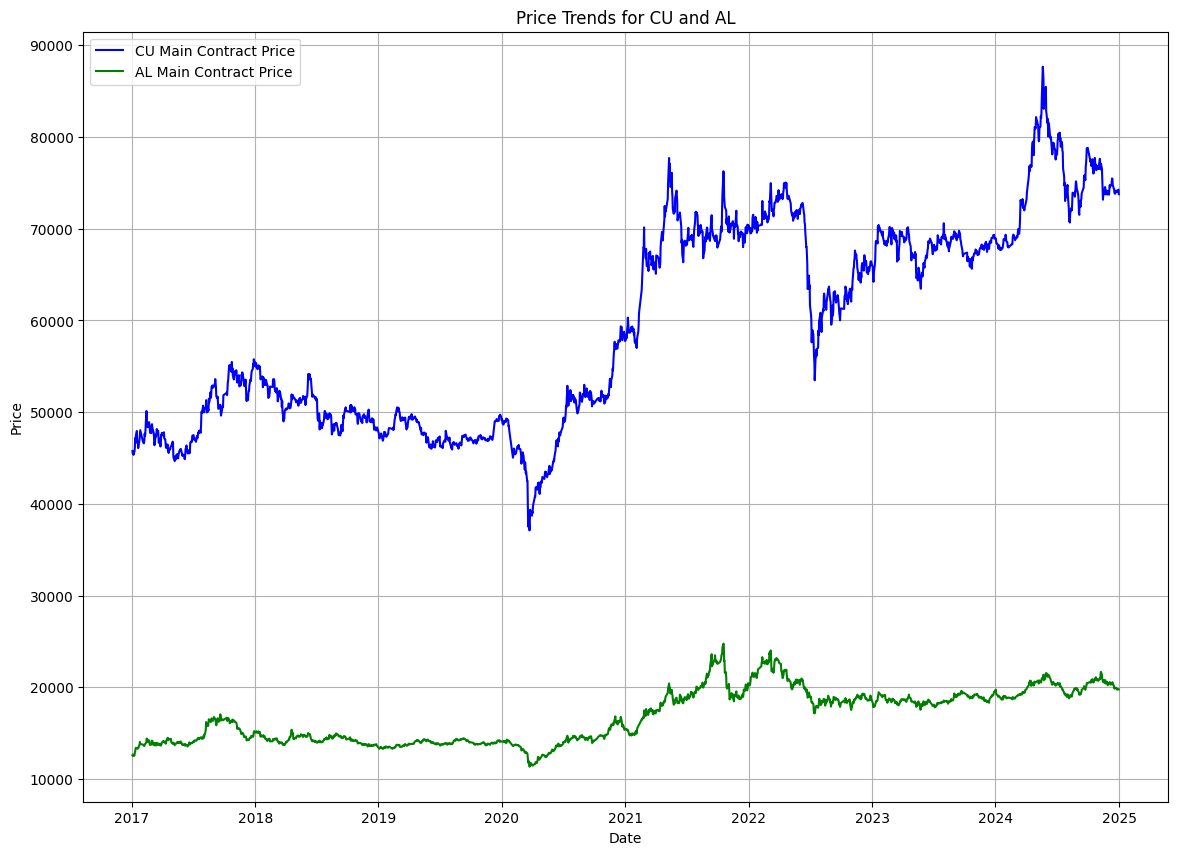

Cointegration test score: -3.878695934543343
Cointegration test p-value: 0.010611431695039714
                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                 1.600e+04
Date:                Sat, 03 May 2025   Prob (F-statistic):               0.00
Time:                        11:46:12   Log-Likelihood:                -18700.
No. Observations:                1943   AIC:                         3.740e+04
Df Residuals:                    1941   BIC:                         3.742e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

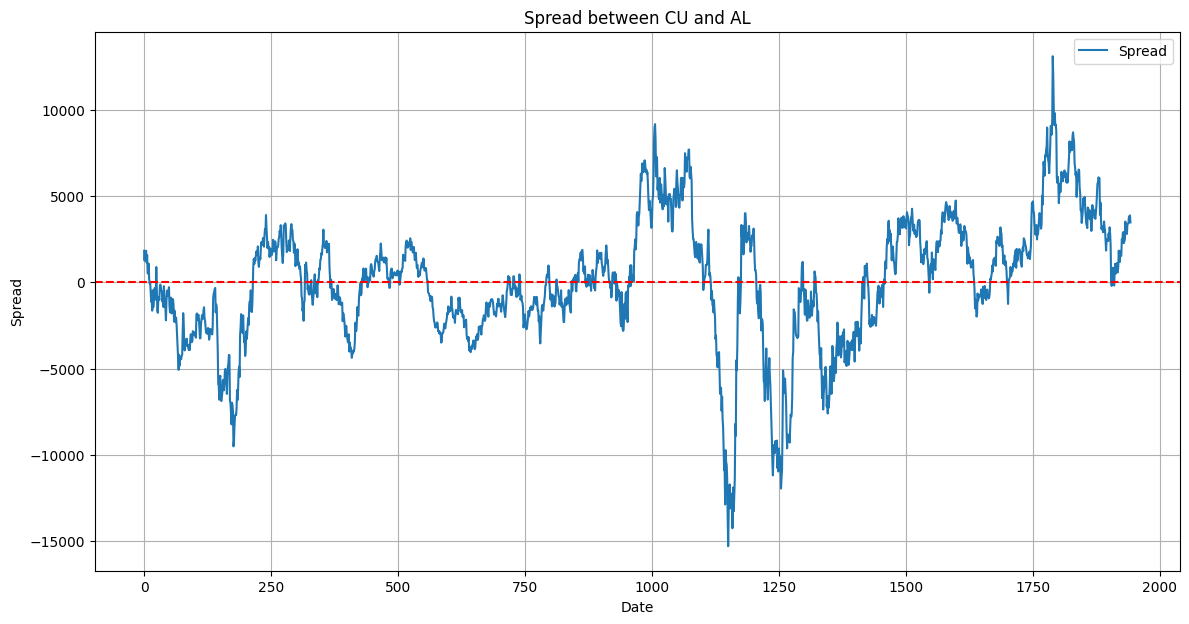

In [12]:
# Test for CU AL
analyze_cointegration_and_plot(dataframes, '/CU', '/AL')

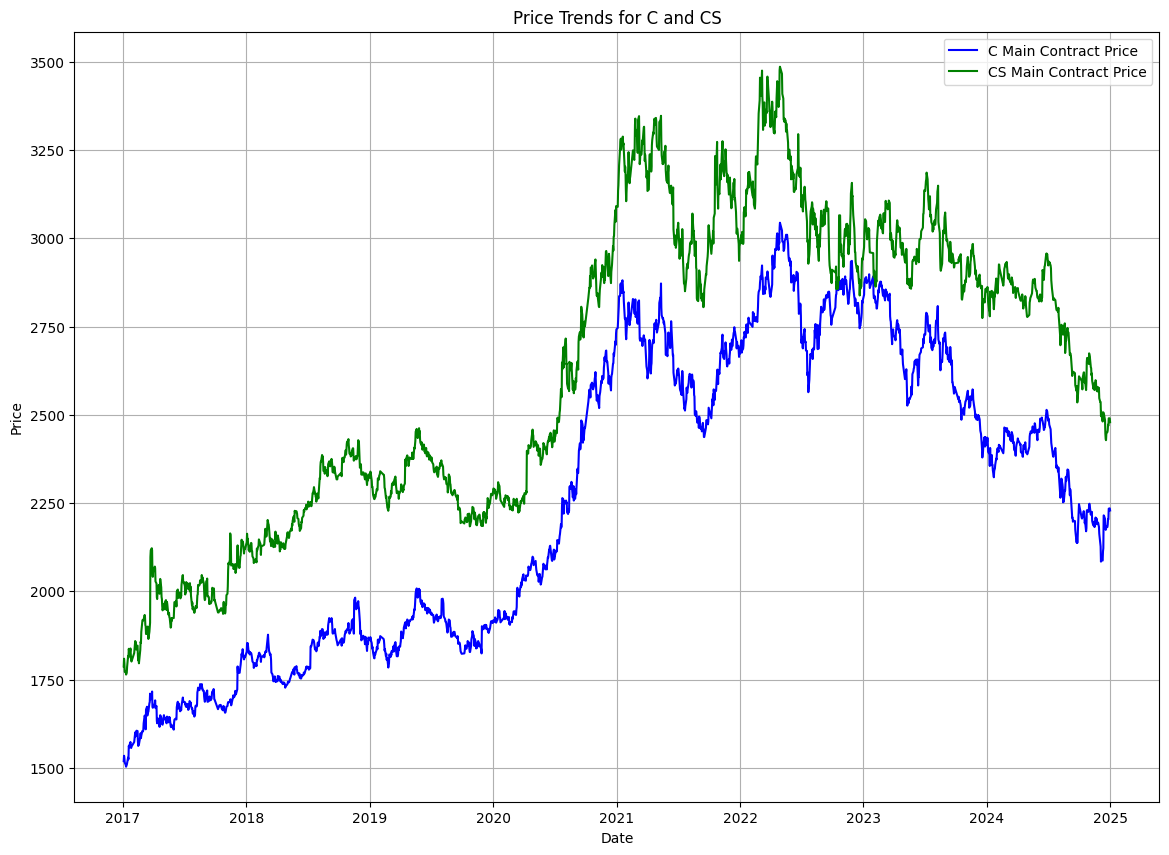

Cointegration test score: -3.443106649932345
Cointegration test p-value: 0.03778323282347284
                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 3.763e+04
Date:                Sat, 03 May 2025   Prob (F-statistic):               0.00
Time:                        11:46:14   Log-Likelihood:                -11597.
No. Observations:                1943   AIC:                         2.320e+04
Df Residuals:                    1941   BIC:                         2.321e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

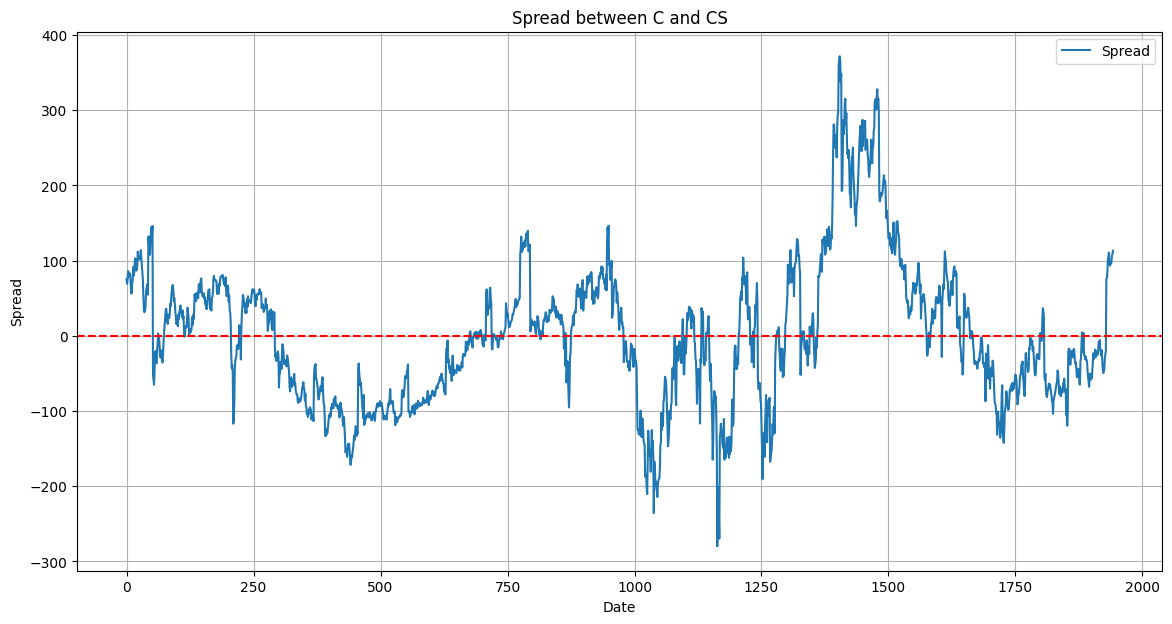

In [13]:
# Test for CS C
analyze_cointegration_and_plot(dataframes, '/C', '/CS')

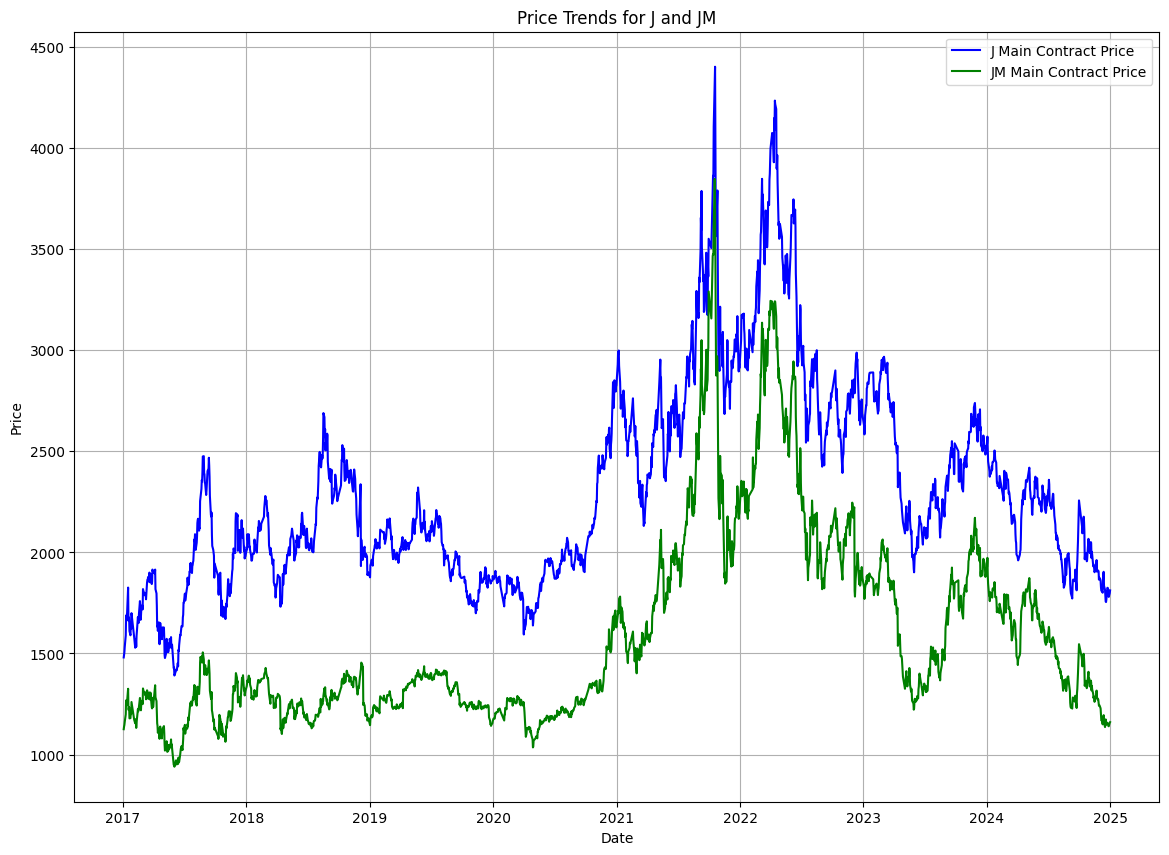

Cointegration test score: -5.12051254501279
Cointegration test p-value: 9.824916042063352e-05
                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                 1.644e+04
Date:                Sat, 03 May 2025   Prob (F-statistic):               0.00
Time:                        11:46:15   Log-Likelihood:                -12658.
No. Observations:                1943   AIC:                         2.532e+04
Df Residuals:                    1941   BIC:                         2.533e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

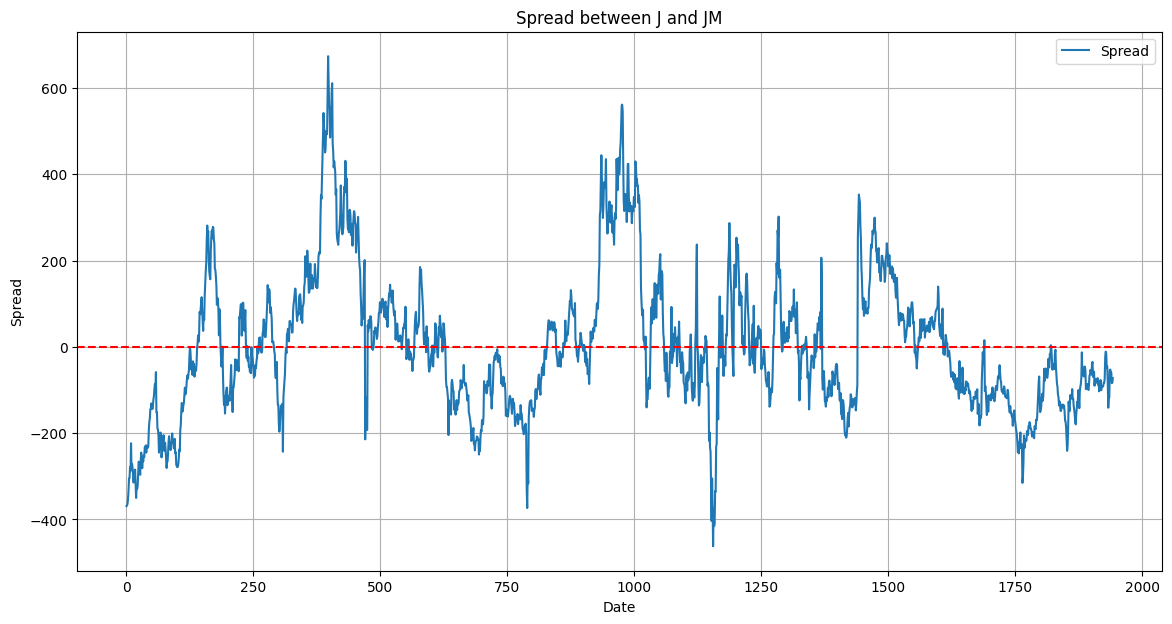

In [14]:
# Test for JM J
analyze_cointegration_and_plot(dataframes, '/J', '/JM')

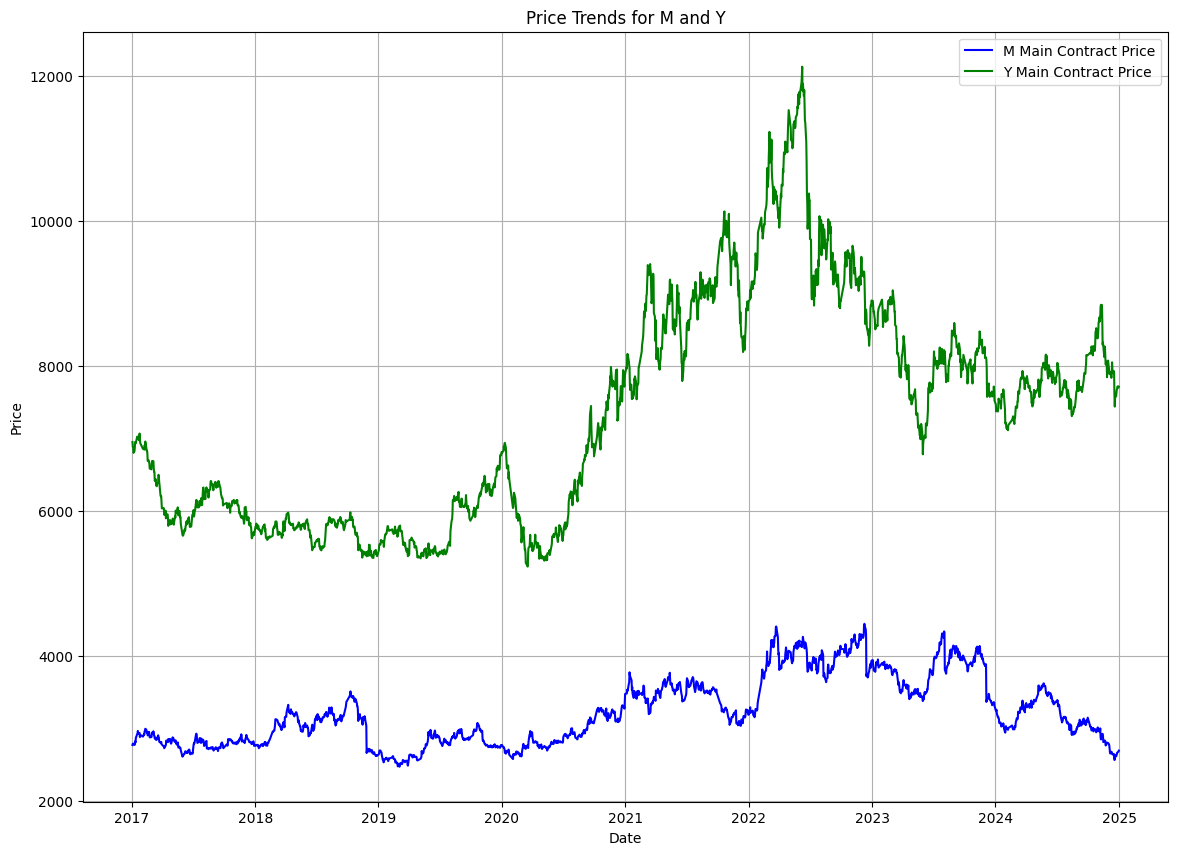

Cointegration test score: -3.3563564902628116
Cointegration test p-value: 0.047434432118155054
                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     3198.
Date:                Sat, 03 May 2025   Prob (F-statistic):               0.00
Time:                        11:46:16   Log-Likelihood:                -13760.
No. Observations:                1943   AIC:                         2.752e+04
Df Residuals:                    1941   BIC:                         2.754e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

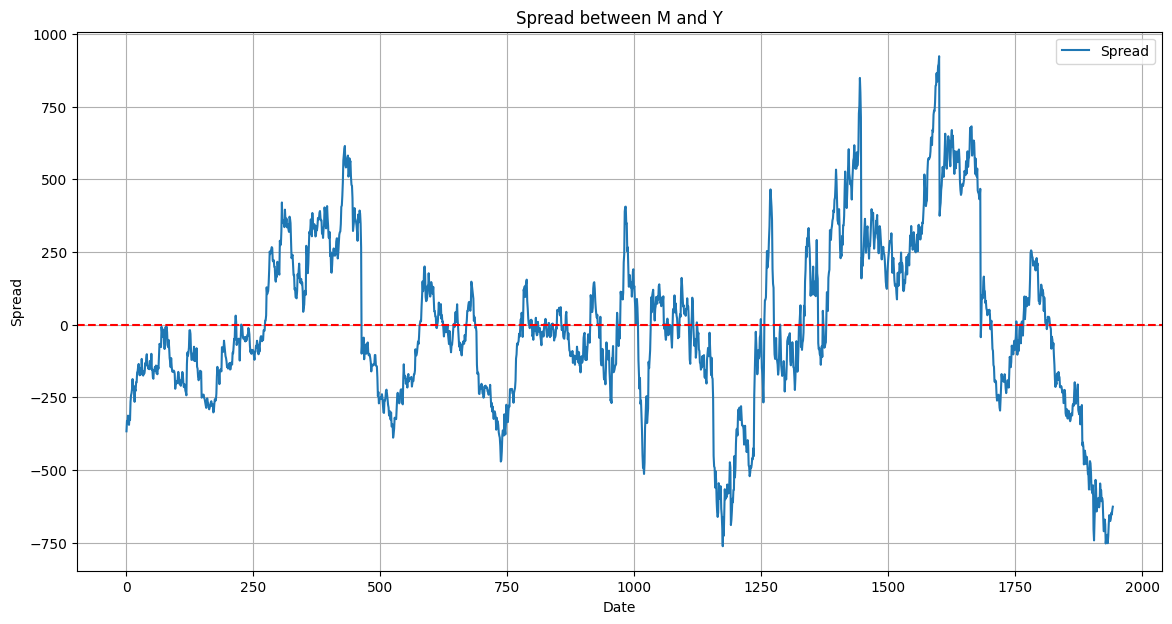

In [15]:
# Test for Y M
analyze_cointegration_and_plot(dataframes, '/M', '/Y')

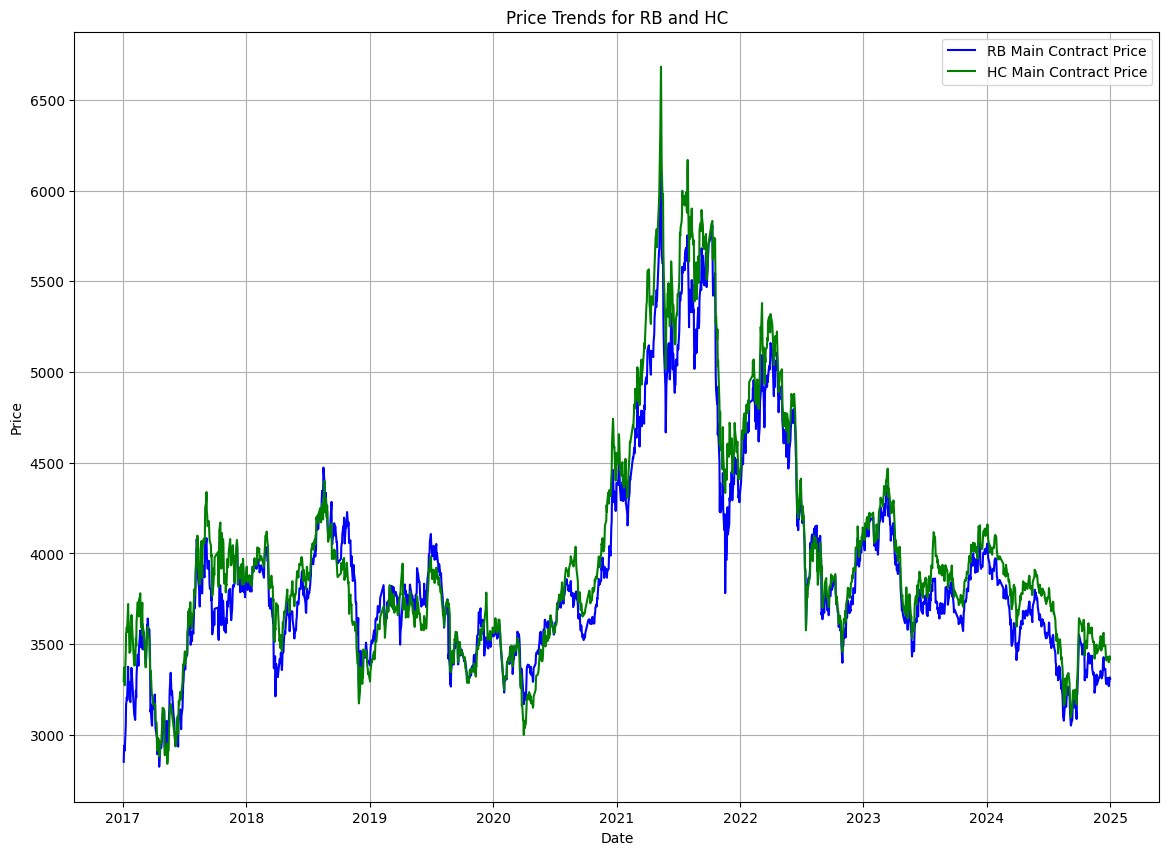

Cointegration test score: -6.831863529520201
Cointegration test p-value: 2.1442394162773515e-08
                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 4.731e+04
Date:                Sat, 03 May 2025   Prob (F-statistic):               0.00
Time:                        11:46:18   Log-Likelihood:                -11937.
No. Observations:                1943   AIC:                         2.388e+04
Df Residuals:                    1941   BIC:                         2.389e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

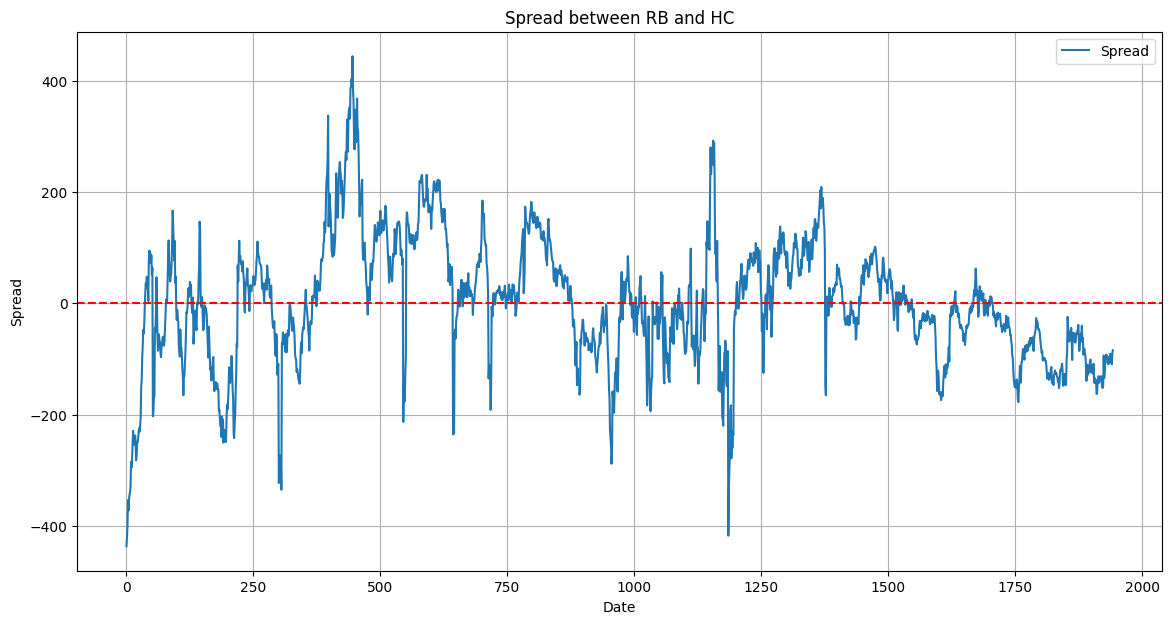

In [16]:
# Test for RB HC
analyze_cointegration_and_plot(dataframes, '/RB', '/HC')

## Correlation matrix

=== Correlation Matrix of Spreads ===
          (C, CS)  (J, JM)  (Y, M)  (RB, HC)  (CU, AL)  (M, RM)  (L, MA)  \
(C, CS)    1.0000  -0.1063  0.0790   -0.1669    0.2009   0.0224   0.5749   
(J, JM)   -0.1063   1.0000  0.2168    0.4131   -0.0544  -0.1825  -0.1055   
(Y, M)     0.0790   0.2168  1.0000   -0.3172   -0.4725  -0.5098   0.4743   
(RB, HC)  -0.1669   0.4131 -0.3172    1.0000   -0.0534  -0.0711  -0.5537   
(CU, AL)   0.2009  -0.0544 -0.4725   -0.0534    1.0000   0.4357   0.1043   
(M, RM)    0.0224  -0.1825 -0.5098   -0.0711    0.4357   1.0000  -0.0683   
(L, MA)    0.5749  -0.1055  0.4743   -0.5537    0.1043  -0.0683   1.0000   
(M, NI)    0.1737  -0.4063 -0.4424   -0.3353    0.3476   0.5997   0.1901   
(RU, AG)  -0.3508  -0.3361  0.1675   -0.5538   -0.1465  -0.0454   0.0429   
(OI, Y)   -0.0657   0.5526  0.1578    0.4378   -0.1173  -0.1612  -0.2083   
(FG, HC)  -0.3565  -0.1194  0.0986   -0.2028   -0.2381  -0.0295  -0.1614   
(RB, V)    0.5652   0.0830 -0.3570    0.3303    0.

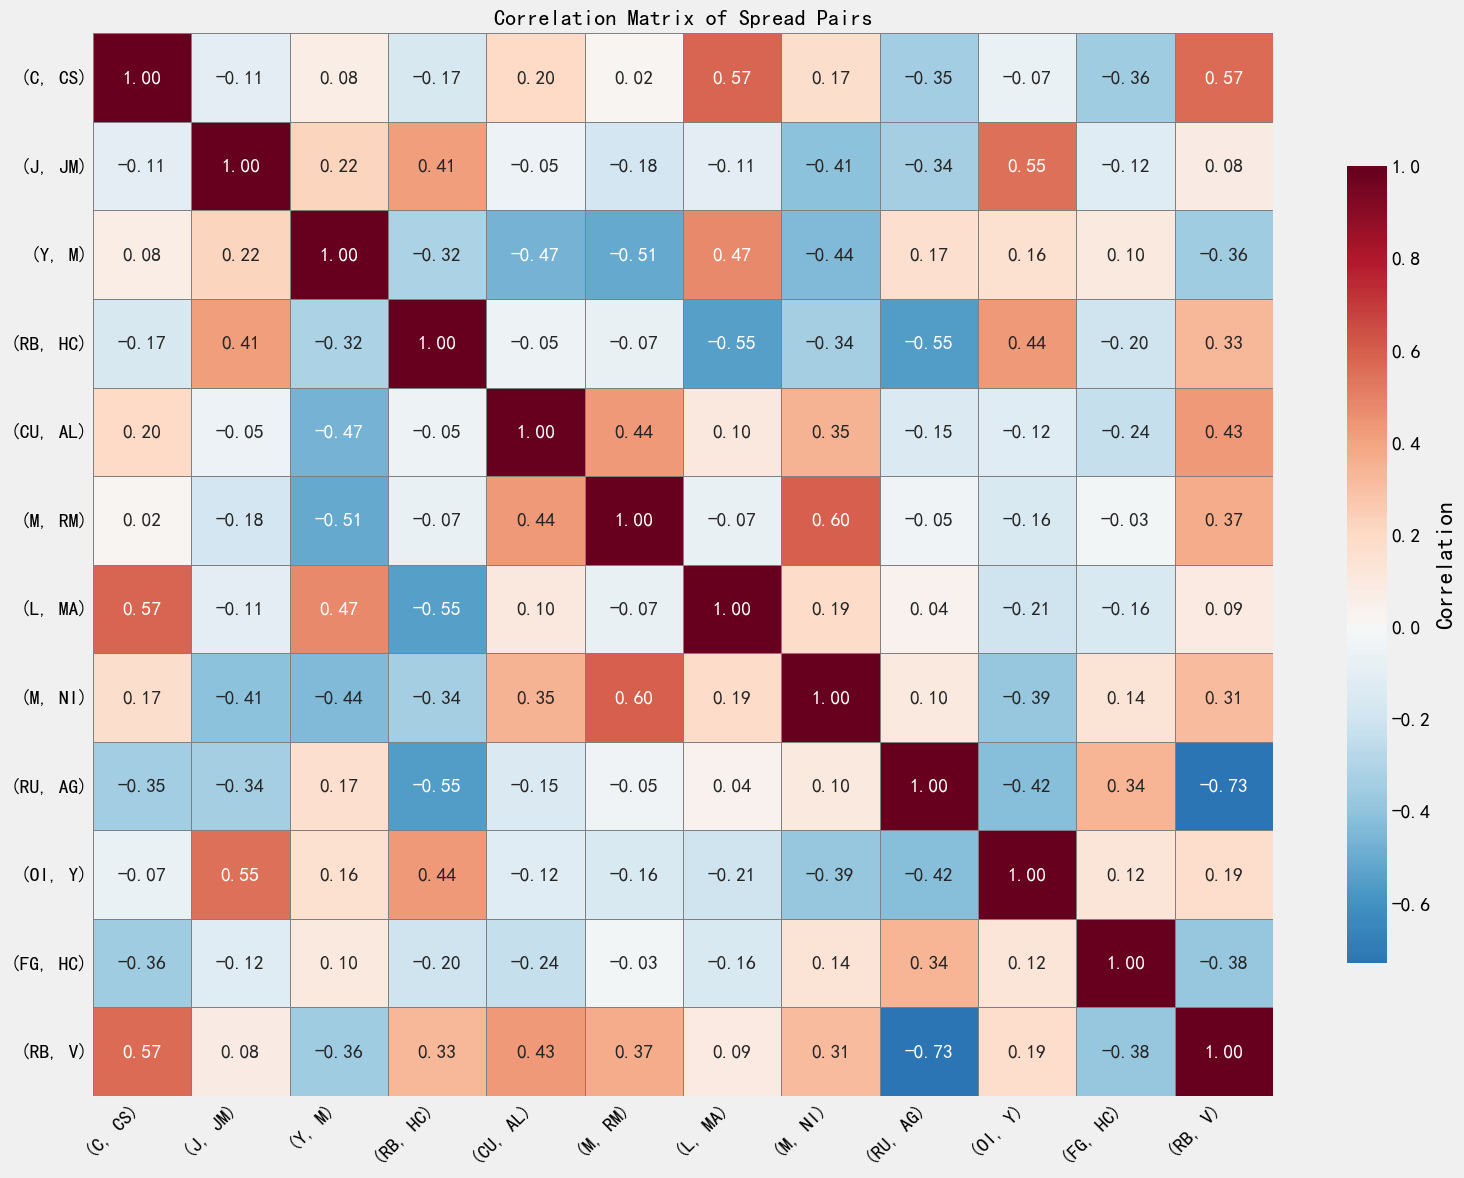

In [200]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Define your spread pairs using keys in your `dataframes` dictionary
# Format: (key1, key2, display_name)
pairs = [
    ('/C', '/CS', '(C, CS)'),       # 玉米 - 玉米淀粉
    ('/J', '/JM', '(J, JM)'),       # 焦炭 - 焦煤
    ('/Y', '/M', '(Y, M)'),         # 豆油 - 豆粕
    ('/RB', '/HC', '(RB, HC)'),     # 螺纹钢 - 热轧卷板
    ('/CU', '/AL', '(CU, AL)'),     # 铜 - 铝
    ('/M', '/RM', '(M, RM)'),       # 豆粕 - 菜粕
    ('/L', '/MA', '(L, MA)'),       # 塑料 - 甲醇
    ('/M', '/NI', '(M, NI)'),       # 豆粕 - 镍
    ('/RU', '/AG', '(RU, AG)'),     # 天然橡胶 - 白银
    ('/OI', '/Y', '(OI, Y)'),       # 菜油 - 豆油
    ('/FG', '/HC', '(FG, HC)'),     # 玻璃 - 热轧卷板
    ('/RB', '/V', '(RB, V)')        # 螺纹钢 - PVC
]


# Dictionary to hold calculated spread series
spread_dict = {}

# Loop through each pair and calculate the spread
for key1, key2, pair_name in pairs:
    df1 = dataframes[key1][['date', 'adj_close']].rename(columns={'adj_close': 'price1'})
    df2 = dataframes[key2][['date', 'adj_close']].rename(columns={'adj_close': 'price2'})
    
    # Merge data on date
    merged = pd.merge(df1, df2, on='date').dropna()
    
    # OLS regression: price1 ~ price2
    X = sm.add_constant(merged['price2'])
    model = sm.OLS(merged['price1'], X).fit()
    
    # Calculate spread = residuals from the cointegration line
    spread = merged['price1'] - (model.params[0] + model.params[1] * merged['price2'])
    spread.index = merged['date']
    spread_dict[pair_name] = spread

# Combine all spreads into one DataFrame
spread_df = pd.DataFrame(spread_dict).dropna()

# Calculate correlation matrix
corr_matrix = spread_df.corr()

# Display the correlation matrix
print("=== Correlation Matrix of Spreads ===")
print(round(corr_matrix, 4))

import seaborn as sns
# Visualize the matrix with a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='RdBu_r',       
    center=0,               
    linewidths=0.5,         
    linecolor='gray',
    cbar_kws={"shrink": 0.75, "label": "Correlation"}  
)
plt.title("Correlation Matrix of Spread Pairs", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

=== Correlation Matrix of Spreads ===
          (J, JM)  (RB, HC)  (RB, I)  (CU, AL)  (CU, BC)  (OI, Y)  (L, MA)  \
(J, JM)    1.0000    0.4909   0.5385   -0.2034   -0.4611   0.7330  -0.4052   
(RB, HC)   0.4909    1.0000   0.3820   -0.2526   -0.0591   0.3123  -0.2734   
(RB, I)    0.5385    0.3820   1.0000   -0.6045   -0.8255   0.7314  -0.2945   
(CU, AL)  -0.2034   -0.2526  -0.6045    1.0000    0.2961  -0.3020   0.2081   
(CU, BC)  -0.4611   -0.0591  -0.8255    0.2961    1.0000  -0.7105   0.2254   
(OI, Y)    0.7330    0.3123   0.7314   -0.3020   -0.7105   1.0000  -0.3662   
(L, MA)   -0.4052   -0.2734  -0.2945    0.2081    0.2254  -0.3662   1.0000   
(A, M)     0.7087    0.3010   0.8807   -0.5134   -0.7954   0.8351  -0.3494   

          (A, M)  
(J, JM)   0.7087  
(RB, HC)  0.3010  
(RB, I)   0.8807  
(CU, AL) -0.5134  
(CU, BC) -0.7954  
(OI, Y)   0.8351  
(L, MA)  -0.3494  
(A, M)    1.0000  


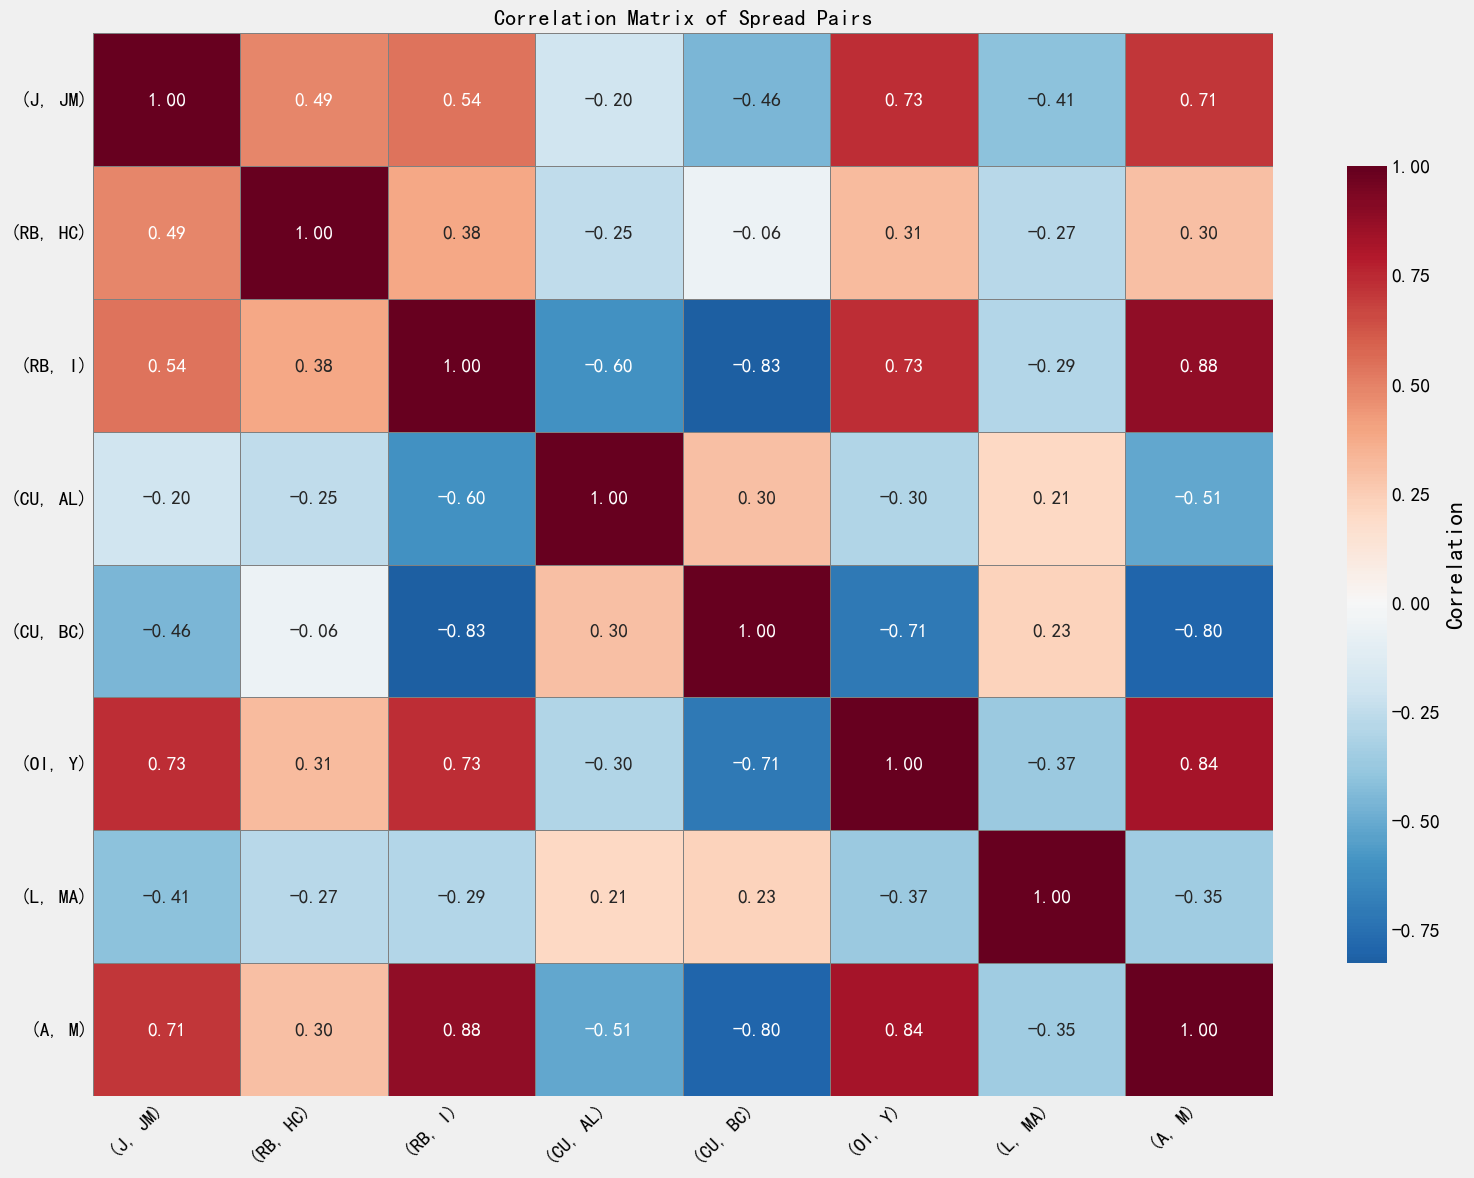

In [203]:
# 最后用到的pairs

pairs = [

    ('/J', '/JM', '(J, JM)'),       # 焦炭 - 焦煤

    ('/RB', '/HC', '(RB, HC)'),     # 螺纹钢 - 热轧卷板
    ('/RB', '/I', '(RB, I)'),     # 螺纹钢 - 铁矿石
    ('/CU', '/AL', '(CU, AL)'),     # 铜 - 铝
    ('/CU', '/BC', '(CU, BC)'),     # 铜 - 国际铜
    ('/OI', '/Y', '(OI, Y)'),       # 菜油 - 豆油
    ('/L', '/MA', '(L, MA)'),       # 塑料 - 甲醇
    ('/A', '/M', '(A, M)')        # 豆 - 豆粕
   # ('/M', '/RM', '(M, RM)'),       # 豆粕 - 菜粕
   # ('/Y', '/M', '(Y, M)'),         # 豆油 - 豆粕
   # ('/M', '/NI', '(M, NI)'),       # 豆粕 - 镍
   # ('/RU', '/AG', '(RU, AG)'),     # 天然橡胶 - 白银
   # ('/C', '/CS', '(C, CS)'),       # 玉米 - 玉米淀粉
   # ('/FG', '/HC', '(FG, HC)'),     # 玻璃 - 热轧卷板
   # ('/RB', '/V', '(RB, V)')        # 螺纹钢 - PVC
]


# Dictionary to hold calculated spread series
spread_dict = {}

# Loop through each pair and calculate the spread
for key1, key2, pair_name in pairs:
    df1 = dataframes[key1][['date', 'adj_close']].rename(columns={'adj_close': 'price1'})
    df2 = dataframes[key2][['date', 'adj_close']].rename(columns={'adj_close': 'price2'})
    
    # Merge data on date
    merged = pd.merge(df1, df2, on='date').dropna()
    
    # OLS regression: price1 ~ price2
    X = sm.add_constant(merged['price2'])
    model = sm.OLS(merged['price1'], X).fit()
    
    # Calculate spread = residuals from the cointegration line
    spread = merged['price1'] - (model.params[0] + model.params[1] * merged['price2'])
    spread.index = merged['date']
    spread_dict[pair_name] = spread

# Combine all spreads into one DataFrame
spread_df = pd.DataFrame(spread_dict).dropna()

# Calculate correlation matrix
corr_matrix = spread_df.corr()

# Display the correlation matrix
print("=== Correlation Matrix of Spreads ===")
print(round(corr_matrix, 4))

import seaborn as sns
# Visualize the matrix with a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='RdBu_r',       
    center=0,               
    linewidths=0.5,         
    linecolor='gray',
    cbar_kws={"shrink": 0.75, "label": "Correlation"}  
)
plt.title("Correlation Matrix of Spread Pairs", fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 2.观察价差分布规律，以及rolling的价差z-score的走势

In [18]:
# 原版：用不复权的数据去构建价差序列，并计算z-score
# import pandas as pd
# import numpy as np
# import statsmodels.api as sm
# from statsmodels.regression.rolling import RollingOLS
# import matplotlib.pyplot as plt

# def calculate_spread_zscore_and_plot(dataframes, key1, key2, window=252, window_type='rolling', z_upper=2, z_lower=-2, plot=True):
#     """
#     Calculate the hedge ratio using a rolling or extending window.
    
#     :param dataframes: Dictionary of DataFrames containing price data.
#     :param key1: First asset key.
#     :param key2: Second asset key.
#     :param window: Rolling window size (for rolling) or start point (for extending).
#     :param window_type: 'rolling' or 'extending'.
#     :param z_upper: Upper threshold for z-score.
#     :param z_lower: Lower threshold for z-score.
#     :param plot: Boolean, whether to plot the results.
#     :return: DataFrame with calculated spread and z-score.
#     """
#     df1 = dataframes[key1]
#     df2 = dataframes[key2]

#     # Merge and sort by date
#     pairs = pd.merge(df1, df2, on='date', suffixes=(f'_{key1}', f'_{key2}'))
#     pairs = pairs.sort_values(by='date').reset_index(drop=True)

#     # Compute hedge ratio consistently
#     if window_type == 'rolling':
#         model = RollingOLS(
#             endog=pairs[f'close_{key1}'],
#             exog=sm.add_constant(pairs[f'close_{key2}']),
#             window=window
#         )
#         rres = model.fit()
#         pairs['hedge_ratio'] = rres.params[f'close_{key2}']
#     else:  # extending window
#         betas = np.full(len(pairs), np.nan)
#         for t in range(window - 1, len(pairs)):
#             sub_data = pairs.iloc[:t+1]
#             X = sm.add_constant(sub_data[f'close_{key2}'])
#             y = sub_data[f'close_{key1}']
#             model = sm.OLS(y, X).fit()
#             betas[t] = model.params[f'close_{key2}']
#         pairs['hedge_ratio'] = pd.Series(betas, index=pairs.index)

#     # Compute spread using the same hedge ratio for both methods
#     pairs['spread'] = pairs[f'close_{key1}'] - pairs['hedge_ratio'] * pairs[f'close_{key2}']

#     # Compute spread mean and standard deviation
#     pairs['spread_mean'] = pairs['spread'].rolling(window=window).mean()
#     pairs['spread_std'] = pairs['spread'].rolling(window=window).std()
    
#     # Compute z-score
#     pairs['z_score'] = (pairs['spread'] - pairs['spread_mean']) / pairs['spread_std']

#     # Plot results
#     if plot:
#         fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

#         # Plot spread with confidence intervals based on z-score thresholds
#         axs[0].plot(pairs['date'], pairs['spread_mean'], label='Spread Mean', color='grey', linestyle='--', linewidth=2)
#         axs[0].plot(pairs['date'], pairs['spread'], label='Spread', color='dodgerblue')

#         # Use z_upper and z_lower for spread confidence interval
#         axs[0].fill_between(pairs['date'], 
#                             pairs['spread_mean'] + z_lower * pairs['spread_std'], 
#                             pairs['spread_mean'] + z_upper * pairs['spread_std'], 
#                             color='lightblue', alpha=0.4, label=f'Spread CI ({z_lower}, {z_upper})')

#         axs[0].set_title(f'{key1} and {key2} - Spread')
#         axs[0].set_ylabel('Spread')
#         axs[0].legend()
#         axs[0].grid()
#         axs[0].set_facecolor('white')

#         # Plot z-score with upper and lower threshold lines
#         axs[1].axhline(0, color='black', alpha=0.5, linewidth=2)
#         axs[1].axhline(z_upper, color='red', linestyle='--', alpha=0.6, label=f'Z = {z_upper}', linewidth=2)
#         axs[1].axhline(z_lower, color='blue', linestyle='--', alpha=0.6, label=f'Z = {z_lower}', linewidth=2)
#         axs[1].plot(pairs['date'], pairs['z_score'], label='Z-Score', color='green')

#         axs[1].set_title(f'{key1} and {key2} - Z-Score of Spread')
#         axs[1].set_xlabel('Date')
#         axs[1].set_ylabel('Z-Score')
#         axs[1].legend()
#         axs[1].grid()
#         axs[1].set_facecolor('white')

#         # Add black borders to both plots
#         for ax in axs:
#             for spine in ax.spines.values():
#                 spine.set_edgecolor('black')
#                 spine.set_linewidth(1.5)

#         plt.tight_layout()
#         plt.show()

#     return pairs  # Return processed dataset

In [207]:
# 新版：可以自定义用来计算价差的价格，这里使用不复权的close price
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
import matplotlib.pyplot as plt

def calculate_spread_zscore_and_plot(dataframes, key1, key2, window=252, window_type='extending',
                                     z_upper=2, z_lower=-2, plot=True, price_column='close'):
    """
    Calculate the hedge ratio, spread, and z-score between two assets using a specified price column.

    Parameters:
    - dataframes: dict of DataFrames with price data.
    - key1, key2: asset keys (e.g., '/C', '/CS').
    - window: rolling window size.
    - window_type: 'rolling' or 'extending'.
    - z_upper, z_lower: z-score thresholds.
    - plot: whether to plot.
    - price_column: column name used for price (default: 'close').

    Returns:
    - DataFrame with spread and z-score.
    """
    df1 = dataframes[key1]
    df2 = dataframes[key2]

    # Merge data on 'date'
    pairs = pd.merge(df1, df2, on='date', suffixes=(f'_{key1}', f'_{key2}'))
    pairs = pairs.sort_values(by='date').reset_index(drop=True)

    col1 = f'{price_column}_{key1}'
    col2 = f'{price_column}_{key2}'

    # Rolling or extending hedge ratio
    if window_type == 'rolling':
        model = RollingOLS(endog=pairs[col1], exog=sm.add_constant(pairs[col2]), window=window)
        rres = model.fit()
        pairs['hedge_ratio'] = rres.params[col2]
    else:
        betas = np.full(len(pairs), np.nan)
        for t in range(window - 1, len(pairs)):
            sub = pairs.iloc[:t + 1]
            X = sm.add_constant(sub[col2])
            y = sub[col1]
            model = sm.OLS(y, X).fit()
            betas[t] = model.params[col2]
        pairs['hedge_ratio'] = pd.Series(betas, index=pairs.index)

    # Spread and Z-score
    pairs['spread'] = pairs[col1] - pairs['hedge_ratio'] * pairs[col2]
    pairs['spread_mean'] = pairs['spread'].rolling(window=window).mean()
    pairs['spread_std'] = pairs['spread'].rolling(window=window).std()
    pairs['z_score'] = (pairs['spread'] - pairs['spread_mean']) / pairs['spread_std']

    # Plotting
    if plot:
        fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

        axs[0].plot(pairs['date'], pairs['spread_mean'], label='Spread Mean', color='grey', linestyle='--', linewidth=2)
        axs[0].plot(pairs['date'], pairs['spread'], label='Spread', color='dodgerblue')
        axs[0].fill_between(pairs['date'],
                            pairs['spread_mean'] + z_lower * pairs['spread_std'],
                            pairs['spread_mean'] + z_upper * pairs['spread_std'],
                            color='lightblue', alpha=0.4, label=f'Spread CI ({z_lower}, {z_upper})')
        axs[0].set_title(f'{key1} and {key2} - Spread')
        axs[0].set_ylabel('Spread')
        axs[0].legend()
        axs[0].grid()
        axs[0].set_facecolor('white')

        axs[1].axhline(0, color='black', alpha=0.5, linewidth=2)
        axs[1].axhline(z_upper, color='red', linestyle='--', alpha=0.6, label=f'Z = {z_upper}', linewidth=2)
        axs[1].axhline(z_lower, color='blue', linestyle='--', alpha=0.6, label=f'Z = {z_lower}', linewidth=2)
        axs[1].plot(pairs['date'], pairs['z_score'], label='Z-Score', color='green')
        axs[1].set_title(f'{key1} and {key2} - Z-Score of Spread')
        axs[1].set_xlabel('Date')
        axs[1].set_ylabel('Z-Score')
        axs[1].legend()
        axs[1].grid()
        axs[1].set_facecolor('white')

        for ax in axs:
            for spine in ax.spines.values():
                spine.set_edgecolor('black')
                spine.set_linewidth(1.5)

        plt.tight_layout()
        plt.show()

    return pairs


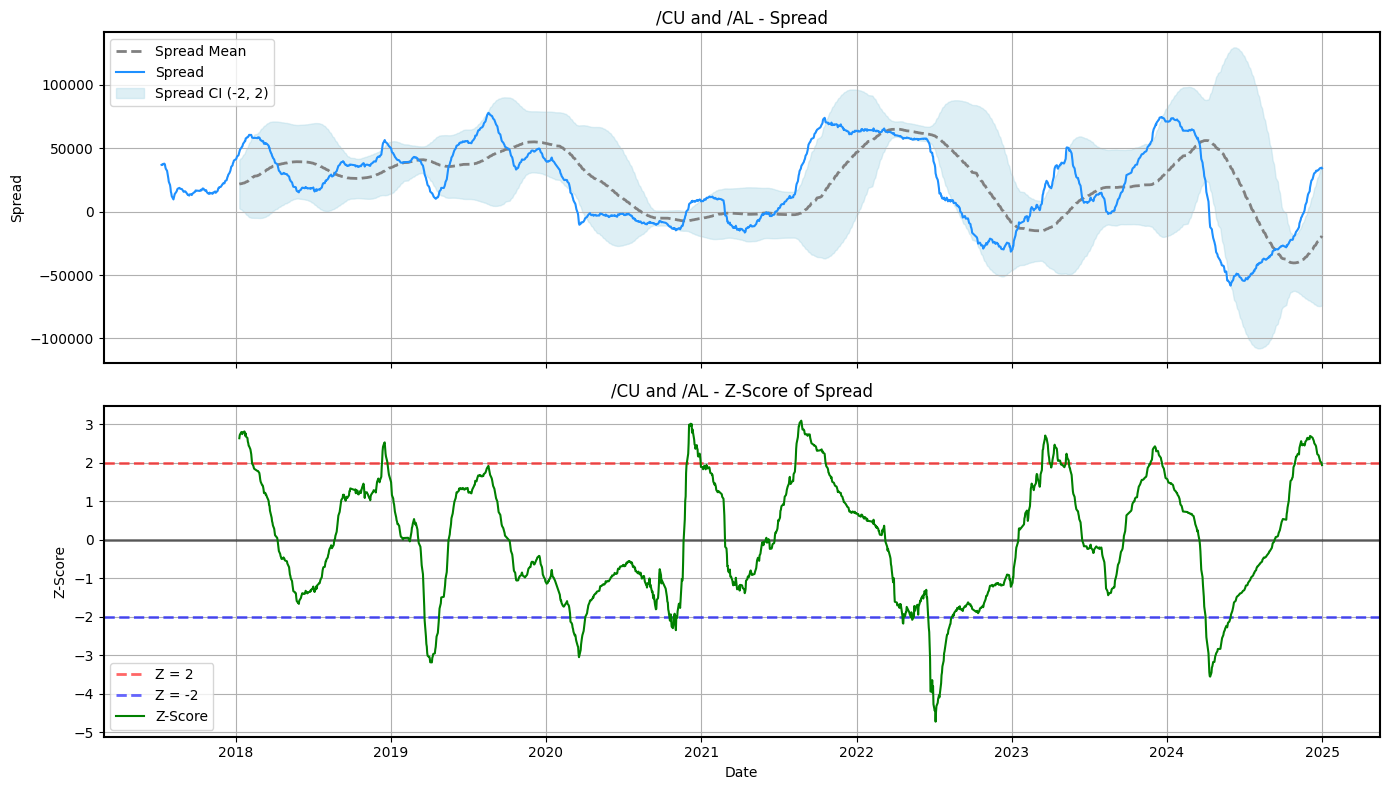

In [20]:
CU_AL_data = calculate_spread_zscore_and_plot(dataframes, '/CU', '/AL', window=126, window_type='rolling', z_upper=2, z_lower=-2)

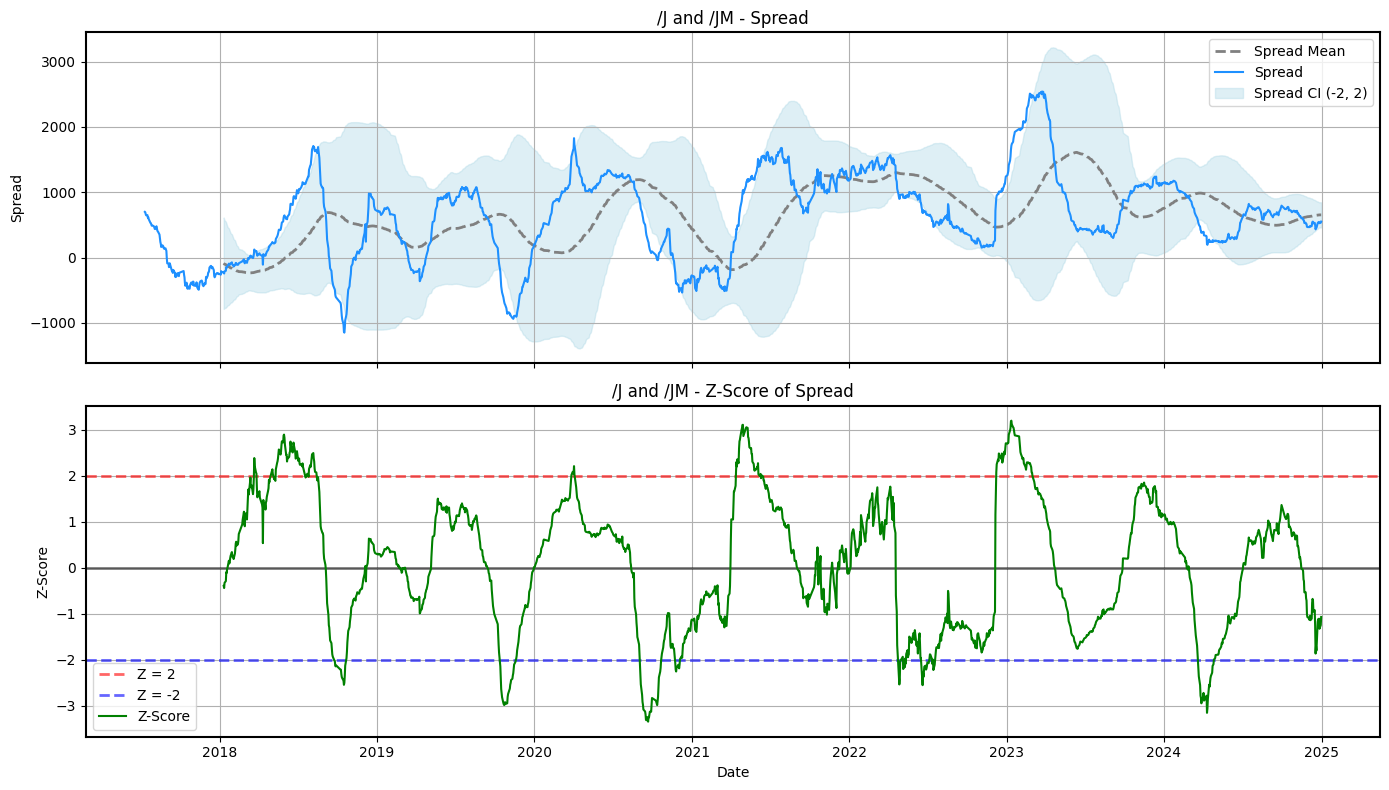

In [21]:
# J and JM
J_JM_data = calculate_spread_zscore_and_plot(dataframes, '/J', '/JM', window=126, window_type='rolling', z_upper=2, z_lower=-2)

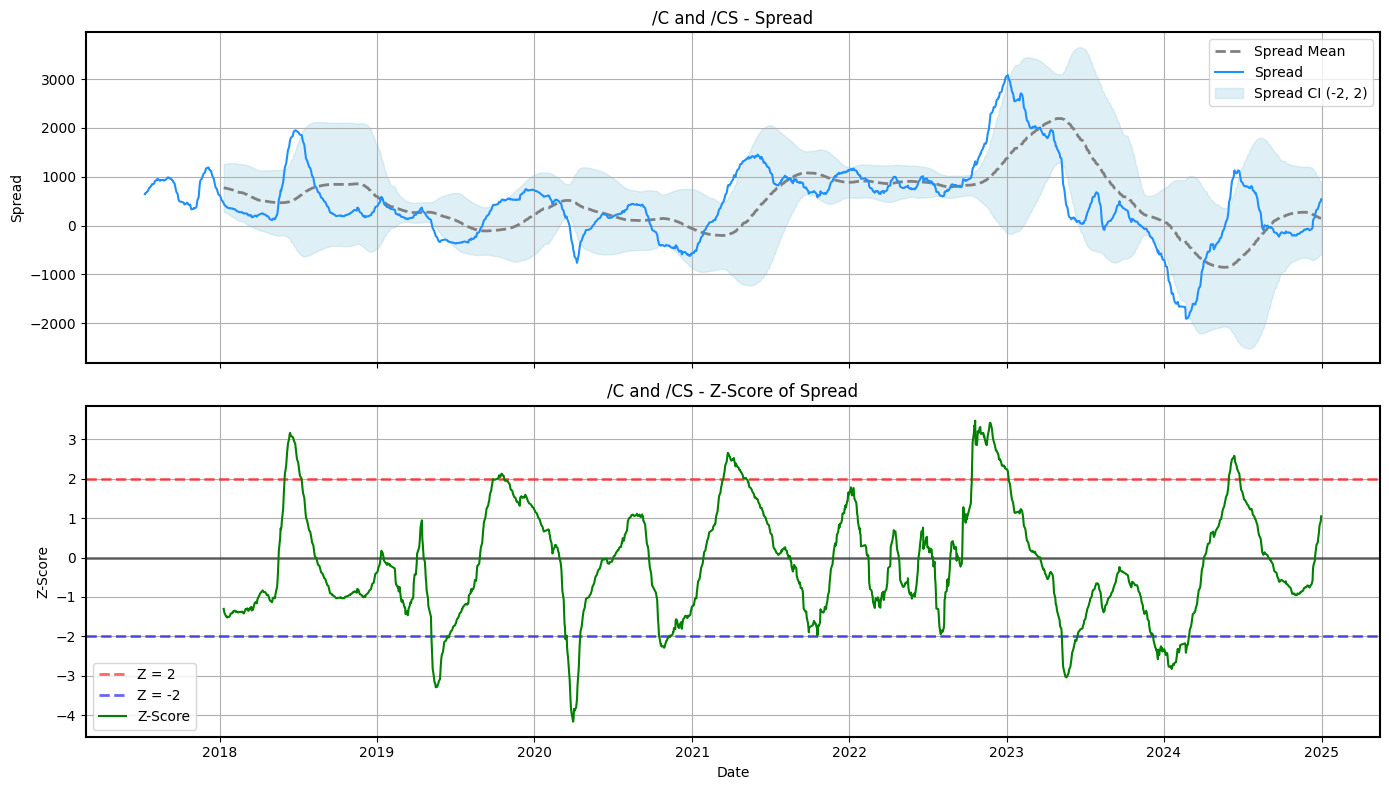

In [22]:
# C and CS
C_CS_data = calculate_spread_zscore_and_plot(dataframes, '/C', '/CS', window=126, window_type='rolling', z_upper=2, z_lower=-2)

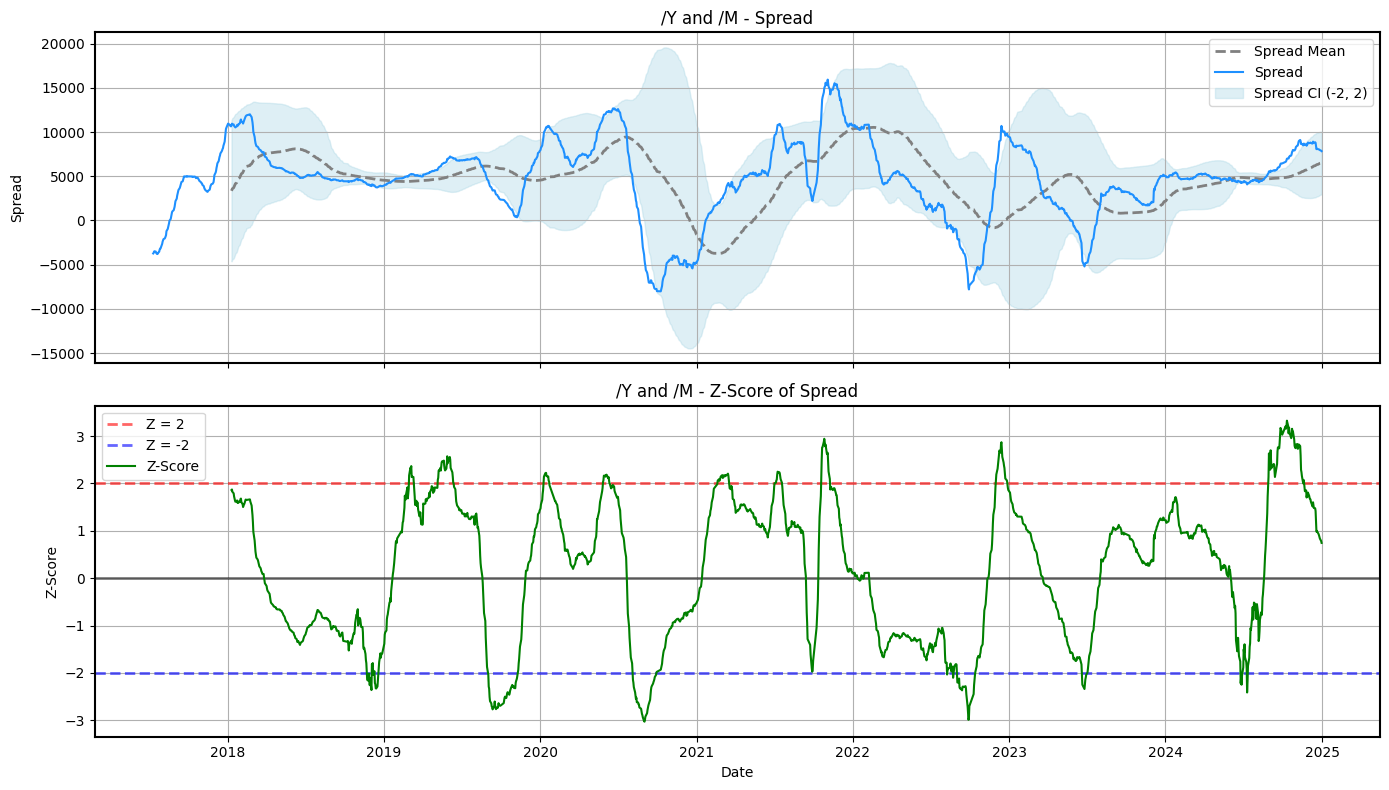

In [23]:
# Y and M
Y_M_data = calculate_spread_zscore_and_plot(dataframes, '/Y', '/M', window=126, window_type='rolling', z_upper=2, z_lower=-2)

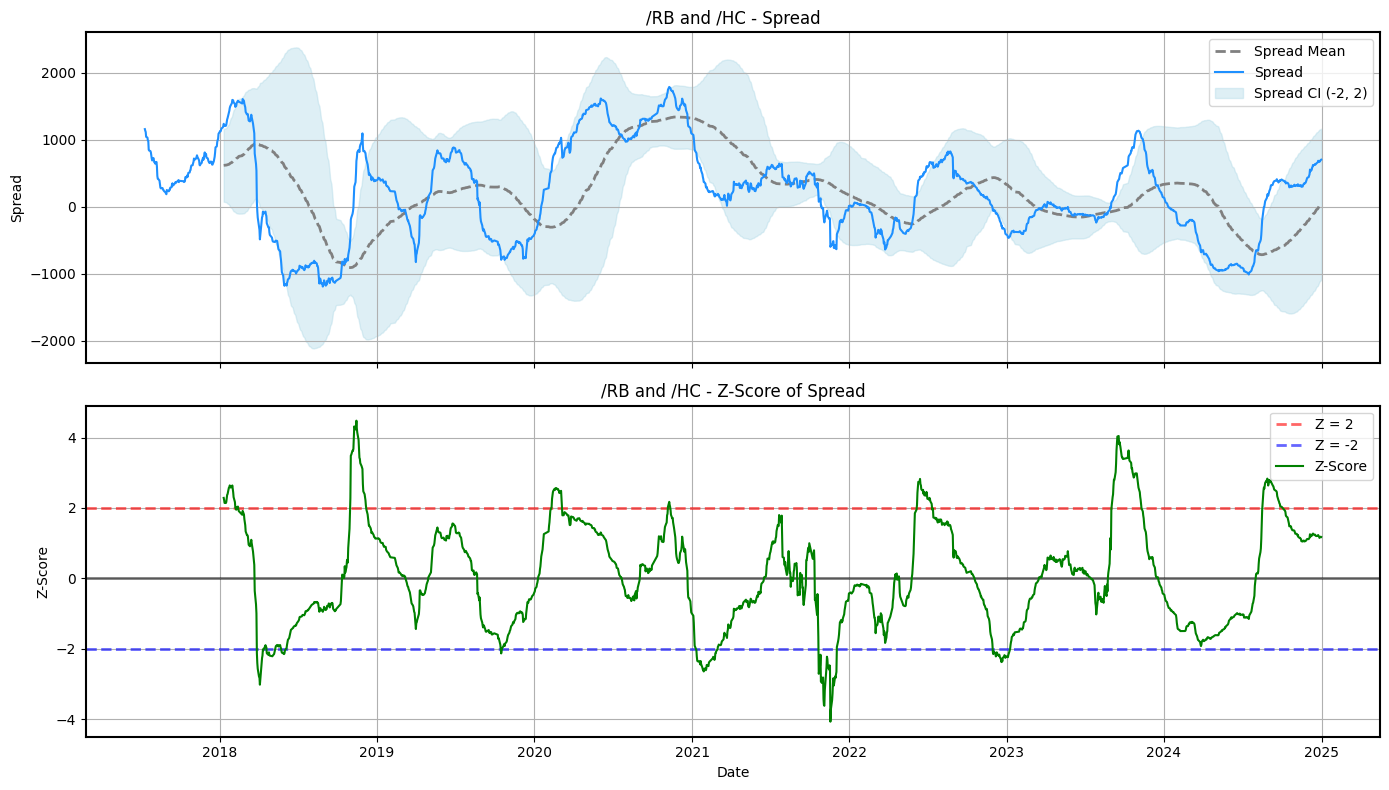

In [24]:
# RB and HC
RB_HC_data = calculate_spread_zscore_and_plot(dataframes, '/RB', '/HC', window=126, window_type='rolling', z_upper=2, z_lower=-2)

# 3. 根据rolling z-score生成交易信号
-可自定义rolling/extending
-可自定义天数
-可自定义上下轨
-可画图

In [25]:
# 版本1：用不复权的数据给出交易信号，并在换月时直接沿用原来的信号
# import pandas as pd
# import matplotlib.pyplot as plt

def generate_trading_signals_from_z_score(df, lower_threshold=-2, upper_threshold=2,  
                                           lower_close_threshold=0, upper_close_threshold=0, 
                                           z_score_column='z_score', plot=True, pair_name="Pair"):
    """
    Generate trading signals based on Z-score and plot the Z-score and spread with signals.
    
    Rollover logic:
    This version checks for changes in the dominant_id columns for key1 and key2.
    The keys are extracted from pair_name (assumed to be space-separated, e.g., "C and CS" gives key1 = "C" and key2 = "CS").
    For each row (starting from the second row), if the previous day was in an active trading state (Position ≠ 0),
    the code determines whether the dominant_id for key1 and/or key2 has changed compared to the previous day.
    - If both keys change, it sets a combined signal "RollOver Close Both".
    - If only one key changes, it marks that key's rollover signal.
    - Otherwise, no rollover signal is generated.
    The rollover signal causes the position to be closed (set to 0).
    """
    # Extract key1 and key2 from pair_name (first and last word)
    parts = pair_name.split()
    key1 = parts[0]
    key2 = parts[-1]
    col_key1 = f"dominant_id_/{key1}"
    col_key2 = f"dominant_id_/{key2}"
    
    # Ensure the date column is datetime type if needed:
    # df['date'] = pd.to_datetime(df['date'])
    
    # Initialize 'Signal' column as 'None' (no signal) and 'Position' as 0 (flat)
    df['Signal'] = 'None'
    df['Position'] = 0  
    last_signal = 'None'
    
    # -------------------------------
    # Step 1: Generate signals based on Z-score rules
    # -------------------------------
    for i in range(len(df)-2):  # Loop until the third last row to avoid index errors
        if df.loc[i, z_score_column] < lower_threshold and last_signal != 'Buy':
            df.loc[i+2, 'Signal'] = 'Buy'
            last_signal = 'Buy'
            df.loc[i+2, 'Position'] = 1
        elif df.loc[i, z_score_column] > upper_threshold and last_signal != 'Sell':
            df.loc[i+2, 'Signal'] = 'Sell'
            last_signal = 'Sell'
            df.loc[i+2, 'Position'] = -1
        elif df.loc[i, z_score_column] >= lower_close_threshold and last_signal == 'Buy':
            df.loc[i+2, 'Signal'] = 'Close'
            last_signal = 'None'
            df.loc[i+2, 'Position'] = 0
        elif df.loc[i, z_score_column] <= upper_close_threshold and last_signal == 'Sell':
            df.loc[i+2, 'Signal'] = 'Close'
            last_signal = 'None'
            df.loc[i+2, 'Position'] = 0
        
        # If no new signal for the next row, carry forward the previous position.
        if df.loc[i+1, 'Signal'] == 'None' and i > 0:
            df.loc[i+1, 'Position'] = df.loc[i, 'Position']
    
    # -------------------------------
    # Step 2: Rollover logic based on dominant_id changes with combined marking
    # -------------------------------
    # For each row starting from the second, check if the dominant_id for key1 and/or key2 has changed
    # compared to the previous row, but only if the previous day was active (Position ≠ 0).
    for i in range(1, len(df)):
        # Only check if the previous day was in an active state.
        if df.loc[i-1, 'Position'] != 0:
            key1_changed = (col_key1 in df.columns) and (df.loc[i, col_key1] != df.loc[i-1, col_key1])
            key2_changed = (col_key2 in df.columns) and (df.loc[i, col_key2] != df.loc[i-1, col_key2])
            
            # Determine the rollover signal based on which keys changed.
            if key1_changed and key2_changed:
                rollover_signal = "RollOver Close Both"
            elif key1_changed:
                rollover_signal = f"RollOver Close {key1}"
            elif key2_changed:
                rollover_signal = f"RollOver Close {key2}"
            else:
                rollover_signal = None
            
            # If a rollover signal is determined, update the signal and close the position.
            if rollover_signal is not None:
                df.loc[i, 'Signal'] = rollover_signal
                df.loc[i, 'Position'] = df.loc[i-1, 'Position']
    
    # -------------------------------
    # Step 3: Plotting the results
    # -------------------------------
    if plot:
        plt.figure(figsize=(14, 8), facecolor='white')
        
        # Upper plot: Spread chart
        ax1 = plt.subplot(2, 1, 1)
        ax1.plot(df['date'], df['spread_mean'], label='Spread Mean', color='grey', linestyle='--', linewidth=2, zorder=1)
        ax1.plot(df['date'], df['spread'], label='Spread', color='dodgerblue', linewidth=2, zorder=2)
        ax1.fill_between(df['date'], 
                         df['spread_mean'] + lower_threshold * df['spread_std'], 
                         df['spread_mean'] + upper_threshold * df['spread_std'], 
                         color='lightblue', alpha=0.4, label='Spread CI', zorder=0)
        # Plot normal signals (Buy, Sell, Close)
        ax1.scatter(df[df['Signal'] == 'Buy']['date'], df[df['Signal'] == 'Buy']['spread'], 
                    label='Buy', marker='^', color='red', s=100, zorder=5)
        ax1.scatter(df[df['Signal'] == 'Sell']['date'], df[df['Signal'] == 'Sell']['spread'], 
                    label='Sell', marker='v', color='green', s=100, zorder=5)
        ax1.scatter(df[df['Signal'] == 'Close']['date'], df[df['Signal'] == 'Close']['spread'], 
                    label='Close', marker='o', color='gray', s=100, zorder=5)
        # Plot rollover signals on the spread chart:
        # For a combined rollover signal, use a distinct marker.
        combined_mask = df['Signal'].str.contains("RollOver Close Both", na=False)
        if combined_mask.any():
            ax1.scatter(df[combined_mask]['date'], df[combined_mask]['spread'], label="RollOver Close Both", 
                        marker='s', color='brown', s=100, zorder=5)
        # For individual rollover signals for key1:
        key1_mask = df['Signal'].str.contains(f"RollOver Close {key1}", na=False) & ~combined_mask
        if key1_mask.any():
            ax1.scatter(df[key1_mask]['date'], df[key1_mask]['spread'], label=f"RollOver Close {key1}", 
                        marker='D', color='orange', s=100, zorder=5)
        # For individual rollover signals for key2:
        key2_mask = df['Signal'].str.contains(f"RollOver Close {key2}", na=False) & ~combined_mask
        if key2_mask.any():
            ax1.scatter(df[key2_mask]['date'], df[key2_mask]['spread'], label=f"RollOver Close {key2}", 
                        marker='X', color='purple', s=100, zorder=5)
        
        ax1.set_title(f'{pair_name} - Spread')
        ax1.set_ylabel('Spread')
        ax1.legend()
        ax1.grid(True)
        ax1.set_facecolor('white')
        for spine in ax1.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1.5)
        
        # Lower plot: Z-Score chart (sharing the x-axis with ax1)
        ax2 = plt.subplot(2, 1, 2, sharex=ax1)
        ax2.plot(df['date'], df[z_score_column], label='Z-Score', color='purple', linewidth=2, zorder=2)
        ax2.axhline(0, color='black', linestyle='--', alpha=0.5, linewidth=2, zorder=1)
        ax2.axhline(upper_threshold, color='red', linestyle='--', alpha=0.5, 
                    label=f'Z = {upper_threshold}', linewidth=2, zorder=1)
        ax2.axhline(lower_threshold, color='blue', linestyle='--', alpha=0.5, 
                    label=f'Z = {lower_threshold}', linewidth=2, zorder=1)
        # Plot normal signals on the Z-Score chart
        ax2.scatter(df[df['Signal'] == 'Buy']['date'], df[df['Signal'] == 'Buy'][z_score_column], 
                    label='Buy', marker='^', color='red', s=100, zorder=5)
        ax2.scatter(df[df['Signal'] == 'Sell']['date'], df[df['Signal'] == 'Sell'][z_score_column], 
                    label='Sell', marker='v', color='green', s=100, zorder=5)
        ax2.scatter(df[df['Signal'] == 'Close']['date'], df[df['Signal'] == 'Close'][z_score_column], 
                    label='Close', marker='o', color='gray', s=100, zorder=5)
        # Plot rollover signals on the Z-Score chart
        ax2.scatter(df[combined_mask]['date'], df[combined_mask][z_score_column], label="RollOver Close Both", 
                    marker='s', color='brown', s=100, zorder=5)
        ax2.scatter(df[key1_mask]['date'], df[key1_mask][z_score_column], label=f"RollOver Close {key1}", 
                    marker='D', color='orange', s=100, zorder=5)
        ax2.scatter(df[key2_mask]['date'], df[key2_mask][z_score_column], label=f"RollOver Close {key2}", 
                    marker='X', color='purple', s=100, zorder=5)
        
        ax2.set_title(f'{pair_name} - Z-Score of Spread')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Z-Score')
        ax2.legend()
        ax2.grid(True)
        ax2.set_facecolor('white')
        for spine in ax2.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1.5)
        
        plt.tight_layout()
        plt.show()
    
    return df

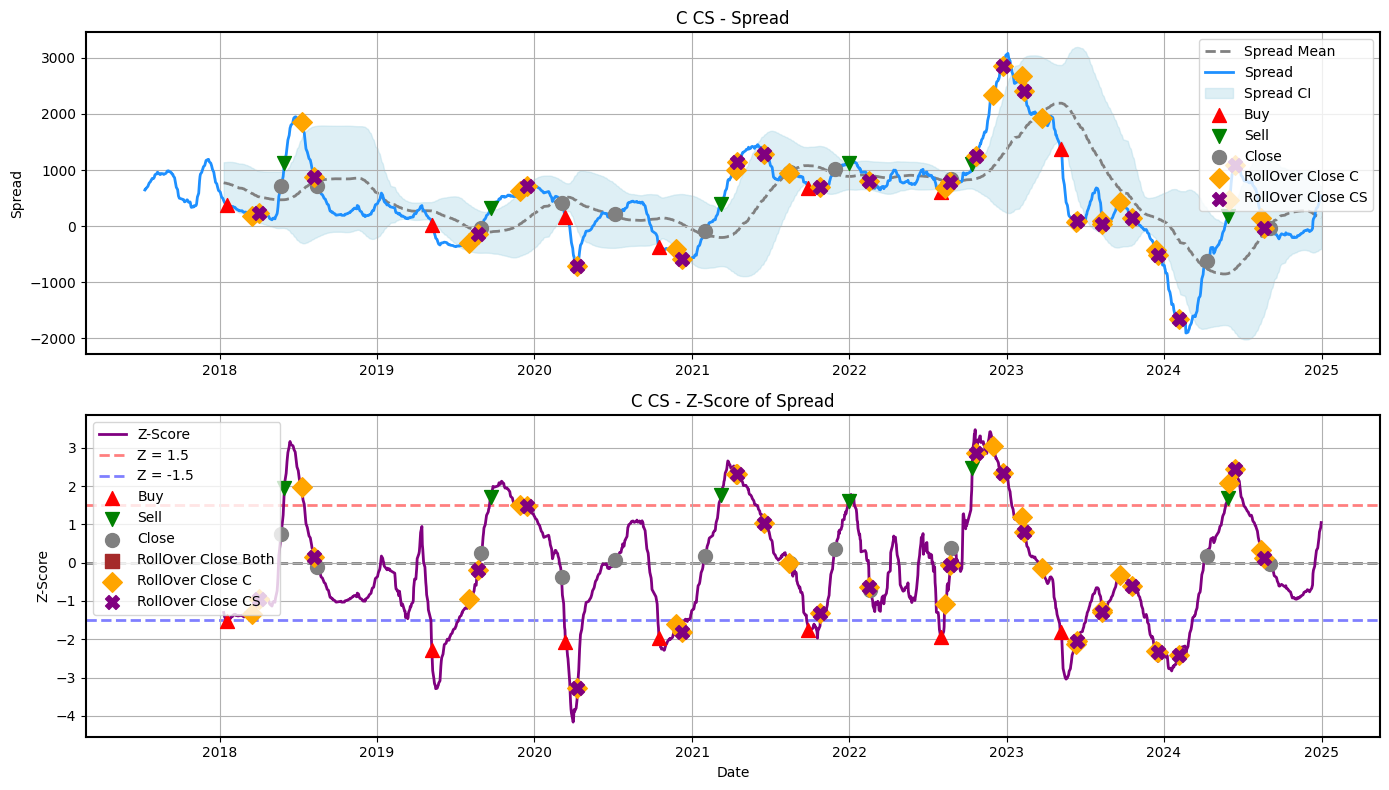

,underlying_symbol_/C,date,dominant_id_/C,open_/C,close_/C,high_/C,low_/C,total_turnover_/C,volume_/C,prev_close_/C,...,day_session_open_/CS,adj_open_/CS,adj_close_/CS,hedge_ratio,spread,spread_mean,spread_std,z_score,Signal,Position
0,C,2017-01-03,C1705,1518.0,1519.0,1530.0,1514.0,1.410394e+10,926968.0,1519.0,...,1792.0,2571.0,2566.0,NaN,NaN,NaN,NaN,NaN,None,0
1,C,2017-01-04,C1705,1522.0,1534.0,1545.0,1518.0,2.466536e+10,1608180.0,1519.0,...,1791.0,2570.0,2588.0,NaN,NaN,NaN,NaN,NaN,None,0
2,C,2017-01-05,C1705,1539.0,1527.0,1543.0,1526.0,1.292118e+10,843106.0,1534.0,...,1820.0,2599.0,2575.0,NaN,NaN,NaN,NaN,NaN,None,0
3,C,2017-01-06,C1705,1529.0,1515.0,1537.0,1506.0,2.141024e+10,1406662.0,1527.0,...,1797.0,2576.0,2551.0,NaN,NaN,NaN,NaN,NaN,None,0
4,C,2017-01-09,C1705,1513.0,1508.0,1517.0,1501.0,1.361236e+10,902174.0,1515.0,...,1770.0,2549.0,2551.0,NaN,NaN,NaN,NaN,NaN,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1938,C,2024-12-25,C2505,2192.0,2205.0,2212.0,2190.0,1.486277e+10,674657.0,2189.0,...,2465.0,2461.0,2472.0,0.734005,390.538546,167.045744,398.539275,0.560780,None,0
1939,C,2024-12-26,C2505,2206.0,2204.0,2211.0,2199.0,8.861339e+09,401944.0,2205.0,...,2474.0,2471.0,2469.0,0.723288,418.201918,161.492475,389.966542,0.658286,None,0
1940,C,2024-12-27,C2505,2208.0,2234.0,2243.0,2206.0,1.687330e+10,757547.0,2204.0,...,2484.0,2469.0,2490.0,0.710975,463.672379,156.683425,382.339686,0.802922,None,0
1941,C,2024-12-30,C2505,2234.0,2235.0,2247.0,2226.0,1.420353e+10,635325.0,2234.0,...,2495.0,2490.0,2490.0,0.697391,498.497398,152.587183,375.783077,0.920505,None,0


In [26]:
# example
generate_trading_signals_from_z_score(C_CS_data, lower_threshold=-1.5, upper_threshold=1.5,  
                                           lower_close_threshold=0, upper_close_threshold=0, 
                                           z_score_column='z_score', plot=True, pair_name="C CS")

### Test

In [27]:
# # 用未复权数据，换月先平仓，等两个合约都换月之后再根据新的价差z-score计算新的开仓信号

# import pandas as pd
# import matplotlib.pyplot as plt

# def generate_trading_signals_from_z_score(df, lower_threshold=-2, upper_threshold=2,  
#                                            lower_close_threshold=0, upper_close_threshold=0, 
#                                            z_score_column='z_score', plot=True, pair_name="Pair"):
#     """
#     Generate trading signals based on Z-score with enhanced rollover logic:
#     If any one contract rolls, close the position and wait until both contracts roll to the same expiry
#     before evaluating new trade signals.
#     """

#     # Extract key1 and key2 from pair_name
#     parts = pair_name.split()
#     key1 = parts[0]
#     key2 = parts[-1]
#     col_key1 = f"dominant_id_/{key1}"
#     col_key2 = f"dominant_id_/{key2}"

#     # Extract last 4 digits from contract id (e.g., '2405')
#     def extract_month(contract_id):
#         return str(contract_id)[-4:] if pd.notnull(contract_id) else None

#     df['Signal'] = 'None'
#     df['Position'] = 0

#     waiting_for_both_rolled = False
#     last_signal = 'None'

#     for i in range(1, len(df)):
#         prev = df.loc[i-1]
#         curr = df.loc[i]

#         key1_prev = prev[col_key1]
#         key2_prev = prev[col_key2]
#         key1_curr = curr[col_key1]
#         key2_curr = curr[col_key2]

#         key1_changed = key1_prev != key1_curr
#         key2_changed = key2_prev != key2_curr

#         # Step 1: Handle rollover logic
#         if prev['Position'] != 0 and (key1_changed or key2_changed):
#             df.loc[i+1, 'Signal'] = 'RollOver Close'
#             df.loc[i+1, 'Position'] = 0
#             last_signal = 'None'
#             waiting_for_both_rolled = True
#             continue

#         # Step 2: If in waiting state, check if both contracts have same month
#         if waiting_for_both_rolled:
#             if extract_month(key1_curr) == extract_month(key2_curr):
#                 waiting_for_both_rolled = False  # Resume signal logic
#             else:
#                 df.loc[i, 'Position'] = 0
#                 continue

#         # Step 3: Generate trading signals based on Z-score
#         z = curr[z_score_column]
#         if z < lower_threshold and last_signal != 'Buy':
#             df.loc[i+2, 'Signal'] = 'Buy'
#             df.loc[i+2, 'Position'] = 1
#             last_signal = 'Buy'
#         elif z > upper_threshold and last_signal != 'Sell':
#             df.loc[i+2, 'Signal'] = 'Sell'
#             df.loc[i+2, 'Position'] = -1
#             last_signal = 'Sell'
#         elif z >= lower_close_threshold and last_signal == 'Buy':
#             df.loc[i+2, 'Signal'] = 'Close'
#             df.loc[i+2, 'Position'] = 0
#             last_signal = 'None'
#         elif z <= upper_close_threshold and last_signal == 'Sell':
#             df.loc[i+2, 'Signal'] = 'Close'
#             df.loc[i+2, 'Position'] = 0
#             last_signal = 'None'
#         else:
#             df.loc[i, 'Position'] = prev['Position']

#     # Optional Plotting
#     if plot:
#         plt.figure(figsize=(14, 8), facecolor='white')

#         # --- Plot Spread Chart ---
#         ax1 = plt.subplot(2, 1, 1)
#         ax1.plot(df['date'], df['spread_mean'], label='Spread Mean', color='grey', linestyle='--', linewidth=2)
#         ax1.plot(df['date'], df['spread'], label='Spread', color='dodgerblue', linewidth=2)
#         ax1.fill_between(df['date'], 
#                          df['spread_mean'] + lower_threshold * df['spread_std'], 
#                          df['spread_mean'] + upper_threshold * df['spread_std'], 
#                          color='lightblue', alpha=0.4, label='Spread CI')
#         ax1.scatter(df[df['Signal'] == 'Buy']['date'], df[df['Signal'] == 'Buy']['spread'], 
#                     label='Buy', marker='^', color='red', s=100)
#         ax1.scatter(df[df['Signal'] == 'Sell']['date'], df[df['Signal'] == 'Sell']['spread'], 
#                     label='Sell', marker='v', color='green', s=100)
#         ax1.scatter(df[df['Signal'] == 'Close']['date'], df[df['Signal'] == 'Close']['spread'], 
#                     label='Close', marker='o', color='gray', s=100)
#         ax1.scatter(df[df['Signal'] == 'RollOver Close']['date'], df[df['Signal'] == 'RollOver Close']['spread'], 
#                     label='RollOver Close', marker='s', color='brown', s=100)

#         ax1.set_title(f'{pair_name} - Spread')
#         ax1.set_ylabel('Spread')
#         ax1.legend()
#         ax1.grid(True)

#         # --- Plot Z-score Chart ---
#         ax2 = plt.subplot(2, 1, 2, sharex=ax1)
#         ax2.plot(df['date'], df[z_score_column], label='Z-Score', color='purple', linewidth=2)
#         ax2.axhline(0, color='black', linestyle='--', alpha=0.5)
#         ax2.axhline(upper_threshold, color='red', linestyle='--', label=f'Z = {upper_threshold}', linewidth=2)
#         ax2.axhline(lower_threshold, color='blue', linestyle='--', label=f'Z = {lower_threshold}', linewidth=2)
#         ax2.scatter(df[df['Signal'] == 'Buy']['date'], df[df['Signal'] == 'Buy'][z_score_column], 
#                     label='Buy', marker='^', color='red', s=100)
#         ax2.scatter(df[df['Signal'] == 'Sell']['date'], df[df['Signal'] == 'Sell'][z_score_column], 
#                     label='Sell', marker='v', color='green', s=100)
#         ax2.scatter(df[df['Signal'] == 'Close']['date'], df[df['Signal'] == 'Close'][z_score_column], 
#                     label='Close', marker='o', color='gray', s=100)
#         ax2.scatter(df[df['Signal'] == 'RollOver Close']['date'], df[df['Signal'] == 'RollOver Close'][z_score_column], 
#                     label='RollOver Close', marker='s', color='brown', s=100)

#         ax2.set_title(f'{pair_name} - Z-Score of Spread')
#         ax2.set_xlabel('Date')
#         ax2.set_ylabel('Z-Score')
#         ax2.legend()
#         ax2.grid(True)

#         plt.tight_layout()
#         plt.show()

#     return df


# 4.回测

In [28]:
# 粗略版收益计算（分别计算每个品种每天的日度收益率,然后根据hedge_ratio再计算收益率）：
# import pandas as pd

# def calculate_daily_returns(data, fixed_ratio=None, fee_rate=0.0005):
#     """
#     Calculate daily returns for each asset in the pair and adjust based on Position and Signal.
#     Maintain a ratio that updates only on Sell, Close, Buy, RollOver Close Both signals.
#     Allows using a fixed ratio instead of the dynamic hedge ratio column.
    
#     :param data: DataFrame containing prices and signals for a pair of assets.
#     :param fixed_ratio: Optional fixed ratio value to use instead of the hedge_ratio column.
#     :param fee_rate: Proportional fee rate (e.g., 0.0003 for 0.03%).
#     :return: DataFrame with adjusted returns for each asset and total return.
#     """
#     # Get all open price columns (assuming prefix is 'open_/')
#     open_cols = [col for col in data.columns if col.startswith('open_/')]

#     # Initialize columns to store returns
#     return_cols = []
#     for col in open_cols:
#         asset_name = col.replace('open_/', '')  
#         return_col = f'{asset_name}_Return'
#         data[return_col] = data[col].pct_change()  # Calculate daily returns
#         return_cols.append(return_col)

#     # Initialize ratio column
#     if fixed_ratio is not None:
#         # Use fixed ratio if provided
#         data['ratio'] = fixed_ratio
#     else:
#         # Otherwise, use the hedge_ratio column and update it based on signals
#         data['ratio'] = None
#         last_ratio = None
#         for i in range(len(data)):
#             if data['Signal'].iloc[i] in ['Sell', 'Close', 'Buy', 'RollOver Close Both']:
#                 last_ratio = data['hedge_ratio'].iloc[i]  # Update the ratio
#             data.at[i, 'ratio'] = last_ratio  # Maintain the last valid ratio
#         data['ratio'].fillna(method='ffill', inplace=True)  # Forward fill missing values

#     # Adjust returns based on Position
#     for i, col in enumerate(open_cols):
#         asset_name = col.replace('open_/', '')  
#         adjusted_return_col = f'{asset_name}_Return'
#         if i == 0:  
#             data[adjusted_return_col] = data['Position'] * data[return_cols[i]]
#         else:  
#             data[adjusted_return_col] = -data['Position'] * data[return_cols[i]]

#     # Deduct fee_rate based on Signal
#     for i, col in enumerate(open_cols):
#         asset_name = col.replace('open_/', '') 
#         adjusted_return_col = f'{asset_name}_Return'
        
#         # Deduct fee_rate for 'Sell', 'Close', 'Buy', 'RollOver Close Both'
#         both_fee_signals = ['Sell', 'Close', 'Buy', 'RollOver Close Both']
#         data.loc[data['Signal'].isin(both_fee_signals), adjusted_return_col] -= fee_rate
        
#         # Deduct fee_rate for 'RollOver Close XX'
#         rollover_signal = f'RollOver Close {asset_name}'
#         data.loc[data['Signal'] == rollover_signal, adjusted_return_col] -= fee_rate

#     # Compute overall strategy return
#     key1_name = open_cols[0].replace("open_/", "")
#     key2_name = open_cols[1].replace("open_/", "")

#     data['Return'] = data[f'{key1_name}_Return'] + data['ratio'] * data[f'{key2_name}_Return']
#     data['Return'] = data['Return'] / (1 + abs(data['ratio']))

#     return data


## 精细版回测
固手数配比 （根据产业链逻辑）

 交易对                 合约交易单位              配比      手数配比

 玉米(C) - 淀粉(CS)     玉米 10吨 淀粉 10吨       10:7      10:7
 
 焦炭(J) - 焦煤(JM)     焦煤 100吨 焦煤 60吨      10:14     1:2

 豆油(Y) - 豆粕(M)      豆油 10吨 豆粕 10吨       1:4       1:4

 螺纹钢(RB) - 热卷(HC)  螺纹钢 10吨 热卷 10吨      1:1      1:1

### test 不固定配比

In [155]:
# 对于固定的ratio，计算开仓手数和剩余资金
def calculate_max_lots(
    capital: float,
    prices: tuple[float, float],
    sizes: tuple[float, float],
    ratios: tuple[float, float] = None,
    hedge_ratio: float = None
) -> tuple[int, int, float]:
    """
    Calculate maximum lots supporting both ratio and hedge_ratio methods.
    
    Args:
        capital: Total available funds
        prices: (price_A, price_B)
        sizes: (size_A, size_B) contract sizes
        ratios: Optional (ratio_A, ratio_B) for fixed allocation
        hedge_ratio: Optional price ratio (price_A = hedge_ratio * price_B)
    
    Returns:
        tuple: (lots_A, lots_B, unused_capital)
    """
    # Input validation
    if (ratios is None and hedge_ratio is None) or (ratios is not None and hedge_ratio is not None):
        raise ValueError("Must specify either ratios or hedge_ratio, not both")
    
    cost_A = prices[0] * sizes[0]
    cost_B = prices[1] * sizes[1]
    
    # Convert hedge_ratio to effective ratios if provided
    if hedge_ratio is not None:
        ratios = (sizes[1] * hedge_ratio,  # ratio_A = size_B * hedge_ratio
                  sizes[0] * 1)            # ratio_B = size_A * 1
    
    max_ratio_units = capital / (ratios[0]*cost_A + ratios[1]*cost_B)
    lots_A = int(max_ratio_units * ratios[0])
    lots_B = int(max_ratio_units * ratios[1])
    unused_capital = capital - (lots_A*cost_A + lots_B*cost_B)
    
    return (lots_A, lots_B, unused_capital)

def backtest_strategy(
    A_B_data: pd.DataFrame,
    initial_capital: float = 5000000,
    ratios: tuple[float, float] = None,
    hedge_ratio_col: str = None,
    sizes: tuple[float, float] = (10, 10),
    slippage_per_lot: tuple[float, float] = (0, 0),
    pair_name: str = "Pair"
) -> pd.DataFrame:
    """
    Enhanced backtest supporting both input modes:
    - Fixed ratios (ratios=(1,2))
    - Dynamic hedge ratios (hedge_ratio_col='hedge_ratio')
    """
    df = A_B_data.copy()
    
    # Input validation

    if (ratios is None and hedge_ratio_col is None) or (ratios is not None and hedge_ratio_col is not None):
        raise ValueError("Must specify either ratios or hedge_ratio_col, not both")
    if hedge_ratio_col and hedge_ratio_col not in df.columns:
        raise ValueError(f"Column {hedge_ratio_col} not found in DataFrame")
    
    parts = pair_name.split()
    key1, key2 = parts[0], parts[-1]
    """
    Backtest pairs trading strategy with dynamic position sizing.
    
    Args:
        A_B_data: DataFrame with columns:
            - open_/A, close_/A, open_/B, close_/B 
            - Signal (Buy/Sell/Close/RollOver/etc)
        initial_capital: Starting capital
        ratios: (A_ratio, B_ratio) for position sizing
        sizes: (A_size, B_size) contract sizes in tons
        slippage_per_lot: (A_slippage, B_slippage) slippage cost per lot for each product
        pair_name: The trading pair
    
    Returns:
        Augmented DataFrame with:
            - A_lots: Calculated lots for A
            - B_lots: Calculated lots for B
            - Used_capital: Capital committed to positions
            - Unused_capital: Remaining available capital
            - Total_capital: Sum of Used and Unused capital
            - Slippage_cost: Transaction slippage costs for the day
            - Return: Daily percentage change in Total capital
            - key1_capital: Capital used for key1
            - key2_capital: Capital used for key2
            - holding_day: Days held for the current position
    """
  

    # Initialize tracking variables
    capital = initial_capital
    position = 0  # 0: flat, 1: long A/short B, -1: short A/long B
    holding_day = 0  # Track the number of days held
    
    df[f'{key1}_lots'] = 0
    df[f'{key2}_lots'] = 0
    df['Used_capital'] = 0.0
    df['Unused_capital'] = initial_capital
    df['Total_capital'] = initial_capital  # Total capital = Used + Unused capital
    df['Slippage_cost'] = 0.0  # Changed from Fee to Slippage_cost
    df['Return'] = 0.0
    df[f'{key1}_capital'] = 0.0  # Capital used for key1
    df[f'{key2}_capital'] = 0.0  # Capital used for key2
    df['Daily_change'] = 0.0  # Absolute daily capital change
    df['Daily_return'] = 0.0  # Percentage daily capital change
    df['holding_day'] = 0  # Hold days for each position
    
    
    for i in range(1, len(df)):
        key1_open = df.at[i, f'open_/{key1}']
        key2_open = df.at[i, f'open_/{key2}']
        signal = df.at[i, 'Signal']
        
        # Get current hedge ratio if using dynamic mode
        current_hedge = df.at[i, hedge_ratio_col] if hedge_ratio_col else None
        
        if signal in ['Buy', 'Sell'] and position == 0:
            key1_lots, key2_lots, unused = calculate_max_lots(
                capital=df.at[i-1, 'Total_capital'],
                prices=(key1_open, key2_open),
                sizes=sizes,
                ratios=ratios,
                hedge_ratio=current_hedge
            )
            
            if signal == 'Buy':
                df.at[i, f'{key1}_lots'] = key1_lots
                df.at[i, f'{key2}_lots'] = -key2_lots  # Negative for short
                position = 1
            else:  # Sell
                df.at[i, f'{key1}_lots'] = -key1_lots  # Negative for short
                df.at[i, f'{key2}_lots'] = key2_lots
                position = -1
            
            # Calculate used capital (absolute value for both legs)
            key1_cost = abs(df.at[i, f'{key1}_lots']) * key1_open * sizes[0]
            key2_cost = abs(df.at[i, f'{key2}_lots']) * key2_open * sizes[1]
            used_capital = key1_cost + key2_cost
            
            # Calculate slippage cost (per lot * number of lots for each leg)
            slippage_cost = (abs(df.at[i, f'{key1}_lots']) * slippage_per_lot[0] + 
                           abs(df.at[i, f'{key2}_lots']) * slippage_per_lot[1])
            
            # Store values in DataFrame
            df.at[i, 'Used_capital'] = used_capital
            df.at[i, 'Unused_capital'] = unused - slippage_cost  # Deduct slippage from unused capital
            df.at[i, 'Total_capital'] = used_capital + df.at[i, 'Unused_capital']
            df.at[i, f'{key1}_capital'] = key1_cost  # Capital used for key1
            df.at[i, f'{key2}_capital'] = key2_cost  # Capital used for key2
            df.at[i, 'Slippage_cost'] = slippage_cost  # Store slippage cost
            
            holding_day = 1  # Start counting holding days
        
        # 处理平仓
        elif signal == 'Close' and position != 0:
            if position == 1:  # Long A/Short B
                key1_cost = abs(df.at[i-1, f'{key1}_lots']) * key1_open * sizes[0]
                previous_key2_cost = df.at[i-1, f'{key2}_capital']
                key2_cost = previous_key2_cost + (key2_open - df.at[i-1, f'open_/{key2}']) * key2_lots * sizes[1]
                used_capital = key1_cost + key2_cost

            elif position == -1:  # Short A/Long B
                key2_cost = abs(df.at[i-1, f'{key2}_lots']) * key2_open * sizes[1]
                previous_key1_cost = df.at[i-1, f'{key1}_capital']
                key1_cost = previous_key1_cost + (key1_open - df.at[i-1, f'open_/{key1}']) * key1_lots * sizes[0]
                used_capital = key1_cost + key2_cost

            # Calculate slippage cost for closing
            slippage_cost = (abs(df.at[i-1, f'{key1}_lots']) * slippage_per_lot[0] + 
                           abs(df.at[i-1, f'{key2}_lots']) * slippage_per_lot[1])
            
            df.at[i, f'{key1}_lots'] = 0
            df.at[i, f'{key2}_lots'] = 0
            df.at[i, 'Slippage_cost'] = slippage_cost
            df.at[i, 'Total_capital'] = df.at[i-1, 'Unused_capital'] + used_capital - slippage_cost
            df.at[i, 'Unused_capital'] = df.at[i, 'Total_capital'] 
            df.at[i, 'Used_capital'] = 0
            position = 0
            holding_day = 0 
        
        # 处理换月（单独换一个）
        elif f'RollOver Close {key1}' in signal and position != 0:
            # Close key1 and keep key2's lots
            if position == 1:  # Long A/Short B
                df.at[i, f'{key2}_lots'] = df.at[i-1, f'{key2}_lots']  # Keep B's lot
                key1_cost = abs(df.at[i-1, f'{key1}_lots']) * key1_open * sizes[0]
                previous_key2_cost = df.at[i-1, f'{key2}_capital']
                key2_cost = previous_key2_cost + (key2_open - df.at[i-1, f'open_/{key2}']) * key2_lots * sizes[1]
                df.at[i, f'{key2}_capital'] = key2_cost
                df.at[i, f'{key1}_lots'] = math.floor((df.at[i-1, 'Unused_capital'] + key1_cost) / (sizes[0] * key1_open))
                key1_capital = abs(df.at[i, f'{key1}_lots']) * key1_open * sizes[0]
                df.at[i, f'{key1}_capital'] = key1_capital

            elif position == -1:  # Short A/Long B
                df.at[i, f'{key2}_lots'] = df.at[i-1, f'{key2}_lots']  # Keep B's lot
                df.at[i, f'{key2}_capital'] = abs(df.at[i-1, f'{key2}_lots']) * key2_open * sizes[1]
                previous_key1_cost = df.at[i-1, f'{key1}_capital']
                key1_cost = previous_key1_cost + (key1_open - df.at[i-1, f'open_/{key1}']) * key1_lots * sizes[0]
                df.at[i, f'{key1}_lots'] = math.ceil((df.at[i-1, 'Unused_capital'] + key1_cost) / (sizes[0] * key1_open))
                key1_capital = abs(df.at[i, f'{key1}_lots']) * key1_open * sizes[0]
                df.at[i, f'{key1}_capital'] = key1_capital

            # Calculate slippage cost for rolling key1
            slippage_cost = abs(df.at[i-1, f'{key1}_lots']) * slippage_per_lot[0]
            
            # Update capital for key1 and key2
            df.at[i, 'Slippage_cost'] = slippage_cost
            df.at[i, 'Used_capital'] = key1_capital + df.at[i, f'{key2}_capital']
            df.at[i, 'Unused_capital'] = df.at[i-1, 'Unused_capital'] + key1_cost - slippage_cost - key1_capital
            df.at[i, 'Total_capital'] = df.at[i, 'Used_capital'] + df.at[i, 'Unused_capital']
            df.at[i, 'holding_day'] = holding_day + 1  # Increment holding days

        elif f'RollOver Close {key2}' in signal and position != 0:
            # Close key2 and keep key1's lots
            if position == 1:  # Long A/Short B
                df.at[i, f'{key1}_lots'] = df.at[i-1, f'{key1}_lots']  # Keep A's lot
                df.at[i, f'{key1}_capital'] = abs(df.at[i, f'{key1}_lots']) * key1_open * sizes[0]
                previous_key2_cost = df.at[i-1, f'{key2}_capital']
                key2_cost = previous_key2_cost + (key2_open - df.at[i-1, f'open_/{key2}']) * key2_lots * sizes[1]
                df.at[i, f'{key2}_lots'] = math.ceil(-(df.at[i-1, 'Unused_capital'] + key2_cost) / (sizes[1] * key2_open))
                df.at[i, f'{key2}_capital'] = abs(df.at[i, f'{key2}_lots']) * key2_open * sizes[1]

            elif position == -1:  # Short A/Long B
                df.at[i, f'{key1}_lots'] = df.at[i-1, f'{key1}_lots']  # Keep A's lot
                previous_key1_cost = df.at[i-1, f'{key1}_capital']
                df.at[i, f'{key1}_capital'] = previous_key1_cost + (key1_open - df.at[i-1, f'open_/{key1}']) * key1_lots * sizes[0]
                key2_cost = abs(df.at[i-1, f'{key2}_lots']) * key2_open * sizes[1]
                df.at[i, f'{key2}_lots'] = math.floor((df.at[i-1, 'Unused_capital'] + key2_cost) / (sizes[1] * key2_open))
                df.at[i, f'{key2}_capital'] = abs(df.at[i, f'{key2}_lots']) * key2_open * sizes[1]

            # Calculate slippage cost for rolling key2
            slippage_cost = abs(df.at[i-1, f'{key2}_lots']) * slippage_per_lot[1]
            
            # Update capital for key1 and key2
            df.at[i, 'Slippage_cost'] = slippage_cost
            df.at[i, 'Used_capital'] = df.at[i, f'{key1}_capital'] + df.at[i, f'{key2}_capital']
            df.at[i, 'Unused_capital'] = df.at[i-1, 'Unused_capital'] + key2_cost - slippage_cost - df.at[i, f'{key2}_capital']
            df.at[i, 'Total_capital'] = df.at[i, 'Used_capital'] + df.at[i, 'Unused_capital']
            df.at[i, 'holding_day'] = holding_day + 1  # Increment holding days

        # 处理同时换月
        elif signal == 'RollOver Close Both' and position != 0:
            if position == 1:  # Long A/Short B
                key1_cost = abs(df.at[i-1, f'{key1}_lots']) * key1_open * sizes[0]
                previous_key2_cost = df.at[i-1, f'{key2}_capital']
                key2_cost = previous_key2_cost + (key2_open - df.at[i-1, f'open_/{key2}']) * key2_lots * sizes[1]
                used_capital = key1_cost + key2_cost
                total_capital = used_capital + df.at[i-1, 'Unused_capital']

                key1_lots, key2_lots, unused = calculate_max_lots(
                    capital=total_capital,
                    ratios=ratios,
                    prices=(key1_open, key2_open),
                    sizes=sizes
                )

                df.at[i, f'{key1}_lots'] = key1_lots
                df.at[i, f'{key2}_lots'] = -key2_lots  # Negative for short

                # Calculate slippage cost for rolling both legs
                slippage_cost = (abs(df.at[i-1, f'{key1}_lots']) * slippage_per_lot[0] + 
                               abs(df.at[i-1, f'{key2}_lots']) * slippage_per_lot[1] +
                               abs(key1_lots) * slippage_per_lot[0] + 
                               abs(key2_lots) * slippage_per_lot[1])
                
                df.at[i, 'Slippage_cost'] = slippage_cost
                df.at[i, f'{key1}_capital'] = abs(df.at[i, f'{key1}_lots']) * key1_open * sizes[0]
                df.at[i, f'{key2}_capital'] = abs(df.at[i, f'{key2}_lots']) * key2_open * sizes[1]
                df.at[i, 'Used_capital'] = df.at[i, f'{key1}_capital'] + df.at[i, f'{key2}_capital']
                df.at[i, 'Unused_capital'] = df.at[i-1, 'Unused_capital'] + used_capital - df.at[i, 'Used_capital'] - slippage_cost
                df.at[i, 'Total_capital'] = df.at[i, 'Used_capital'] + df.at[i, 'Unused_capital']

            elif position == -1:  # Short A/Long B
                key2_cost = abs(df.at[i-1, f'{key2}_lots']) * key2_open * sizes[1]
                previous_key1_cost = df.at[i-1, f'{key1}_capital']
                key1_cost = previous_key1_cost + (key1_open - df.at[i-1, f'open_/{key1}']) * key1_lots * sizes[0]
                used_capital = key1_cost + key2_cost
                total_capital = used_capital + df.at[i-1, 'Unused_capital']

                key1_lots, key2_lots, unused = calculate_max_lots(
                    capital=total_capital,
                    ratios=ratios,
                    prices=(key1_open, key2_open),
                    sizes=sizes
                )

                df.at[i, f'{key1}_lots'] = -key1_lots  # Negative for short
                df.at[i, f'{key2}_lots'] = key2_lots  

                # Calculate slippage cost for rolling both legs
                slippage_cost = (abs(df.at[i-1, f'{key1}_lots']) * slippage_per_lot[0] + 
                               abs(df.at[i-1, f'{key2}_lots']) * slippage_per_lot[1] +
                               abs(key1_lots) * slippage_per_lot[0] + 
                               abs(key2_lots) * slippage_per_lot[1])
                
                df.at[i, 'Slippage_cost'] = slippage_cost
                df.at[i, f'{key1}_capital'] = abs(df.at[i, f'{key1}_lots']) * key1_open * sizes[0]
                df.at[i, f'{key2}_capital'] = abs(df.at[i, f'{key2}_lots']) * key2_open * sizes[1]
                df.at[i, 'Used_capital'] = df.at[i, f'{key1}_capital'] + df.at[i, f'{key2}_capital']
                df.at[i, 'Unused_capital'] = df.at[i-1, 'Unused_capital'] + used_capital - df.at[i, 'Used_capital'] - slippage_cost
                df.at[i, 'Total_capital'] = df.at[i, 'Used_capital'] + df.at[i, 'Unused_capital']
    
        # Carry forward position if no signal (i.e., 'None' signal)
        elif i > 0 and signal == 'None':
            # When position is 0, carry forward Total_capital from the previous day
            if position == 0:
                df.at[i, f'{key1}_lots'] = df.at[i-1, f'{key1}_lots']
                df.at[i, f'{key2}_lots'] = df.at[i-1, f'{key2}_lots']
                df.at[i, 'Used_capital'] = df.at[i-1, 'Used_capital']
                df.at[i, 'Unused_capital'] = df.at[i-1, 'Unused_capital']
                df.at[i, 'Total_capital'] = df.at[i-1, 'Total_capital']
                df.at[i, f'{key1}_capital'] = df.at[i-1, f'{key1}_capital']
                df.at[i, f'{key2}_capital'] = df.at[i-1, f'{key2}_capital']
            else:
                # If position == 1 (long key1 / short key2)
                if position == 1:
                    key1_lots = df.at[i-1, f'{key1}_lots']
                    key2_lots = df.at[i-1, f'{key2}_lots']
                    df.at[i, f'{key1}_lots'] = df.at[i-1, f'{key1}_lots']
                    df.at[i, f'{key2}_lots'] = df.at[i-1, f'{key2}_lots']
                    
                    # Normal calculation for key1
                    key1_cost = abs(key1_lots) * key1_open * sizes[0]
                    
                    # Calculate key2_cost using previous day's capital and price difference
                    previous_key2_cost = df.at[i-1, f'{key2}_capital']
                    key2_cost = previous_key2_cost + (key2_open - df.at[i-1, f'open_/{key2}']) * key2_lots * sizes[1]
                    
                    used_capital = key1_cost + key2_cost
                    df.at[i, 'Used_capital'] = used_capital
                    df.at[i, 'Unused_capital'] = df.at[i-1, 'Unused_capital']
                    df.at[i, 'Total_capital'] = used_capital + df.at[i, 'Unused_capital']
                    df.at[i, f'{key1}_capital'] = key1_cost
                    df.at[i, f'{key2}_capital'] = key2_cost
                
                # If position == -1 (short key1 / long key2)
                elif position == -1:
                    key1_lots = df.at[i-1, f'{key1}_lots']
                    key2_lots = df.at[i-1, f'{key2}_lots']
                    df.at[i, f'{key1}_lots'] = df.at[i-1, f'{key1}_lots']
                    df.at[i, f'{key2}_lots'] = df.at[i-1, f'{key2}_lots']
                    
                    # Normal calculation for key2
                    key2_cost = abs(key2_lots) * key2_open * sizes[1]
                    
                    # Calculate key1_cost using previous day's capital and price difference
                    previous_key1_cost = df.at[i-1, f'{key1}_capital']
                    key1_cost = previous_key1_cost + (key1_open - df.at[i-1, f'open_/{key1}']) * key1_lots * sizes[0]
                    
                    used_capital = key1_cost + key2_cost
                    df.at[i, 'Used_capital'] = used_capital
                    df.at[i, 'Unused_capital'] = df.at[i-1, 'Unused_capital']
                    df.at[i, 'Total_capital'] = used_capital + df.at[i, 'Unused_capital']
                    df.at[i, f'{key1}_capital'] = key1_cost
                    df.at[i, f'{key2}_capital'] = key2_cost
        
        # Calculate daily return (percentage change in Total Capital)
        if i > 0:
            df.at[i, 'Daily_change'] = df.at[i, 'Total_capital'] - df.at[i-1, 'Total_capital']
            df.at[i, 'Daily_return'] = (df.at[i, 'Total_capital'] - df.at[i-1, 'Total_capital']) / df.at[i-1, 'Total_capital']
    
    return df

### 扣滑点

In [30]:
# # 扣滑点


# # 对于固定的ratio，计算开仓手数和剩余资金
# def calculate_max_lots(
#     capital: float,
#     ratios: tuple[float, float],
#     prices: tuple[float, float],
#     sizes: tuple[float, float]
# ) -> tuple[int, int, float]:
#     """
#     Calculate maximum purchasable lots for two products with different pricing.
    
#     Args:
#         capital: Total available funds
#         ratios: (ratio_A, ratio_B) allocation proportions
#         prices: (price_per_ton_A, price_per_ton_B) in currency
#         sizes: (tons_per_lot_A, tons_per_lot_B) contract sizes
    
#     Returns:
#         tuple: (A_lots, B_lots, unused_capital)
#               A_lots: integer lots for Product A
#               B_lots: integer lots for Product B
#               unused_capital: remaining funds after purchase
#     """
#     cost_A = prices[0] * sizes[0]
#     cost_B = prices[1] * sizes[1]
    
#     max_ratio_units = capital / (ratios[0]*cost_A + ratios[1]*cost_B)
#     A_lots = int(max_ratio_units * ratios[0])
#     B_lots = int(max_ratio_units * ratios[1])
#     unused_capital = capital - (A_lots*cost_A + B_lots*cost_B)
    
#     return (A_lots, B_lots, unused_capital)

# # 精细版回测框架

# def backtest_strategy(
#     A_B_data: pd.DataFrame,
#     initial_capital: float = 5000000,
#     ratios: tuple[float, float] = (1, 1),
#     sizes: tuple[float, float] = (10, 10),
#     slippage_per_lot: tuple[float, float] = (0, 0),  # Changed from fee_rate to per-lot slippage
#     pair_name="Pair"
# ) -> pd.DataFrame:
#     """
#     Backtest pairs trading strategy with dynamic position sizing.
    
#     Args:
#         A_B_data: DataFrame with columns:
#             - open_/A, close_/A, open_/B, close_/B 
#             - Signal (Buy/Sell/Close/RollOver/etc)
#         initial_capital: Starting capital
#         ratios: (A_ratio, B_ratio) for position sizing
#         sizes: (A_size, B_size) contract sizes in tons
#         slippage_per_lot: (A_slippage, B_slippage) slippage cost per lot for each product
#         pair_name: The trading pair
    
#     Returns:
#         Augmented DataFrame with:
#             - A_lots: Calculated lots for A
#             - B_lots: Calculated lots for B
#             - Used_capital: Capital committed to positions
#             - Unused_capital: Remaining available capital
#             - Total_capital: Sum of Used and Unused capital
#             - Slippage_cost: Transaction slippage costs for the day
#             - Return: Daily percentage change in Total capital
#             - key1_capital: Capital used for key1
#             - key2_capital: Capital used for key2
#             - holding_day: Days held for the current position
#     """
#     df = A_B_data.copy()
    
#      # Extract key1 and key2 from pair_name (first and last word)
#     parts = pair_name.split()
#     key1 = parts[0]
#     key2 = parts[-1]

#     # Initialize tracking variables
#     capital = initial_capital
#     position = 0  # 0: flat, 1: long A/short B, -1: short A/long B
#     holding_day = 0  # Track the number of days held
    
#     df[f'{key1}_lots'] = 0
#     df[f'{key2}_lots'] = 0
#     df['Used_capital'] = 0.0
#     df['Unused_capital'] = initial_capital
#     df['Total_capital'] = initial_capital  # Total capital = Used + Unused capital
#     df['Slippage_cost'] = 0.0  # Changed from Fee to Slippage_cost
#     df['Return'] = 0.0
#     df[f'{key1}_capital'] = 0.0  # Capital used for key1
#     df[f'{key2}_capital'] = 0.0  # Capital used for key2
#     df['Daily_change'] = 0.0  # Absolute daily capital change
#     df['Daily_return'] = 0.0  # Percentage daily capital change
#     df['holding_day'] = 0  # Hold days for each position
    
#     for i in range(len(df)):
#         # Access columns using the full names including '/'
#         key1_open = df.at[i, f'open_/{key1}']
#         key2_open = df.at[i, f'open_/{key2}']
#         signal = df.at[i, 'Signal']
        
#         # 处理开仓
#         if signal in ['Buy', 'Sell'] and position == 0:
#             key1_lots, key2_lots, unused = calculate_max_lots(
#                 capital=df.at[i-1, 'Total_capital'],
#                 ratios=ratios,
#                 prices=(key1_open, key2_open),
#                 sizes=sizes
#             )
            
#             if signal == 'Buy':
#                 df.at[i, f'{key1}_lots'] = key1_lots
#                 df.at[i, f'{key2}_lots'] = -key2_lots  # Negative for short
#                 position = 1
#             else:  # Sell
#                 df.at[i, f'{key1}_lots'] = -key1_lots  # Negative for short
#                 df.at[i, f'{key2}_lots'] = key2_lots
#                 position = -1
            
#             # Calculate used capital (absolute value for both legs)
#             key1_cost = abs(df.at[i, f'{key1}_lots']) * key1_open * sizes[0]
#             key2_cost = abs(df.at[i, f'{key2}_lots']) * key2_open * sizes[1]
#             used_capital = key1_cost + key2_cost
            
#             # Calculate slippage cost (per lot * number of lots for each leg)
#             slippage_cost = (abs(df.at[i, f'{key1}_lots']) * slippage_per_lot[0] + 
#                            abs(df.at[i, f'{key2}_lots']) * slippage_per_lot[1])
            
#             # Store values in DataFrame
#             df.at[i, 'Used_capital'] = used_capital
#             df.at[i, 'Unused_capital'] = unused - slippage_cost  # Deduct slippage from unused capital
#             df.at[i, 'Total_capital'] = used_capital + df.at[i, 'Unused_capital']
#             df.at[i, f'{key1}_capital'] = key1_cost  # Capital used for key1
#             df.at[i, f'{key2}_capital'] = key2_cost  # Capital used for key2
#             df.at[i, 'Slippage_cost'] = slippage_cost  # Store slippage cost
            
#             holding_day = 1  # Start counting holding days
        
#         # 处理平仓
#         elif signal == 'Close' and position != 0:
#             if position == 1:  # Long A/Short B
#                 key1_cost = abs(df.at[i-1, f'{key1}_lots']) * key1_open * sizes[0]
#                 previous_key2_cost = df.at[i-1, f'{key2}_capital']
#                 key2_cost = previous_key2_cost + (key2_open - df.at[i-1, f'open_/{key2}']) * key2_lots * sizes[1]
#                 used_capital = key1_cost + key2_cost

#             elif position == -1:  # Short A/Long B
#                 key2_cost = abs(df.at[i-1, f'{key2}_lots']) * key2_open * sizes[1]
#                 previous_key1_cost = df.at[i-1, f'{key1}_capital']
#                 key1_cost = previous_key1_cost + (key1_open - df.at[i-1, f'open_/{key1}']) * key1_lots * sizes[0]
#                 used_capital = key1_cost + key2_cost

#             # Calculate slippage cost for closing
#             slippage_cost = (abs(df.at[i-1, f'{key1}_lots']) * slippage_per_lot[0] + 
#                            abs(df.at[i-1, f'{key2}_lots']) * slippage_per_lot[1])
            
#             df.at[i, f'{key1}_lots'] = 0
#             df.at[i, f'{key2}_lots'] = 0
#             df.at[i, 'Slippage_cost'] = slippage_cost
#             df.at[i, 'Total_capital'] = df.at[i-1, 'Unused_capital'] + used_capital - slippage_cost
#             df.at[i, 'Unused_capital'] = df.at[i, 'Total_capital'] 
#             df.at[i, 'Used_capital'] = 0
#             position = 0
#             holding_day = 0 
        
#         # 处理换月（单独换一个）
#         elif f'RollOver Close {key1}' in signal and position != 0:
#             # Close key1 and keep key2's lots
#             if position == 1:  # Long A/Short B
#                 df.at[i, f'{key2}_lots'] = df.at[i-1, f'{key2}_lots']  # Keep B's lot
#                 key1_cost = abs(df.at[i-1, f'{key1}_lots']) * key1_open * sizes[0]
#                 previous_key2_cost = df.at[i-1, f'{key2}_capital']
#                 key2_cost = previous_key2_cost + (key2_open - df.at[i-1, f'open_/{key2}']) * key2_lots * sizes[1]
#                 df.at[i, f'{key2}_capital'] = key2_cost
#                 df.at[i, f'{key1}_lots'] = math.floor((df.at[i-1, 'Unused_capital'] + key1_cost) / (sizes[0] * key1_open))
#                 key1_capital = abs(df.at[i, f'{key1}_lots']) * key1_open * sizes[0]
#                 df.at[i, f'{key1}_capital'] = key1_capital

#             elif position == -1:  # Short A/Long B
#                 df.at[i, f'{key2}_lots'] = df.at[i-1, f'{key2}_lots']  # Keep B's lot
#                 df.at[i, f'{key2}_capital'] = abs(df.at[i-1, f'{key2}_lots']) * key2_open * sizes[1]
#                 previous_key1_cost = df.at[i-1, f'{key1}_capital']
#                 key1_cost = previous_key1_cost + (key1_open - df.at[i-1, f'open_/{key1}']) * key1_lots * sizes[0]
#                 df.at[i, f'{key1}_lots'] = math.ceil((df.at[i-1, 'Unused_capital'] + key1_cost) / (sizes[0] * key1_open))
#                 key1_capital = abs(df.at[i, f'{key1}_lots']) * key1_open * sizes[0]
#                 df.at[i, f'{key1}_capital'] = key1_capital

#             # Calculate slippage cost for rolling key1
#             slippage_cost = abs(df.at[i-1, f'{key1}_lots']) * slippage_per_lot[0]
            
#             # Update capital for key1 and key2
#             df.at[i, 'Slippage_cost'] = slippage_cost
#             df.at[i, 'Used_capital'] = key1_capital + df.at[i, f'{key2}_capital']
#             df.at[i, 'Unused_capital'] = df.at[i-1, 'Unused_capital'] + key1_cost - slippage_cost - key1_capital
#             df.at[i, 'Total_capital'] = df.at[i, 'Used_capital'] + df.at[i, 'Unused_capital']
#             df.at[i, 'holding_day'] = holding_day + 1  # Increment holding days

#         elif f'RollOver Close {key2}' in signal and position != 0:
#             # Close key2 and keep key1's lots
#             if position == 1:  # Long A/Short B
#                 df.at[i, f'{key1}_lots'] = df.at[i-1, f'{key1}_lots']  # Keep A's lot
#                 df.at[i, f'{key1}_capital'] = abs(df.at[i, f'{key1}_lots']) * key1_open * sizes[0]
#                 previous_key2_cost = df.at[i-1, f'{key2}_capital']
#                 key2_cost = previous_key2_cost + (key2_open - df.at[i-1, f'open_/{key2}']) * key2_lots * sizes[1]
#                 df.at[i, f'{key2}_lots'] = math.ceil(-(df.at[i-1, 'Unused_capital'] + key2_cost) / (sizes[1] * key2_open))
#                 df.at[i, f'{key2}_capital'] = abs(df.at[i, f'{key2}_lots']) * key2_open * sizes[1]

#             elif position == -1:  # Short A/Long B
#                 df.at[i, f'{key1}_lots'] = df.at[i-1, f'{key1}_lots']  # Keep A's lot
#                 previous_key1_cost = df.at[i-1, f'{key1}_capital']
#                 df.at[i, f'{key1}_capital'] = previous_key1_cost + (key1_open - df.at[i-1, f'open_/{key1}']) * key1_lots * sizes[0]
#                 key2_cost = abs(df.at[i-1, f'{key2}_lots']) * key2_open * sizes[1]
#                 df.at[i, f'{key2}_lots'] = math.floor((df.at[i-1, 'Unused_capital'] + key2_cost) / (sizes[1] * key2_open))
#                 df.at[i, f'{key2}_capital'] = abs(df.at[i, f'{key2}_lots']) * key2_open * sizes[1]

#             # Calculate slippage cost for rolling key2
#             slippage_cost = abs(df.at[i-1, f'{key2}_lots']) * slippage_per_lot[1]
            
#             # Update capital for key1 and key2
#             df.at[i, 'Slippage_cost'] = slippage_cost
#             df.at[i, 'Used_capital'] = df.at[i, f'{key1}_capital'] + df.at[i, f'{key2}_capital']
#             df.at[i, 'Unused_capital'] = df.at[i-1, 'Unused_capital'] + key2_cost - slippage_cost - df.at[i, f'{key2}_capital']
#             df.at[i, 'Total_capital'] = df.at[i, 'Used_capital'] + df.at[i, 'Unused_capital']
#             df.at[i, 'holding_day'] = holding_day + 1  # Increment holding days

#         # 处理同时换月
#         elif signal == 'RollOver Close Both' and position != 0:
#             if position == 1:  # Long A/Short B
#                 key1_cost = abs(df.at[i-1, f'{key1}_lots']) * key1_open * sizes[0]
#                 previous_key2_cost = df.at[i-1, f'{key2}_capital']
#                 key2_cost = previous_key2_cost + (key2_open - df.at[i-1, f'open_/{key2}']) * key2_lots * sizes[1]
#                 used_capital = key1_cost + key2_cost
#                 total_capital = used_capital + df.at[i-1, 'Unused_capital']

#                 key1_lots, key2_lots, unused = calculate_max_lots(
#                     capital=total_capital,
#                     ratios=ratios,
#                     prices=(key1_open, key2_open),
#                     sizes=sizes
#                 )

#                 df.at[i, f'{key1}_lots'] = key1_lots
#                 df.at[i, f'{key2}_lots'] = -key2_lots  # Negative for short

#                 # Calculate slippage cost for rolling both legs
#                 slippage_cost = (abs(df.at[i-1, f'{key1}_lots']) * slippage_per_lot[0] + 
#                                abs(df.at[i-1, f'{key2}_lots']) * slippage_per_lot[1] +
#                                abs(key1_lots) * slippage_per_lot[0] + 
#                                abs(key2_lots) * slippage_per_lot[1])
                
#                 df.at[i, 'Slippage_cost'] = slippage_cost
#                 df.at[i, f'{key1}_capital'] = abs(df.at[i, f'{key1}_lots']) * key1_open * sizes[0]
#                 df.at[i, f'{key2}_capital'] = abs(df.at[i, f'{key2}_lots']) * key2_open * sizes[1]
#                 df.at[i, 'Used_capital'] = df.at[i, f'{key1}_capital'] + df.at[i, f'{key2}_capital']
#                 df.at[i, 'Unused_capital'] = df.at[i-1, 'Unused_capital'] + used_capital - df.at[i, 'Used_capital'] - slippage_cost
#                 df.at[i, 'Total_capital'] = df.at[i, 'Used_capital'] + df.at[i, 'Unused_capital']

#             elif position == -1:  # Short A/Long B
#                 key2_cost = abs(df.at[i-1, f'{key2}_lots']) * key2_open * sizes[1]
#                 previous_key1_cost = df.at[i-1, f'{key1}_capital']
#                 key1_cost = previous_key1_cost + (key1_open - df.at[i-1, f'open_/{key1}']) * key1_lots * sizes[0]
#                 used_capital = key1_cost + key2_cost
#                 total_capital = used_capital + df.at[i-1, 'Unused_capital']

#                 key1_lots, key2_lots, unused = calculate_max_lots(
#                     capital=total_capital,
#                     ratios=ratios,
#                     prices=(key1_open, key2_open),
#                     sizes=sizes
#                 )

#                 df.at[i, f'{key1}_lots'] = -key1_lots  # Negative for short
#                 df.at[i, f'{key2}_lots'] = key2_lots  

#                 # Calculate slippage cost for rolling both legs
#                 slippage_cost = (abs(df.at[i-1, f'{key1}_lots']) * slippage_per_lot[0] + 
#                                abs(df.at[i-1, f'{key2}_lots']) * slippage_per_lot[1] +
#                                abs(key1_lots) * slippage_per_lot[0] + 
#                                abs(key2_lots) * slippage_per_lot[1])
                
#                 df.at[i, 'Slippage_cost'] = slippage_cost
#                 df.at[i, f'{key1}_capital'] = abs(df.at[i, f'{key1}_lots']) * key1_open * sizes[0]
#                 df.at[i, f'{key2}_capital'] = abs(df.at[i, f'{key2}_lots']) * key2_open * sizes[1]
#                 df.at[i, 'Used_capital'] = df.at[i, f'{key1}_capital'] + df.at[i, f'{key2}_capital']
#                 df.at[i, 'Unused_capital'] = df.at[i-1, 'Unused_capital'] + used_capital - df.at[i, 'Used_capital'] - slippage_cost
#                 df.at[i, 'Total_capital'] = df.at[i, 'Used_capital'] + df.at[i, 'Unused_capital']
    
#         # Carry forward position if no signal (i.e., 'None' signal)
#         elif i > 0 and signal == 'None':
#             # When position is 0, carry forward Total_capital from the previous day
#             if position == 0:
#                 df.at[i, f'{key1}_lots'] = df.at[i-1, f'{key1}_lots']
#                 df.at[i, f'{key2}_lots'] = df.at[i-1, f'{key2}_lots']
#                 df.at[i, 'Used_capital'] = df.at[i-1, 'Used_capital']
#                 df.at[i, 'Unused_capital'] = df.at[i-1, 'Unused_capital']
#                 df.at[i, 'Total_capital'] = df.at[i-1, 'Total_capital']
#                 df.at[i, f'{key1}_capital'] = df.at[i-1, f'{key1}_capital']
#                 df.at[i, f'{key2}_capital'] = df.at[i-1, f'{key2}_capital']
#             else:
#                 # If position == 1 (long key1 / short key2)
#                 if position == 1:
#                     key1_lots = df.at[i-1, f'{key1}_lots']
#                     key2_lots = df.at[i-1, f'{key2}_lots']
#                     df.at[i, f'{key1}_lots'] = df.at[i-1, f'{key1}_lots']
#                     df.at[i, f'{key2}_lots'] = df.at[i-1, f'{key2}_lots']
                    
#                     # Normal calculation for key1
#                     key1_cost = abs(key1_lots) * key1_open * sizes[0]
                    
#                     # Calculate key2_cost using previous day's capital and price difference
#                     previous_key2_cost = df.at[i-1, f'{key2}_capital']
#                     key2_cost = previous_key2_cost + (key2_open - df.at[i-1, f'open_/{key2}']) * key2_lots * sizes[1]
                    
#                     used_capital = key1_cost + key2_cost
#                     df.at[i, 'Used_capital'] = used_capital
#                     df.at[i, 'Unused_capital'] = df.at[i-1, 'Unused_capital']
#                     df.at[i, 'Total_capital'] = used_capital + df.at[i, 'Unused_capital']
#                     df.at[i, f'{key1}_capital'] = key1_cost
#                     df.at[i, f'{key2}_capital'] = key2_cost
                
#                 # If position == -1 (short key1 / long key2)
#                 elif position == -1:
#                     key1_lots = df.at[i-1, f'{key1}_lots']
#                     key2_lots = df.at[i-1, f'{key2}_lots']
#                     df.at[i, f'{key1}_lots'] = df.at[i-1, f'{key1}_lots']
#                     df.at[i, f'{key2}_lots'] = df.at[i-1, f'{key2}_lots']
                    
#                     # Normal calculation for key2
#                     key2_cost = abs(key2_lots) * key2_open * sizes[1]
                    
#                     # Calculate key1_cost using previous day's capital and price difference
#                     previous_key1_cost = df.at[i-1, f'{key1}_capital']
#                     key1_cost = previous_key1_cost + (key1_open - df.at[i-1, f'open_/{key1}']) * key1_lots * sizes[0]
                    
#                     used_capital = key1_cost + key2_cost
#                     df.at[i, 'Used_capital'] = used_capital
#                     df.at[i, 'Unused_capital'] = df.at[i-1, 'Unused_capital']
#                     df.at[i, 'Total_capital'] = used_capital + df.at[i, 'Unused_capital']
#                     df.at[i, f'{key1}_capital'] = key1_cost
#                     df.at[i, f'{key2}_capital'] = key2_cost
        
#         # Calculate daily return (percentage change in Total Capital)
#         if i > 0:
#             df.at[i, 'Daily_change'] = df.at[i, 'Total_capital'] - df.at[i-1, 'Total_capital']
#             df.at[i, 'Daily_return'] = (df.at[i, 'Total_capital'] - df.at[i-1, 'Total_capital']) / df.at[i-1, 'Total_capital']
    
#     return df

### 万三手续费

In [31]:
# # 使用万三手续费
# import pandas as pd
# import math


# # 对于固定的ratio，计算开仓手数和剩余资金
# def calculate_max_lots(
#     capital: float,
#     ratios: tuple[float, float],
#     prices: tuple[float, float],
#     sizes: tuple[float, float]
# ) -> tuple[int, int, float]:
#     """
#     Calculate maximum purchasable lots for two products with different pricing.
    
#     Args:
#         capital: Total available funds
#         ratios: (ratio_A, ratio_B) allocation proportions
#         prices: (price_per_ton_A, price_per_ton_B) in currency
#         sizes: (tons_per_lot_A, tons_per_lot_B) contract sizes
    
#     Returns:
#         tuple: (A_lots, B_lots, unused_capital)
#               A_lots: integer lots for Product A
#               B_lots: integer lots for Product B
#               unused_capital: remaining funds after purchase
#     """
#     cost_A = prices[0] * sizes[0]
#     cost_B = prices[1] * sizes[1]
    
#     max_ratio_units = capital / (ratios[0]*cost_A + ratios[1]*cost_B)
#     A_lots = int(max_ratio_units * ratios[0])
#     B_lots = int(max_ratio_units * ratios[1])
#     unused_capital = capital - (A_lots*cost_A + B_lots*cost_B)
    
#     return (A_lots, B_lots, unused_capital)

# # 精细版回测框架

# def backtest_strategy(
#     A_B_data: pd.DataFrame,
#     initial_capital: float = 5000000,
#     ratios: tuple[float, float] = (1, 1),
#     sizes: tuple[float, float] = (10, 10),
#     fee_rate: float = 0.0003,
#     pair_name="Pair"
# ) -> pd.DataFrame:
#     """
#     Backtest pairs trading strategy with dynamic position sizing.
    
#     Args:
#         A_B_data: DataFrame with columns:
#             - open_/A, close_/A, open_/B, close_/B 
#             - Signal (Buy/Sell/Close/RollOver/etc)
#         initial_capital: Starting capital
#         ratios: (A_ratio, B_ratio) for position sizing
#         sizes: (A_size, B_size) contract sizes in tons
#         fee_rate: Transaction fee rate
#         pair_name: The trading pair
    
#     Returns:
#         Augmented DataFrame with:
#             - A_lots: Calculated lots for A
#             - B_lots: Calculated lots for B
#             - Used_capital: Capital committed to positions
#             - Unused_capital: Remaining available capital
#             - Total_capital: Sum of Used and Unused capital
#             - Fee: Transaction fees for the day
#             - Return: Daily percentage change in Total capital
#             - key1_capital: Capital used for key1
#             - key2_capital: Capital used for key2
#             - holding_day: Days held for the current position
#     """
#     df = A_B_data.copy()
    
#      # Extract key1 and key2 from pair_name (first and last word)
#     parts = pair_name.split()
#     key1 = parts[0]
#     key2 = parts[-1]

#     # Initialize tracking variables
#     capital = initial_capital
#     position = 0  # 0: flat, 1: long A/short B, -1: short A/long B
#     holding_day = 0  # Track the number of days held
    
#     df[f'{key1}_lots'] = 0
#     df[f'{key2}_lots'] = 0
#     df['Used_capital'] = 0.0
#     df['Unused_capital'] = initial_capital
#     df['Total_capital'] = initial_capital  # Total capital = Used + Unused capital
#     df['Fee'] = 0.0
#     df['Return'] = 0.0
#     df[f'{key1}_capital'] = 0.0  # Capital used for key1
#     df[f'{key2}_capital'] = 0.0  # Capital used for key2
#     df['Daily_change'] = 0.0  # Absolute daily capital change
#     df['Daily_return'] = 0.0  # Percentage daily capital change
#     df['holding_day'] = 0  # Hold days for each position
    
#     for i in range(len(df)):
#         # Access columns using the full names including '/'
#         key1_open = df.at[i, f'open_/{key1}']
#         key2_open = df.at[i, f'open_/{key2}']
#         signal = df.at[i, 'Signal']
        
#         # 处理开仓
#         if signal in ['Buy', 'Sell'] and position == 0:
#             key1_lots, key2_lots, unused = calculate_max_lots(
#                 capital=df.at[i-1, 'Total_capital'],
#                 ratios=ratios,
#                 prices=(key1_open, key2_open),
#                 sizes=sizes
#             )
            
#             if signal == 'Buy':
#                 df.at[i, f'{key1}_lots'] = key1_lots
#                 df.at[i, f'{key2}_lots'] = -key2_lots  # Negative for short
#                 position = 1
#             else:  # Sell
#                 df.at[i, f'{key1}_lots'] = -key1_lots  # Negative for short
#                 df.at[i, f'{key2}_lots'] = key2_lots
#                 position = -1
            
#             # Calculate used capital (absolute value for both legs)
#             key1_cost = abs(df.at[i, f'{key1}_lots']) * key1_open * sizes[0]
#             key2_cost = abs(df.at[i, f'{key2}_lots']) * key2_open * sizes[1]
#             used_capital = key1_cost + key2_cost
            
#             # Store values in DataFrame
#             df.at[i, 'Used_capital'] = used_capital
#             df.at[i, 'Unused_capital'] = unused
#             df.at[i, 'Total_capital'] = used_capital + df.at[i, 'Unused_capital']
#             df.at[i, f'{key1}_capital'] = key1_cost  # Capital used for key1
#             df.at[i, f'{key2}_capital'] = key2_cost  # Capital used for key2
            
#             holding_day = 1  # Start counting holding days
        
#         # 处理平仓
#         elif signal == 'Close' and position != 0:
            
#             if position == 1:  # Long A/Short B

#                 key1_cost = abs(df.at[i-1, f'{key1}_lots']) * key1_open * sizes[0]
#                 previous_key2_cost = df.at[i-1, f'{key2}_capital']
#                 key2_cost = previous_key2_cost + (key2_open - df.at[i-1, f'open_/{key2}']) * key2_lots * sizes[1]
#                 used_capital = key1_cost + key2_cost

#             elif position == -1:  # Short A/Long B

#                 df.at[i, f'{key2}_capital'] = abs(df.at[i-1, f'{key2}_lots']) * key2_open * sizes[1]
#                 previous_key1_cost = df.at[i-1, f'{key1}_capital']
#                 key1_cost = previous_key1_cost + (key1_open - df.at[i-1, f'open_/{key1}']) * key1_lots * sizes[0]
#                 used_capital = key1_cost + key2_cost


#             df.at[i, f'{key1}_lots'] = 0
#             df.at[i, f'{key2}_lots'] = 0
#             df.at[i, 'Fee'] = used_capital * fee_rate
#             df.at[i, 'Total_capital'] = df.at[i-1, 'Unused_capital'] + used_capital - df.at[i, 'Fee']
#             df.at[i, 'Unused_capital'] = df.at[i, 'Total_capital'] 
#             df.at[i, 'Used_capital'] = 0
#             position = 0
#             holding_day = 0 
        
#         # 处理换月（单独换一个）
#         elif f'RollOver Close {key1}' in signal and position != 0:
#             # Close key1 and keep key2's lots
#             if position == 1:  # Long A/Short B
#                 df.at[i, f'{key2}_lots'] = df.at[i-1, f'{key2}_lots']  # Keep B's lot
#                 key1_cost = abs(df.at[i-1, f'{key1}_lots']) * key1_open * sizes[0]
#                 previous_key2_cost = df.at[i-1, f'{key2}_capital']
#                 key2_cost = previous_key2_cost + (key2_open - df.at[i-1, f'open_/{key2}']) * key2_lots * sizes[1]
#                 df.at[i, f'{key2}_capital'] = key2_cost
#                 df.at[i, f'{key1}_lots'] = math.floor((df.at[i-1, 'Unused_capital'] + key1_cost) / (sizes[0] * key1_open))
#                 key1_capital = abs(df.at[i, f'{key1}_lots']) * key1_open * sizes[0]
#                 df.at[i, f'{key1}_capital'] = key1_capital

#             elif position == -1:  # Short A/Long B

#                 df.at[i, f'{key2}_lots'] = df.at[i-1, f'{key2}_lots']  # Keep B's lot
#                 df.at[i, f'{key2}_capital'] = abs(df.at[i-1, f'{key2}_lots']) * key2_open * sizes[1]
#                 previous_key1_cost = df.at[i-1, f'{key1}_capital']
#                 key1_cost = previous_key1_cost + (key1_open - df.at[i-1, f'open_/{key1}']) * key1_lots * sizes[0]
#                 df.at[i, f'{key1}_lots'] = math.ceil((df.at[i-1, 'Unused_capital'] + key1_cost) / (sizes[0] * key1_open))
#                 key1_capital = abs(df.at[i, f'{key1}_lots']) * key1_open * sizes[0]
#                 df.at[i, f'{key1}_capital'] = key1_capital

#             # Update capital for key1 and key2
#             df.at[i, 'Fee'] = key1_cost * fee_rate
#             df.at[i, 'Used_capital'] = key1_capital + df.at[i, f'{key2}_capital']
#             df.at[i, 'Unused_capital'] =  df.at[i-1, 'Unused_capital'] + key1_cost - df.at[i, 'Fee'] - key1_capital
#             df.at[i, 'Total_capital'] = df.at[i, 'Used_capital'] + df.at[i, 'Unused_capital']
#             df.at[i, 'holding_day'] = holding_day + 1  # Increment holding days


#         elif f'RollOver Close {key2}' in signal and position != 0:
#             # Close key2 and keep key1's lots
#             if position == 1:  # Long A/Short B
#                 df.at[i, f'{key1}_lots'] = df.at[i-1, f'{key1}_lots']  # Keep A's lot
#                 df.at[i, f'{key1}_capital']  = abs(df.at[i, f'{key1}_lots']) * key1_open * sizes[0]
#                 previous_key2_cost = df.at[i-1, f'{key2}_capital']
#                 key2_cost = previous_key2_cost + (key2_open - df.at[i-1, f'open_/{key2}']) * key2_lots * sizes[1]
#                 df.at[i, f'{key2}_lots'] = math.ceil(-(df.at[i-1, 'Unused_capital'] + key2_cost) / (sizes[1] * key2_open))
#                 df.at[i, f'{key2}_capital'] = abs(df.at[i, f'{key2}_lots']) * key2_open * sizes[1]

#             elif position == -1:  # Short A/Long B

#                 df.at[i, f'{key1}_lots'] = df.at[i-1, f'{key1}_lots']  # Keep A's lot
#                 previous_key1_cost = df.at[i-1, f'{key1}_capital']
#                 df.at[i, f'{key1}_capital'] = previous_key1_cost + (key1_open - df.at[i-1, f'open_/{key1}']) * key1_lots * sizes[0]
#                 key2_cost = abs(df.at[i-1, f'{key2}_lots']) * key2_open * sizes[1]
#                 df.at[i, f'{key2}_lots'] = math.floor((df.at[i-1, 'Unused_capital'] + key2_cost) / (sizes[1] * key2_open))
#                 df.at[i, f'{key2}_capital'] = abs(df.at[i, f'{key2}_lots']) * key2_open * sizes[1]

#             # Update capital for key1 and key2
#             df.at[i, 'Fee'] = key2_cost * fee_rate
#             df.at[i, 'Used_capital'] = df.at[i, f'{key1}_capital'] + df.at[i, f'{key2}_capital']
#             df.at[i, 'Unused_capital'] =  df.at[i-1, 'Unused_capital'] + key2_cost - df.at[i, 'Fee'] - df.at[i, f'{key2}_capital']
#             df.at[i, 'Total_capital'] = df.at[i, 'Used_capital'] + df.at[i, 'Unused_capital']
#             df.at[i, 'holding_day'] = holding_day + 1  # Increment holding days


#         # 处理同时换月
#         elif signal == 'RollOver Close Both' and position != 0:

#             if position == 1:  # Long A/Short B

#                 key1_cost = abs(df.at[i-1, f'{key1}_lots']) * key1_open * sizes[0]
#                 previous_key2_cost = df.at[i-1, f'{key2}_capital']
#                 key2_cost = previous_key2_cost + (key2_open - df.at[i-1, f'open_/{key2}']) * key2_lots * sizes[1]
#                 used_capital = (key1_cost + key2_cost) * (1 - fee_rate)
#                 total_capital = used_capital + df.at[i-1, 'Unused_capital']

#                 key1_lots, key2_lots, unused = calculate_max_lots(
#                 capital=total_capital,
#                 ratios=ratios,
#                 prices=(key1_open, key2_open),
#                 sizes=sizes
#                 )

#                 df.at[i, f'{key1}_lots'] = key1_lots
#                 df.at[i, f'{key2}_lots'] = -key2_lots  # Negative for short

#                 df.at[i, 'Fee'] = (key1_cost + key2_cost) * fee_rate
#                 df.at[i, f'{key1}_capital'] = abs(df.at[i, f'{key1}_lots']) * key1_open * sizes[0]
#                 df.at[i, f'{key2}_capital'] = abs(df.at[i, f'{key2}_lots']) * key2_open * sizes[1]
#                 df.at[i, 'Used_capital'] = df.at[i, f'{key1}_capital'] + df.at[i, f'{key2}_capital']
#                 df.at[i, 'Unused_capital'] =  df.at[i-1, 'Unused_capital'] + used_capital - df.at[i, 'Used_capital']
#                 df.at[i, 'Total_capital'] =  df.at[i, 'Used_capital'] + df.at[i, 'Unused_capital']

#             elif position == -1:  # Short A/Long B
#                 key2_cost = abs(df.at[i-1, f'{key2}_lots']) * key2_open * sizes[1]
#                 previous_key1_cost = df.at[i-1, f'{key1}_capital']
#                 key1_cost = previous_key1_cost + (key1_open - df.at[i-1, f'open_/{key1}']) * key1_lots * sizes[0]
#                 used_capital = (key1_cost + key2_cost) * (1 - fee_rate)
#                 total_capital = used_capital + df.at[i-1, 'Unused_capital']

#                 key1_lots, key2_lots, unused = calculate_max_lots(
#                 capital=total_capital,
#                 ratios=ratios,
#                 prices=(key1_open, key2_open),
#                 sizes=sizes
#                 )

#                 df.at[i, f'{key1}_lots'] = -key1_lots  # Negative for short
#                 df.at[i, f'{key2}_lots'] = key2_lots  

                
#                 df.at[i, 'Fee'] = (key1_cost + key2_cost) * fee_rate
#                 df.at[i, f'{key1}_capital'] = abs(df.at[i, f'{key1}_lots']) * key1_open * sizes[0]
#                 df.at[i, f'{key2}_capital'] = abs(df.at[i, f'{key2}_lots']) * key2_open * sizes[1]
#                 df.at[i, 'Used_capital'] = df.at[i, f'{key1}_capital'] + df.at[i, f'{key2}_capital']
#                 df.at[i, 'Unused_capital'] =  df.at[i-1, 'Unused_capital'] + used_capital - df.at[i, 'Used_capital']
#                 df.at[i, 'Total_capital'] =  df.at[i, 'Used_capital'] + df.at[i, 'Unused_capital']
    

#         # Carry forward position if no signal (i.e., 'None' signal)
#         elif i > 0 and signal == 'None':
#             # When position is 0, carry forward Total_capital from the previous day
#             if position == 0:
#                 df.at[i, f'{key1}_lots'] = df.at[i-1, f'{key1}_lots']
#                 df.at[i, f'{key2}_lots'] = df.at[i-1, f'{key2}_lots']
#                 df.at[i, 'Used_capital'] = df.at[i-1, 'Used_capital']
#                 df.at[i, 'Unused_capital'] = df.at[i-1, 'Unused_capital']
#                 df.at[i, 'Total_capital'] = df.at[i-1, 'Total_capital']
#                 df.at[i, f'{key1}_capital'] = df.at[i-1, f'{key1}_capital']
#                 df.at[i, f'{key2}_capital'] = df.at[i-1, f'{key2}_capital']


#             else:
#                 # If position == 1 (long key1 / short key2)
#                 if position == 1:
#                     key1_lots = df.at[i-1, f'{key1}_lots']
#                     key2_lots = df.at[i-1, f'{key2}_lots']
#                     df.at[i, f'{key1}_lots'] = df.at[i-1, f'{key1}_lots']
#                     df.at[i, f'{key2}_lots'] = df.at[i-1, f'{key2}_lots']
                    
#                     # Normal calculation for key1
#                     key1_cost = abs(key1_lots) * key1_open * sizes[0]
                    
#                     # Calculate key2_cost using previous day’s capital and price difference
#                     previous_key2_cost = df.at[i-1, f'{key2}_capital']
#                     key2_cost = previous_key2_cost + (key2_open - df.at[i-1, f'open_/{key2}']) * key2_lots * sizes[1]
                    
#                     used_capital = key1_cost + key2_cost
#                     df.at[i, 'Used_capital'] = used_capital
#                     df.at[i, 'Unused_capital'] = df.at[i-1, 'Unused_capital']
#                     df.at[i, 'Total_capital'] = used_capital + df.at[i, 'Unused_capital']
#                     df.at[i, f'{key1}_capital'] = key1_cost
#                     df.at[i, f'{key2}_capital'] = key2_cost
                
#                 # If position == -1 (short key1 / long key2)
#                 elif position == -1:
#                     key1_lots = df.at[i-1, f'{key1}_lots']
#                     key2_lots = df.at[i-1, f'{key2}_lots']
#                     df.at[i, f'{key1}_lots'] = df.at[i-1, f'{key1}_lots']
#                     df.at[i, f'{key2}_lots'] = df.at[i-1, f'{key2}_lots']
                    
#                     # Normal calculation for key2
#                     key2_cost = abs(key2_lots) * key2_open * sizes[1]
                    
#                     # Calculate key1_cost using previous day’s capital and price difference
#                     previous_key1_cost = df.at[i-1, f'{key1}_capital']
#                     key1_cost = previous_key1_cost + (key1_open - df.at[i-1, f'open_/{key1}']) * key1_lots * sizes[0]
                    
#                     used_capital = key1_cost + key2_cost
#                     df.at[i, 'Used_capital'] = used_capital
#                     df.at[i, 'Unused_capital'] = df.at[i-1, 'Unused_capital']
#                     df.at[i, 'Total_capital'] = used_capital + df.at[i, 'Unused_capital']
#                     df.at[i, f'{key1}_capital'] = key1_cost
#                     df.at[i, f'{key2}_capital'] = key2_cost
        
#         # Calculate daily return (percentage change in Total Capital)
#         if i > 0:
#             df.at[i, 'Daily_change'] = df.at[i, 'Total_capital'] - df.at[i-1, 'Total_capital']
#             df.at[i, 'Daily_return'] = (df.at[i, 'Total_capital'] - df.at[i-1, 'Total_capital']) / df.at[i-1, 'Total_capital']
    
#     return df

In [32]:
# # example
# test_results = backtest_strategy(
#         A_B_data=C_CS_data,
#         initial_capital=5000000,
#         ratios=(10, 7),  
#         sizes=(10, 10),  
#         fee_rate=0.0003,
#         pair_name= 'C CS'
#     )

# print(test_results.tail())

# 5.评价函数

In [45]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
plt.style.use('fivethirtyeight')


# Annual factor for different time periods
ANNUAL_FACTOR = {'monthly': 12, 'weekly': 52, 'daily': 252}

# Formatting functions
format_percent = lambda x: str(round(x * 100, 2)) + '%'
format_round_normal = lambda x: round(x, 2)

class PerformanceMetrics:
    """
    A class to calculate financial indicators such as annual return, annual volatility,
    max drawdown, Sharpe ratio, Calmar ratio, win rate, and cumulative return based on daily returns.
    Also includes an option to plot cumulative return.
    """

    def __init__(self, returns: pd.Series, period='daily'):
        """
        Args:
            returns: pandas Series of daily returns.
            period: Time period ('daily', 'weekly', 'monthly') for annualization.
        """
        self.returns = returns
        self.period = period

    def calculate_annual_return(self):
        """Calculates the Annual Return (CAGR)."""
        total_return = (1 + self.returns).prod() - 1
        n_years = len(self.returns) / ANNUAL_FACTOR[self.period]  # Number of years
        annual_return = (1 + total_return) ** (1 / n_years) - 1
        return annual_return

    def annual_Std(self):
        """Calculate the annual standard deviation (volatility)."""
        return self.returns.std() * math.sqrt(252)  # Annualize daily volatility

    def cum_Return(self):
        """Calculate the cumulative return."""
        return np.prod(self.returns + 1) - 1  # Cumulative return from daily returns

    def cal_aar(self):
        """Calculate the annualized average return."""
        return self.returns.mean() * ANNUAL_FACTOR[self.period]

    def cal_standard_deviation(self):
        """Calculate the annualized standard deviation."""
        return self.returns.std() * math.sqrt(ANNUAL_FACTOR[self.period])

    def cal_max_drawdown(self):
        """Calculate the maximum drawdown based on cumulative returns."""
        cum_returns = (1 + self.returns).cumprod()
        roll_max = cum_returns.expanding().max()
        return -np.min(cum_returns / roll_max - 1)  # Maximum drawdown

    def cal_sharpe(self, risk_free=0):
        """Calculate the Sharpe ratio."""
        annual_return = self.cal_aar()
        excess_return = annual_return - risk_free
        vol = self.cal_standard_deviation()
        sharpe_ratio = excess_return / vol  # Sharpe ratio 
        return sharpe_ratio

    def cal_calmar(self, risk_free=0):
        """Calculate the Calmar ratio."""
        annual_return = self.cal_aar()
        excess_return = annual_return - risk_free
        max_drawdown = self.cal_max_drawdown()
        calmar_ratio = excess_return / max_drawdown if max_drawdown != 0 else np.nan
        return calmar_ratio

    def calculate_win_rate(self):
        """Calculate the win rate of daily returns (percentage of positive returns)."""
        win_count = len(self.returns[self.returns >= 0]) 
        total_count = len(self.returns) 
        win_rate = win_count / total_count  # Win rate
        return win_rate

    def generate_report(self, risk_free=0, plot=False, plot_name='Strategy'):
        """Generate a performance metrics report as a formatted Series."""
        report = {
            'Cumulative Return': self.cum_Return(),
            'Annual Return': self.calculate_annual_return(),
            'Annual Volatility': self.cal_standard_deviation(),
            'Calmar Ratio': self.cal_calmar(risk_free),
            'Sharpe Ratio': self.cal_sharpe(risk_free),
            'Max Drawdown': self.cal_max_drawdown(),
            'Win Rate': self.calculate_win_rate(), 
        }

        # Format the results
        formatted_report = pd.Series({
            'Cumulative Return': format_percent(report['Cumulative Return']),  
            'Annual Return': format_percent(report['Annual Return']),
            'Annual Volatility': format_percent(report['Annual Volatility']),
            'Sharpe Ratio': format_round_normal(report['Sharpe Ratio']),
            'Calmar Ratio': format_round_normal(report['Calmar Ratio']),
            'Max Drawdown': format_percent(report['Max Drawdown']),
            'Win Rate': format_percent(report['Win Rate']),  
        })

        report_df = pd.DataFrame(formatted_report, columns=['Strategy Performance'])  
        display(report_df)  


        # Optionally plot the cumulative return if requested
        if plot:
            self.plot_cumulative_return(plot_name)

    def plot_cumulative_return(self, plot_name):
        """Plot the cumulative return over time."""
        cumulative_return = (1 + self.returns).cumprod()  # Cumulative return
        plt.figure(figsize=(12, 4))
        plt.axhline(1, color='green', linestyle='--', linewidth=2.5)
        plt.plot(cumulative_return, linewidth=2) 
        plt.title(f'{plot_name} Net Asset Value', fontsize=14)
        plt.xlabel('Date', fontsize=12)
        plt.gca().set_facecolor('white')  
        
        # Add a border around the plot
        for spine in plt.gca().spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)

        plt.show()
 

### 调整目标波动率

In [ ]:

# class BacktestPlus(object):

#     def __init__(self, returns, portfolio, cost=0):
#         self.returns = returns
#         self.portfolio = portfolio
#         self.cost = cost
#         self.account = {}
 
#     def run(self):
#         cost = self.cost
#         ret = self.returns
#         cumret = (1 + ret).cumprod()
#         portfolio = self.portfolio
#         calendar = ret.index.sort_values()
        
#         wealth = 1
#         holding = pd.Series()
#         equity = pd.Series()
#         position = pd.Series()
        
#         wealth_dict = OrderedDict()  # account net asset value
#         holding_dict = OrderedDict() # holding volume of each asset
#         equity_dict = OrderedDict()  # equity value of each asset
#         position_dict = OrderedDict()# position ratio of each asset
#         turnover_dict = OrderedDict()
#         leverage_dict = OrderedDict() # leverage
#         cost_ratio_dict = OrderedDict()
        
#         # 负债项，用于处理杠杆
#         liabilities = 0
        
#         for i, dt in enumerate(calendar):
#             p = cumret.loc[dt]
#             target = portfolio.get(dt)

#             # none rebalance date
#             if (not holding.empty) and (target is None):
#                 equity = holding * p
#                 position = equity / equity.sum() 
#                 wealth = equity.sum() - liabilities

#                 #wealth_dict[dt] = wealth
#                 holding_dict[dt] = holding
#                 equity_dict[dt] = equity
#                 position_dict[dt] = position
            
#             # rebalance date
#             if target is not None:
#                 # before rebalance
#                 equity = holding * p
#                 if not holding.empty:
#                     wealth = equity.sum() - liabilities 
#                 position = equity / equity.sum()
                
#                 #wealth_dict[dt] = wealth
#                 holding_dict[dt] = holding
#                 equity_dict[dt] = equity
#                 position_dict[dt] = position
                
#                 # turnover(one way)
#                 diff = target.sub(position, fill_value=0)
#                 turnover = abs(diff).sum() * 0.5
#                 turnover_dict[dt] = turnover

#                 # commission fee and slippage
#                 total_cost = wealth * turnover * 2 * cost
#                 cost_ratio_dict[dt] = total_cost / wealth
                
#                 holding = (wealth - total_cost) * target / p      
#                 liabilities = (holding * p).sum() - wealth

#             wealth_dict[dt] = wealth
#             leverage_dict[dt] = equity.sum() / wealth # 调仓日当天的杠杆还是旧杠杆
                                
#         self.account['wealth'] = wealth_dict
#         self.account['holding'] = holding_dict
#         self.account['equity'] = equity_dict
#         self.account['position'] = position_dict
#         self.account['turnover'] = turnover_dict
#         self.account['leverage'] = leverage_dict
#         self.account['cost_ratio'] = cost_ratio_dict
 
#         nav = pd.Series(wealth_dict)
        
#         return nav
    

#     # 杠杆组合
# def cal_lev_ret(ret, target_vol=0.2, review=21):
#     ret = ret.dropna()
#     vol = ret.rolling(review).std() * np.sqrt(252)

#     # === 添加这一行：提取可用日期列表 ===
#     CAL = [pd.to_datetime(dt) for dt in ret.index if not np.isnan(vol.loc[dt])]

#     lvg_portfolio = OrderedDict()
#     for dt in CAL:
#         v = vol.loc[dt]
#         lev = target_vol / v if v > 0 else 1
#         lev = min(lev, 10)
#         lvg_portfolio[dt] = pd.Series(lev, index=['组合'])

#     nav = BacktestPlus(portfolio=lvg_portfolio, returns=ret.to_frame('组合')).run()
#     lev_ret = nav.pct_change().dropna()
#     return lev_ret, lvg_portfolio
    

# def direction(x):
#     if x > 0:
#         return(1)
#     elif x < 0:
#         return(-1)
#     else:
#         return(0)

In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from collections import OrderedDict

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.style.use('fivethirtyeight')


# Annual factor for different time periods
ANNUAL_FACTOR = {'monthly': 12, 'weekly': 52, 'daily': 252}

# Formatting functions
format_percent = lambda x: str(round(x * 100, 2)) + '%'
format_round_normal = lambda x: round(x, 2)


class PerformanceMetrics:
    """
    A class to calculate financial indicators such as annual return, annual volatility,
    max drawdown, Sharpe ratio, Calmar ratio, win rate, and cumulative return based on daily returns.
    Also includes an option to plot cumulative return.
    """

    def __init__(self, returns: pd.Series, period='daily'):
        """
        Args:
            returns: pandas Series of daily returns.
            period: Time period ('daily', 'weekly', 'monthly') for annualization.
        """
        self.returns = returns
        self.period = period

    def calculate_annual_return(self):
        """Calculates the Annual Return (CAGR)."""
        total_return = (1 + self.returns).prod() - 1
        n_years = len(self.returns) / ANNUAL_FACTOR[self.period]  # Number of years
        annual_return = (1 + total_return) ** (1 / n_years) - 1
        return annual_return

    def annual_Std(self):
        """Calculate the annual standard deviation (volatility)."""
        return self.returns.std() * math.sqrt(252)  # Annualize daily volatility

    def cum_Return(self):
        """Calculate the cumulative return."""
        return np.prod(self.returns + 1) - 1  # Cumulative return from daily returns

    def cal_aar(self):
        """Calculate the annualized average return."""
        return self.returns.mean() * ANNUAL_FACTOR[self.period]

    def cal_standard_deviation(self):
        """Calculate the annualized standard deviation."""
        return self.returns.std() * math.sqrt(ANNUAL_FACTOR[self.period])

    def cal_max_drawdown(self):
        """Calculate the maximum drawdown based on cumulative returns."""
        cum_returns = (1 + self.returns).cumprod()
        roll_max = cum_returns.expanding().max()
        return -np.min(cum_returns / roll_max - 1)  # Maximum drawdown

    def cal_sharpe(self, risk_free=0):
        """Calculate the Sharpe ratio."""
        annual_return = self.cal_aar()
        excess_return = annual_return - risk_free
        vol = self.cal_standard_deviation()
        sharpe_ratio = excess_return / vol  # Sharpe ratio 
        return sharpe_ratio

    def cal_calmar(self, risk_free=0):
        """Calculate the Calmar ratio."""
        annual_return = self.cal_aar()
        excess_return = annual_return - risk_free
        max_drawdown = self.cal_max_drawdown()
        calmar_ratio = excess_return / max_drawdown if max_drawdown != 0 else np.nan
        return calmar_ratio

    def calculate_win_rate(self):
        """Calculate the win rate of daily returns (percentage of positive returns)."""
        win_count = len(self.returns[self.returns >= 0]) 
        total_count = len(self.returns) 
        win_rate = win_count / total_count  # Win rate
        return win_rate


    def generate_report(self, risk_free=0, plot=False, plot_name='Strategy', target_vol=None, review=21):
        """
        Generate a performance metrics report as a formatted Series.
        
        Args:
            risk_free: Risk-free rate for ratio calculations
            plot: Whether to plot cumulative returns
            plot_name: Name for the plot title
            target_vol: Target volatility for adjusted returns (None for no adjustment)
            review: Lookback window for volatility calculation
        """
        # Original returns metrics
        original_metrics = {
            'Cumulative Return': self.cum_Return(),
            'Annual Return': self.calculate_annual_return(),
            'Annual Volatility': self.cal_standard_deviation(),
            'Calmar Ratio': self.cal_calmar(risk_free),
            'Sharpe Ratio': self.cal_sharpe(risk_free),
            'Max Drawdown': self.cal_max_drawdown(),
            'Win Rate': self.calculate_win_rate(), 
        }

        # Format original
        formatted_original = pd.Series({
            'Cumulative Return': format_percent(original_metrics['Cumulative Return']),
            'Annual Return': format_percent(original_metrics['Annual Return']),
            'Annual Volatility': format_percent(original_metrics['Annual Volatility']),
            'Sharpe Ratio': format_round_normal(original_metrics['Sharpe Ratio']),
            'Calmar Ratio': format_round_normal(original_metrics['Calmar Ratio']),
            'Max Drawdown': format_percent(original_metrics['Max Drawdown']),
            'Win Rate': format_percent(original_metrics['Win Rate']),
        })

        report_df = pd.DataFrame({'Original': formatted_original})

        # If target volatility is specified, add adjusted
        if target_vol is not None:
            lev_ret, _ = cal_lev_ret(self.returns, target_vol=target_vol, review=review)
            adj_metrics = PerformanceMetrics(lev_ret, self.period)
            adjusted_metrics = {
                'Cumulative Return': adj_metrics.cum_Return(),
                'Annual Return': adj_metrics.calculate_annual_return(),
                'Annual Volatility': adj_metrics.cal_standard_deviation(),
                'Calmar Ratio': adj_metrics.cal_calmar(risk_free),
                'Sharpe Ratio': adj_metrics.cal_sharpe(risk_free),
                'Max Drawdown': adj_metrics.cal_max_drawdown(),
                'Win Rate': adj_metrics.calculate_win_rate(), 
            }

            formatted_adjusted = pd.Series({
                'Cumulative Return': format_percent(adjusted_metrics['Cumulative Return']),
                'Annual Return': format_percent(adjusted_metrics['Annual Return']),
                'Annual Volatility': format_percent(adjusted_metrics['Annual Volatility']),
                'Sharpe Ratio': format_round_normal(adjusted_metrics['Sharpe Ratio']),
                'Calmar Ratio': format_round_normal(adjusted_metrics['Calmar Ratio']),
                'Max Drawdown': format_percent(adjusted_metrics['Max Drawdown']),
                'Win Rate': format_percent(adjusted_metrics['Win Rate']),
            })

            report_df['Adjusted'] = formatted_adjusted

        display(report_df)

        if plot:
            self.plot_cumulative_return(plot_name, target_vol, review)


    def plot_cumulative_return(self, plot_name, target_vol=None, review=21):
        """Plot the cumulative return over time."""
        cumulative_return = (1 + self.returns).cumprod()  # Cumulative return
        plt.figure(figsize=(12, 4))
        plt.axhline(1, color='green', linestyle='--', linewidth=2.5)
        plt.plot(cumulative_return, linewidth=2, label='Original') 
        
        # Add adjusted returns if target_vol is specified
        if target_vol is not None:
            lev_ret, _ = cal_lev_ret(self.returns, target_vol=target_vol, review=review)
            adj_cumulative = (1 + lev_ret).cumprod()
            plt.plot(adj_cumulative, linewidth=2, label=f'Adjusted (Vol={target_vol})')
            plt.legend()
            
        plt.title(f'{plot_name} Net Asset Value', fontsize=14)
        plt.xlabel('Date', fontsize=12)
        plt.gca().set_facecolor('white')  
        
        # Add a border around the plot
        for spine in plt.gca().spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)

        plt.show()


class BacktestPlus(object):
    def __init__(self, returns, portfolio, cost=0):
        self.returns = returns
        self.portfolio = portfolio
        self.cost = cost
        self.account = {}
 
    def run(self):
        cost = self.cost
        ret = self.returns
        cumret = (1 + ret).cumprod()
        portfolio = self.portfolio
        calendar = ret.index.sort_values()
        
        wealth = 1
        holding = pd.Series(dtype=float)
        equity = pd.Series(dtype=float)
        position = pd.Series(dtype=float)

        
        wealth_dict = OrderedDict()  # account net asset value
        holding_dict = OrderedDict() # holding volume of each asset
        equity_dict = OrderedDict()  # equity value of each asset
        position_dict = OrderedDict()# position ratio of each asset
        turnover_dict = OrderedDict()
        leverage_dict = OrderedDict() # leverage
        cost_ratio_dict = OrderedDict()
        
        # 负债项，用于处理杠杆
        liabilities = 0
        
        for i, dt in enumerate(calendar):
            p = cumret.loc[dt]
            target = portfolio.get(dt)

            # none rebalance date
            if (not holding.empty) and (target is None):
                equity = holding * p
                position = equity / equity.sum() 
                wealth = equity.sum() - liabilities

                #wealth_dict[dt] = wealth
                holding_dict[dt] = holding
                equity_dict[dt] = equity
                position_dict[dt] = position
            
            # rebalance date
            if target is not None:
                # before rebalance
                equity = holding * p
                if not holding.empty:
                    wealth = equity.sum() - liabilities 
                position = equity / equity.sum()
                
                #wealth_dict[dt] = wealth
                holding_dict[dt] = holding
                equity_dict[dt] = equity
                position_dict[dt] = position
                
                # turnover(one way)
                diff = target.sub(position, fill_value=0)
                turnover = abs(diff).sum() * 0.5
                turnover_dict[dt] = turnover

                # commission fee and slippage
                total_cost = wealth * turnover * 2 * cost
                cost_ratio_dict[dt] = total_cost / wealth
                
                holding = (wealth - total_cost) * target / p      
                liabilities = (holding * p).sum() - wealth

            wealth_dict[dt] = wealth
            leverage_dict[dt] = equity.sum() / wealth # 调仓日当天的杠杆还是旧杠杆
                                
        self.account['wealth'] = wealth_dict
        self.account['holding'] = holding_dict
        self.account['equity'] = equity_dict
        self.account['position'] = position_dict
        self.account['turnover'] = turnover_dict
        self.account['leverage'] = leverage_dict
        self.account['cost_ratio'] = cost_ratio_dict
 
        nav = pd.Series(wealth_dict)
        
        return nav
    

def cal_lev_ret(ret, target_vol=0.2, review=21):
    ret = ret.dropna()
    vol = ret.rolling(review).std() * np.sqrt(252)

    # === 添加这一行：提取可用日期列表 ===
    CAL = [pd.to_datetime(dt) for dt in ret.index if not np.isnan(vol.loc[dt])]

    lvg_portfolio = OrderedDict()
    for dt in CAL:
        v = vol.loc[dt]
        lev = target_vol / v if v > 0 else 1
        lev = min(lev, 10)
        lvg_portfolio[dt] = pd.Series(lev, index=['组合'])

    nav = BacktestPlus(portfolio=lvg_portfolio, returns=ret.to_frame('组合')).run()
    lev_ret = nav.pct_change().dropna()
    return lev_ret, lvg_portfolio
    

def direction(x):
    if x > 0:
        return(1)
    elif x < 0:
        return(-1)
    else:
        return(0)

# 6.策略表现&参数遍历

## 粗略版

### rolling和extending (hedge_ratio不固定)
（两周，一个月，一个季度，半年，一年）

In [ ]:
# import pandas as pd

# def parameter_tuning_window(dataframes):
#     """
#     Iterate through different window sizes and types for spread calculation, generate trading signals, 
#     compute daily returns, and evaluate performance. Prints only the Sharpe ratio for different strategies.
    
#     :param dataframes: Dictionary or DataFrame containing price data for asset pairs.
#     """
#     # Define parameters to test
#     window_sizes = [21, 63, 126, 252]
#     window_types = ['rolling', 'extending']
    
#     # Asset pairs
#     pairs = [
#         ('/J', '/JM', '焦煤-焦炭'),
#         ('/C', '/CS', '玉米-玉米淀粉'),
#         ('/Y', '/M', '豆油-豆粕'),
#         ('/RB', '/HC', '螺纹钢-热卷'),
#         ('/CU','/AL', '铜-铝'),
#         ('/AG','/RU', '白银-天然橡胶'),
#         ('/L','/MA', '塑料-甲醇'),
#     ]
    
#     results = []
    
#     for window_type in window_types:
#         for window in window_sizes:
#             for asset1, asset2, plot_name in pairs:
#                 print(f"Processing: {asset1} vs {asset2} | Window: {window} | Type: {window_type}")
                
#                 # Step 1: Compute Z-Score for the asset pair
#                 spread_data = calculate_spread_zscore_and_plot(
#                     dataframes, asset1, asset2, window=window, window_type=window_type, plot=False
#                 )
                
#                 # Step 2: Generate trading signals
#                 spread_data = generate_trading_signals_from_z_score(
#                     spread_data, upper_threshold=1.5, lower_threshold=-1.5,
#                     z_score_column='z_score', plot=False, pair_name=f"{asset1} and {asset2}"
#                 )
                
#                 # Step 3: Calculate daily returns
#                 spread_data = calculate_daily_returns(spread_data)
                
#                 # Step 4: Evaluate performance and extract Sharpe ratio
#                 performance = PerformanceMetrics(spread_data['Return'])
#                 sharpe_ratio = performance.cal_sharpe(risk_free=0.0)
                
#                 # Store results
#                 results.append({
#                     'Pair': f"{asset1} vs {asset2}",
#                     'Window': window,
#                     'Window_Type': window_type,
#                     'Sharpe Ratio': sharpe_ratio
#                 })
                
#                 # Print only Sharpe Ratio
#                 print(f"Sharpe Ratio for {asset1} vs {asset2} | Window: {window} | Type: {window_type}: {sharpe_ratio:.4f}")
    
#     return results

# # Example usage:
# results = parameter_tuning_window(dataframes)


### z-score 的上下值

In [107]:
# import pandas as pd

# def parameter_tuning_zscore(dataframes):
#     """
#     Iterate through different z-score thresholds for spread calculation, generate trading signals, 
#     compute daily returns, and evaluate performance. Only prints Sharpe ratio for each configuration.
    
#     :param dataframes: Dictionary or DataFrame containing price data for asset pairs.
#     """
#     # Fixed rolling window size
#     window_size = 126  
#     window_type = 'extending'  # Only test rolling
    
#     # Define Z-score threshold values to test
#     z_thresholds = [2.5, 2, 1.5, 1.2, 1]
    
#     # Asset pairs
#     pairs = [
#         ('/J', '/JM', '焦煤-焦炭'),
#         ('/C', '/CS', '玉米-玉米淀粉'),
#         ('/Y', '/M', '豆油-豆粕'),
#         ('/RB', '/HC', '螺纹钢-热卷'),
#         ('/CU','/AL', '铜-铝'),
#         ('/AG','/RU', '白银-天然橡胶'),
#         ('/L','/MA', '塑料-甲醇'),
#         ('/EG','/PP', '乙二醇-聚丙烯')
#     ]
    
#     results = []
    
#     for upper_threshold in z_thresholds:
#         lower_threshold = -upper_threshold  # Ensure symmetry
        
#         for asset1, asset2, plot_name in pairs:
#             print(f"Processing: {asset1} vs {asset2} | Z-Score Threshold: {upper_threshold}/{lower_threshold}")

#             # Step 1: Compute Z-Score for the asset pair
#             spread_data = calculate_spread_zscore_and_plot(
#                 dataframes, asset1, asset2, window=window_size, window_type=window_type, plot=False
#             )

#             # Step 2: Generate trading signals with different Z-score thresholds
#             spread_data = generate_trading_signals_from_z_score(
#                 spread_data,
#                 lower_threshold=lower_threshold, upper_threshold=upper_threshold,
#                 lower_close_threshold=0, upper_close_threshold=0,
#                 z_score_column='z_score', plot=False, pair_name=f"{asset1} and {asset2}"
#             )

#             # Step 3: Calculate daily returns
#             spread_data = calculate_daily_returns(spread_data)

#             # Step 4: Evaluate performance
#             performance = PerformanceMetrics(spread_data['Return'])
#             sharpe_ratio = performance.cal_sharpe(risk_free=0.0)
            
#             # Store results
#             results.append({
#                 'Pair': f"{asset1} vs {asset2}",
#                 'Window': window_size,
#                 'Window_Type': window_type,
#                 'Upper_Z': upper_threshold,
#                 'Lower_Z': lower_threshold,
#                 'Sharpe Ratio': sharpe_ratio
#             })

#             # Print Sharpe Ratio only
#             print(f"Sharpe Ratio for {asset1} vs {asset2} | Z-Score Threshold: {upper_threshold}/{lower_threshold}: {sharpe_ratio:.4f}")
    
#     return results

# # Example usage:
# results = parameter_tuning_zscore(dataframes)


## 精细版

### 动态ratio的遍历

#### 固定的z遍历 rolling和extending的不同window

In [210]:
import numpy as np
import pandas as pd

def generate_zscore_tuning_table(dataframes, hedge_ratio_col='hedge_ratio'):
    # 固定参数
    z_threshold = 2.25
    window_sizes = [21, 63, 126, 252]
    window_types = ['rolling', 'extending']
    
    pairs = [
      #  ('/C', '/CS', (10, 10), (10, 10), 'C CS'),
      #  ('/Y', '/M', (10, 10), (20, 10), 'Y M'),
      #  ('/M', '/RM', (10, 10), (10, 10), 'M RM'),
      #  ('/RU', '/AG', (10, 15), (50, 15), 'RU AG'),
      #  ('/M', '/NI', (10, 1), (10, 10), 'M NI'),
      #  ('/FG', '/HC', (20, 10), (20,10), 'FG HC'),
      #  ('/RB', '/V', (10, 5), (10, 5), 'RB V'),
        ('/J', '/JM', (100, 60), (100, 30), 'J JM'),
        ('/RB', '/HC', (10, 10), (10, 10), 'RB HC'),
        ('/CU', '/AL', (5, 5), (25, 25), 'CU AL'),
        ('/L', '/MA', (5, 10), (5, 10), 'L MA'),
        ('/OI', '/Y', (10, 10), (10, 20), 'OI Y')
    ]

    results = []

    for window_type in window_types:
        for window in window_sizes:
            config_name = f"{window_type}_{window}"
            for asset1, asset2, lot_sizes, slippages, pair_name in pairs:
                try:
                    spread = calculate_spread_zscore_and_plot(
                        dataframes, asset1, asset2,
                        window=window,
                        window_type=window_type,
                        plot=False
                    )
                    signals = generate_trading_signals_from_z_score(
                        spread,
                        lower_threshold=-z_threshold,
                        upper_threshold=z_threshold,
                        plot=False
                    )
                    bt = backtest_strategy(
                        signals,
                        hedge_ratio_col=hedge_ratio_col,
                        sizes=lot_sizes,
                        slippage_per_lot=slippages,
                        pair_name=pair_name
                    )
                    sharpe = PerformanceMetrics(bt['Daily_return']).cal_sharpe(risk_free=0.0)
                except Exception as e:
                    sharpe = np.nan  
                
                results.append({
                    'Pair': pair_name,
                    'Config': config_name,
                    'Sharpe': sharpe
                })

    df = pd.DataFrame(results)
    pivot_table = df.pivot(index='Pair', columns='Config', values='Sharpe')

    def color_sharpe(val):
        if pd.isna(val): return ''
        max_abs_val = max(abs(val), 1e-6)
        normalized_val = val / max_abs_val
        if normalized_val >= 0:
            r = 1.0
            g = 1.0 - normalized_val
            b = 1.0 - normalized_val
        else:
            r = 1.0 + normalized_val
            g = 1.0
            b = 1.0 + normalized_val
        color = '#%02x%02x%02x' % (int(r * 255), int(g * 255), int(b * 255))
        return f'color: {color}'

    styled_table = pivot_table.style\
        .applymap(color_sharpe)\
        .format("{:.2f}")\
        .set_caption("Sharpe Ratios by Window Type and Size")\
        .set_properties(**{
            'text-align': 'center',
            'font-size': '11pt',
            'font-weight': 'bold',
            'border': '1px solid black',
            'background-color': 'white'
        })

    return styled_table


tuning_table = generate_zscore_tuning_table(dataframes)
tuning_table


Config,extending_126,extending_21,extending_252,extending_63,rolling_126,rolling_21,rolling_252,rolling_63
Pair,,,,,,,,
CU AL,0.63,0.04,0.70,0.39,0.36,0.38,0.49,0.52
J JM,0.32,0.31,0.35,0.50,-0.18,0.68,0.38,0.41
L MA,0.26,0.34,0.35,0.23,0.38,0.62,0.06,-0.24
OI Y,0.43,-0.11,0.49,0.55,0.41,0.63,0.17,0.31
RB HC,0.96,0.04,0.95,0.79,0.28,0.40,0.44,0.00


#### 不同的z

In [209]:
import pandas as pd
import numpy as np

def generate_zscore_tuning_table(dataframes, hedge_ratio_col='hedge_ratio'):
    """Generate professional parameter tuning table with Z-scores up to 2.5"""
    # Test configurations
    pairs = [
      #  ('/C', '/CS', (10, 10), (10, 10), 'C CS'),
      #  ('/Y', '/M', (10, 10), (20, 10), 'Y M'),
      #  ('/M', '/RM', (10, 10), (10, 10), 'M RM'),
      #  ('/RU', '/AG', (10, 15), (50, 15), 'RU AG'),
      #  ('/M', '/NI', (10, 1), (10, 10), 'M NI'),
      #  ('/FG', '/HC', (20, 10), (20,10), 'FG HC'),
      #  ('/RB', '/V', (10, 5), (10, 5), 'RB V'),
        ('/J', '/JM', (100, 60), (100, 30), 'J JM'),
        ('/RB', '/HC', (10, 10), (10, 10), 'RB HC'),
        ('/CU', '/AL', (5, 5), (25, 25), 'CU AL'),
        ('/L', '/MA', (5, 10), (5, 10), 'L MA'),
        ('/OI', '/Y', (10, 10), (10, 20), 'OI Y')
    ]
    
    # Z-score thresholds up to 2.5
    z_thresholds = np.arange(1.0, 2.6, 0.25).round(2)
    
    # Store all results
    results = []
    
    for upper_threshold in z_thresholds:
        for asset1, asset2, lot_sizes, slippages, pair_name in pairs:
            # Generate signals
            spread = calculate_spread_zscore_and_plot(dataframes, asset1, asset2, plot=False)
            signals = generate_trading_signals_from_z_score(
                spread,
                lower_threshold=-upper_threshold,
                upper_threshold=upper_threshold,
                plot=False
            )
            
            # Run backtest
            bt = backtest_strategy(
                signals,
                hedge_ratio_col=hedge_ratio_col,
                sizes=lot_sizes,
                slippage_per_lot=slippages,
                pair_name=pair_name
            )
            
            # Calculate metrics
            sharpe = PerformanceMetrics(bt['Daily_return']).cal_sharpe(risk_free=0.0)
            results.append({
                'Pair': pair_name,
                'Z_threshold': f"[{upper_threshold},{-upper_threshold}]",
                'Sharpe': sharpe
            })
    
    # Create pivot table
    df = pd.DataFrame(results)
    pivot_table = df.pivot(index='Pair', columns='Z_threshold', values='Sharpe')
    
    # Style the table
    def color_sharpe(val):
    
        max_abs_val = max(abs(val), 1e-6)  
        normalized_val = val / max_abs_val  # [-1, 1]
        
        if normalized_val >= 0:
        
            r = 1.0
            g = 1.0 - normalized_val
            b = 1.0 - normalized_val
        else:
        
            r = 1.0 + normalized_val 
            g = 1.0
            b = 1.0 + normalized_val

        color = '#%02x%02x%02x' % (
            int(r * 255),
            int(g * 255),
            int(b * 255)
        )
        return f'color: {color}'
    
    styled_table = pivot_table.style\
    .applymap(color_sharpe)\
    .format("{:.2f}")\
    .set_caption("Pairs Trading Parameter Optimization (Sharpe Ratios)")\
    .set_properties(**{
        'text-align': 'center',
        'font-size': '11pt',
        'font-weight': 'bold', 
        'border': '1px solid black',
        'background-color': 'white'  
    })
    
    return styled_table

# Generate and display the table
tuning_table = generate_zscore_tuning_table(dataframes)
tuning_table

Z_threshold,"[1.0,-1.0]","[1.25,-1.25]","[1.5,-1.5]","[1.75,-1.75]","[2.0,-2.0]","[2.25,-2.25]","[2.5,-2.5]"
Pair,,,,,,,
CU AL,0.78,0.81,0.68,0.68,0.69,0.70,0.67
J JM,0.14,0.15,0.13,0.14,0.13,0.35,0.38
L MA,0.40,0.46,0.43,0.44,0.49,0.35,0.33
OI Y,0.31,0.39,0.50,0.30,0.41,0.49,0.48
RB HC,0.10,0.91,0.96,0.93,0.77,0.95,1.11


In [37]:
# def parameter_tuning_zscore_clean(dataframes, hedge_ratio_col='hedge_ratio'):
#     """Minimal parameter tuning that prints Sharpe ratios in clean format"""
#     # Test configurations
#     pairs = [
#         ('/J', '/JM', (100, 60), (100, 30), 'J JM'),
#         ('/RB', '/HC', (10, 10), (10, 10), 'RB HC'),
#         ('/CU', '/AL', (5, 5), (25, 25), 'CU AL'),
#     ]
#     z_thresholds = [2.5, 2, 1.5, 1.2, 1]
    
#     print("=== Parameter Tuning Results ===")
#     for upper_threshold in z_thresholds:
#         for asset1, asset2, lot_sizes, slippages, pair_name in pairs:
#             # Generate signals
#             spread = calculate_spread_zscore_and_plot(dataframes, asset1, asset2, plot=False)
#             signals = generate_trading_signals_from_z_score(
#                 spread,
#                 lower_threshold=-upper_threshold,
#                 upper_threshold=upper_threshold,
#                 plot=False
#             )
            
#             # Run backtest
#             bt = backtest_strategy(
#                 signals,
#                 hedge_ratio_col=hedge_ratio_col,
#                 sizes=lot_sizes,
#                 slippage_per_lot=slippages,
#                 pair_name=pair_name
#             )
            
#             # Print result
#             sharpe = PerformanceMetrics(bt['Daily_return']).cal_sharpe(risk_free=0.0)
#             print(f"Testing {pair_name} | Z: {upper_threshold}/{-upper_threshold} | Sharpe ratio: {sharpe:.3f}")

# # Example usage
# parameter_tuning_zscore_clean(dataframes)

In [ ]:
# # rolling window
# def parameter_tuning_backtest_with_slippage():
#     windows = [21, 63, 126, 252]  # Different window sizes to test
#     fixed_z = 2  # Fixed Z threshold
#     pairs = [
#         ('J_JM_data', (1, 2), (100, 60), (100, 30), 'J JM'), 
#        # ('C_CS_data', (10, 7), (10, 10), (10, 10), 'C CS'),  
#         ('RB_HC_data', (1, 1), (10, 10), (10, 10), 'RB HC'), 
#         ('CU_AL_data', (1, 4), (5, 5), (25, 25), 'CU AL')    
#     ]

#     results = []
#     portfolio_returns = {w: [] for w in windows}

#     for window in windows:
#         window_daily_returns = []
        
#         for df_name, ratio, size, slippage, pair_name in pairs:
#             print(f"Backtesting {pair_name} | Window: {window} | Z: {fixed_z} | Slippage: {slippage}")

#             # Step 1: calculate spread z-score
#             spread_data = calculate_spread_zscore_and_plot(
#                 dataframes, 
#                 f'/{pair_name.split()[0]}', 
#                 f'/{pair_name.split()[1]}', 
#                 window=window,
#                 plot=False
#             )

#             # Step 2: generate signals
#             signal_data = generate_trading_signals_from_z_score(
#                 spread_data,
#                 upper_threshold=fixed_z,
#                 lower_threshold=-fixed_z,
#                 z_score_column='z_score',
#                 plot=False,
#                 pair_name=pair_name
#             )

#             # Step 3: run backtest with slippage
#             df = backtest_strategy(
#                 A_B_data=signal_data,
#                 initial_capital=5000000,
#                 ratios=ratio,
#                 sizes=size,
#                 slippage_per_lot=slippage,
#                 pair_name=pair_name
#             )

#             window_daily_returns.append(df['Daily_return'])
            
#             # Step 4: evaluate performance
#             performance = PerformanceMetrics(df['Daily_return'])
#             sharpe_ratio = performance.cal_sharpe(risk_free=0.0)

#             results.append({
#                 'Pair': pair_name,
#                 'Window': window,
#                 'Z_Threshold': fixed_z,
#                 'Slippage_A': slippage[0],
#                 'Slippage_B': slippage[1],
#                 'Sharpe Ratio': sharpe_ratio
#             })

#             print(f"{pair_name} | Window: {window} | Sharpe = {sharpe_ratio:.4f}")
        
#         # Portfolio calculation
#         if window_daily_returns:
#             portfolio_df = pd.concat(window_daily_returns, axis=1)
#             equal_weighted_return = portfolio_df.mean(axis=1)
#             portfolio_perf = PerformanceMetrics(equal_weighted_return)
#             portfolio_sharpe = portfolio_perf.cal_sharpe(0)
#             portfolio_perf.generate_report(risk_free=0.00, plot=False, plot_name=f"Portfolio | Window={window}")
           
#             results.append({
#                 'Pair': 'PORTFOLIO',
#                 'Window': window,
#                 'Z_Threshold': fixed_z,
#                 'Slippage_A': 'N/A',
#                 'Slippage_B': 'N/A',
#                 'Sharpe Ratio': portfolio_sharpe
#             })
#             print(f"PORTFOLIO | Window: {window} | Sharpe: {portfolio_sharpe:.4f}")  

#     return pd.DataFrame(results)

# # Example usage:
# tuning_results = parameter_tuning_backtest_with_slippage()

In [39]:
# # 扣滑点, rolling z
# def parameter_tuning_backtest_with_slippage():
#     z_thresholds = [2.5, 2, 1.5, 1.2]
#     pairs = [
#         ('J_JM_data', (1, 2), (100, 60), (100, 30), 'J JM'), 
#         ('RB_HC_data', (1, 1), (10, 10), (10, 10), 'RB HC'), 
#         ('CU_AL_data', (1, 4), (5, 5), (25, 25), 'CU AL')    
#     ]

#     results = []
#     portfolio_returns = {z: [] for z in z_thresholds}
#     reference_date = None  

#     for z in z_thresholds:
#         z_daily_returns = []
        
#         for df_name, ratio, size, slippage, pair_name in pairs:
#             print(f"Backtesting {pair_name} | Z: {z} | Slippage: {slippage}")

#             # Step 1: calculate spread z-score
#             spread_data = calculate_spread_zscore_and_plot(
#                 dataframes, f'/{pair_name.split()[0]}', f'/{pair_name.split()[1]}', 
#                 window=126, plot=False
#             )

#             # Step 2: generate signals
#             signal_data = generate_trading_signals_from_z_score(
#                 spread_data,
#                 upper_threshold=z,
#                 lower_threshold=-z,
#                 z_score_column='z_score',
#                 plot=False,
#                 pair_name=pair_name
#             )

#             # Step 3: run backtest with slippage
#             df = backtest_strategy(
#                 A_B_data=signal_data,
#                 initial_capital=5000000,
#                 ratios=ratio,
#                 sizes=size,
#                 slippage_per_lot=slippage,
#                 pair_name=pair_name
#             )

#             if reference_date is None:
#                 if 'date' in df.columns:
#                     reference_date = df['date']
#                 else:
#                     reference_date = df.index 

#             z_daily_returns.append(df['Daily_return'])
            
#             # Step 4: evaluate performance
#             performance = PerformanceMetrics(df['Daily_return'])
#             sharpe_ratio = performance.cal_sharpe(risk_free=0.0)

#             results.append({
#                 'Pair': pair_name,
#                 'Z_Threshold': z,
#                 'Slippage_A': slippage[0],
#                 'Slippage_B': slippage[1],
#                 'Sharpe Ratio': sharpe_ratio
#             })

#             print(f"{pair_name} | Z: {z} | Slippage: {slippage} | Sharpe = {sharpe_ratio:.4f}")
        
#         # Portfolio calculation
#         if z_daily_returns:
#             portfolio_df = pd.concat(z_daily_returns, axis=1)

#             if reference_date is not None:
#                 portfolio_df.index = reference_date
            
#             equal_weighted_return = portfolio_df.mean(axis=1)
#             portfolio_perf = PerformanceMetrics(equal_weighted_return)
#             portfolio_sharpe = portfolio_perf.cal_sharpe(0)
#             portfolio_perf.generate_report(risk_free=0.00, plot=True, 
#                                  plot_name=f"Portfolio | Z={z}")
    
#             results.append({
#                 'Pair': 'PORTFOLIO',
#                 'Z_Threshold': z,
#                 'Slippage_A': 'N/A',
#                 'Slippage_B': 'N/A',
#                 'Sharpe Ratio': portfolio_sharpe
#             })
#             print(f"PORTFOLIO | Z: {z} | Sharpe: {portfolio_sharpe:.4f}")  

#     return pd.DataFrame(results)

# # Example usage:
# tuning_results = parameter_tuning_backtest_with_slippage()

In [40]:
# 万三

# def parameter_tuning_backtest():
#     z_thresholds = [2.5, 2, 1.5, 1.2]
#     pairs = [
#         ('J_JM_data', (1, 2), (100, 60), 'J JM'),
#         ('RB_HC_data', (1, 1), (10, 10), 'RB HC'),
#         ('CU_AL_data', (1, 4), (5, 5), 'CU AL')
#     ]

#     results = []
#     portfolio_returns = {z: [] for z in z_thresholds}
#     reference_index = None  # To store date index

#     for z in z_thresholds:
#         z_daily_returns = []
        
#         for df_name, ratio, size, pair_name in pairs:
#             print(f"Backtesting {pair_name} | Z: {z}")

#             spread_data = calculate_spread_zscore_and_plot(
#                 dataframes, f'/{pair_name.split()[0]}', f'/{pair_name.split()[1]}', 
#                 window=126, plot=False
#             )

#             signal_data = generate_trading_signals_from_z_score(
#                 spread_data,
#                 upper_threshold=z,
#                 lower_threshold=-z,
#                 z_score_column='z_score',
#                 plot=False,
#                 pair_name=pair_name
#             )

#             df = backtest_strategy(
#                 A_B_data=signal_data,
#                 initial_capital=5000000,
#                 ratios=ratio,
#                 sizes=size,
#                 fee_rate=0.0003,
#                 pair_name=pair_name
#             )

#             # Store reference index from first pair
#             if reference_index is None:
#                 reference_index = df.index

#             z_daily_returns.append(df['Daily_return'])
            
#             performance = PerformanceMetrics(df['Daily_return'])
#             sharpe_ratio = performance.cal_sharpe(risk_free=0.0)

#             results.append({
#                 'Pair': pair_name,
#                 'Z_Threshold': z,
#                 'Sharpe Ratio': sharpe_ratio
#             })

#             print(f"{pair_name} | Z: {z} | Sharpe = {sharpe_ratio:.4f}")
        
#         if z_daily_returns:
#             portfolio_df = pd.concat(z_daily_returns, axis=1)
#             # Set date index for portfolio returns
#             if reference_index is not None:
#                 portfolio_df.index = reference_index
            
#             equal_weighted_return = portfolio_df.mean(axis=1)
#             portfolio_perf = PerformanceMetrics(equal_weighted_return)
#             portfolio_sharpe = portfolio_perf.cal_sharpe(0)
#             portfolio_perf.generate_report(risk_free=0.00, plot=True, 
#                                  plot_name=f"Portfolio | Z={z}")
    
#             results.append({
#                 'Pair': 'PORTFOLIO',
#                 'Z_Threshold': z,
#                 'Sharpe Ratio': portfolio_sharpe
#             })
#             print(f"PORTFOLIO | Z: {z} | Sharpe: {portfolio_sharpe:.4f}")  

#     return pd.DataFrame(results)

# # Example usage:
# tuning_results = parameter_tuning_backtest()

### 合并z-score策略

#### z-score 策略


==== J JM ====


,Original
Cumulative Return,22.69%
Annual Return,2.69%
Annual Volatility,8.69%
Sharpe Ratio,0.35
Calmar Ratio,0.18
Max Drawdown,17.15%
Win Rate,85.54%



==== RB HC ====


,Original
Cumulative Return,26.28%
Annual Return,3.07%
Annual Volatility,3.25%
Sharpe Ratio,0.95
Calmar Ratio,0.72
Max Drawdown,4.25%
Win Rate,91.61%



==== CU AL ====


,Original
Cumulative Return,51.03%
Annual Return,5.49%
Annual Volatility,8.08%
Sharpe Ratio,0.7
Calmar Ratio,0.42
Max Drawdown,13.48%
Win Rate,86.21%



==== L MA ====


,Original
Cumulative Return,26.13%
Annual Return,3.06%
Annual Volatility,9.94%
Sharpe Ratio,0.35
Calmar Ratio,0.17
Max Drawdown,20.95%
Win Rate,81.42%



==== OI Y ====


,Original
Cumulative Return,22.61%
Annual Return,2.68%
Annual Volatility,5.67%
Sharpe Ratio,0.49
Calmar Ratio,0.29
Max Drawdown,9.65%
Win Rate,82.24%



Strategy Return Correlation Matrix:
        J JM  RB HC  CU AL   L MA   OI Y
J JM   1.000 -0.079 -0.050  0.019 -0.025
RB HC -0.079  1.000  0.001  0.031 -0.023
CU AL -0.050  0.001  1.000  0.112 -0.085
L MA   0.019  0.031  0.112  1.000 -0.051
OI Y  -0.025 -0.023 -0.085 -0.051  1.000


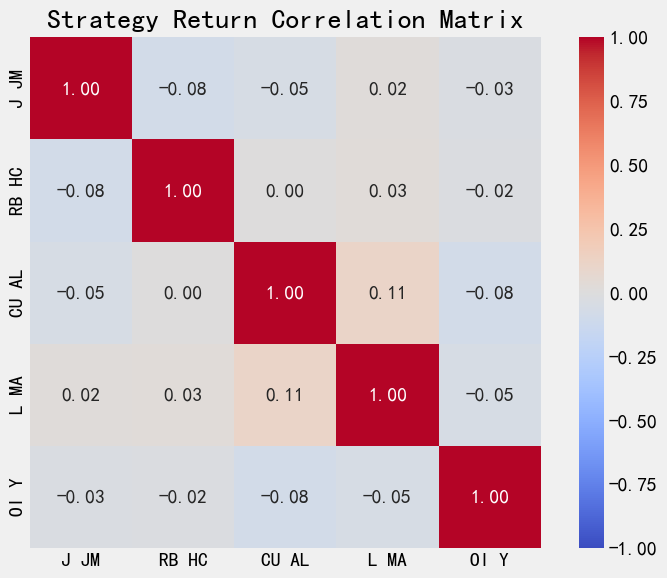


==== Equal-Weighted Portfolio ====


,Original
Cumulative Return,31.61%
Annual Return,3.63%
Annual Volatility,3.33%
Sharpe Ratio,1.09
Calmar Ratio,0.73
Max Drawdown,4.99%
Win Rate,69.48%


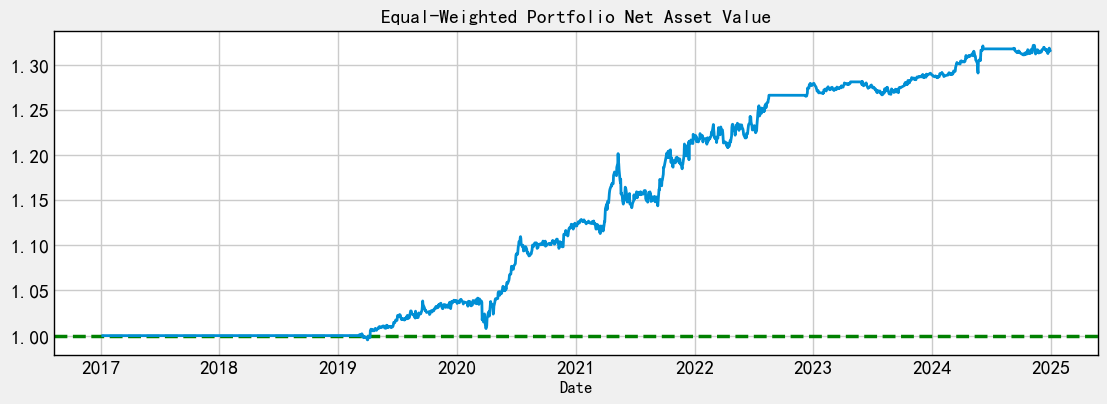


Summary Table:
 Pair  Sharpe Ratio  Annual Volatility  Annualized Return
 J JM      0.348652           0.086890           0.026880
RB HC      0.947811           0.032484           0.030728
CU AL      0.702766           0.080763           0.054930
 L MA      0.352350           0.099431           0.030563
 OI Y      0.494571           0.056688           0.026787


In [211]:
def print_pair_performance(dataframes):
    import seaborn as sns
    import matplotlib.pyplot as plt

    z_threshold = 2.25
    window_size = 252
    window_type = 'extending'
    hedge_ratio_col = 'hedge_ratio'

    pairs = [
      #  ('/C', '/CS', (10, 10), (10, 10), 'C CS'),
      #  ('/Y', '/M', (10, 10), (20, 10), 'Y M'),
      #  ('/M', '/RM', (10, 10), (10, 10), 'M RM'),
      #  ('/RU', '/AG', (10, 15), (50, 15), 'RU AG'),
      #  ('/M', '/NI', (10, 1), (10, 10), 'M NI'),
      #  ('/FG', '/HC', (20, 10), (20,10), 'FG HC'),
      #  ('/RB', '/V', (10, 5), (10, 5), 'RB V'),
        ('/J', '/JM', (100, 60), (100, 30), 'J JM'),
        ('/RB', '/HC', (10, 10), (10, 10), 'RB HC'),
        ('/CU', '/AL', (5, 5), (25, 25), 'CU AL'),
        ('/L', '/MA', (5, 10), (5, 10), 'L MA'),
        ('/OI', '/Y', (10, 10), (10, 20), 'OI Y')
    ]

    results = []
    return_series_dict = {}

    for asset1, asset2, lot_sizes, slippages, pair_name in pairs:
        spread = calculate_spread_zscore_and_plot(
            dataframes, asset1, asset2,
            window=window_size,
            window_type=window_type,
            plot=False
        )
        signals = generate_trading_signals_from_z_score(
            spread,
            lower_threshold=-z_threshold,
            upper_threshold=z_threshold,
            plot=False
        )
        bt = backtest_strategy(
            signals,
            initial_capital=5000000,
            hedge_ratio_col=hedge_ratio_col,
            sizes=lot_sizes,
            slippage_per_lot=slippages,
            pair_name=pair_name
        )

        daily_ret = bt['Daily_return']
        if 'date' in bt.columns:
            reference_date = pd.to_datetime(bt['date'])
            daily_ret.index = reference_date
        else:
            reference_date = pd.to_datetime(daily_ret.index)
            daily_ret.index = reference_date

        return_series_dict[pair_name] = daily_ret

        print(f"\n==== {pair_name} ====")
        perf = PerformanceMetrics(daily_ret)
        sharpe = perf.cal_sharpe(risk_free=0.0)
        ann_vol = daily_ret.std() * np.sqrt(252)
        ann_return = perf.calculate_annual_return()
        perf.generate_report(plot=False, plot_name=pair_name)
       # perf.generate_report(plot=True, plot_name=pair_name)
        

        results.append({
            'Pair': pair_name,
            'Sharpe Ratio': sharpe,
            'Annual Volatility': ann_vol,
            'Annualized Return': ann_return
        })

    returns_df = pd.DataFrame(return_series_dict).dropna()
    returns_df.index = pd.to_datetime(returns_df.index)
    returns_df['EqualWeighted'] = returns_df.mean(axis=1)
    returns_df.to_csv('z_score_pair_strategy_returns_equalweighted.csv')

    corr_matrix = returns_df.drop(columns='EqualWeighted').corr()
    print("\nStrategy Return Correlation Matrix:")
    print(corr_matrix.round(3))

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1, square=True)
    plt.title("Strategy Return Correlation Matrix")
    plt.tight_layout()
    plt.show()

    print("\n==== Equal-Weighted Portfolio ====")
    ew_perf = PerformanceMetrics(returns_df['EqualWeighted'])
    ew_perf.generate_report(plot=True, plot_name='Equal-Weighted Portfolio')

    results_df = pd.DataFrame(results)
    print("\nSummary Table:")
    print(results_df.to_string(index=False))
    return results_df

results_df = print_pair_performance(dataframes)
# results_df.to_csv("z_score_pair_performance_summary.csv", index=False)


#### 调整目标波动率

In [136]:
# import numpy as np
# import pandas as pd

# def print_pair_performance(dataframes):
#     z_threshold = 2.25
#     window_size = 126
#     window_type = 'extending'
#     hedge_ratio_col = 'hedge_ratio'
    
#     pairs = [
#         ('/J', '/JM', (100, 60), (100, 30), 'J JM'),
#         ('/RB', '/HC', (10, 10), (10, 10), 'RB HC'),
#         ('/CU', '/AL', (5, 5), (25, 25), 'CU AL'),
#         ('/L', '/MA', (5, 10), (5, 10), 'L MA'),
#         ('/OI', '/Y', (10, 10), (10, 20), 'OI Y'),
#         ('/CU', '/BC', (5, 5), (25, 50), 'CU BC')
#     ]

#     results = []

#     for asset1, asset2, lot_sizes, slippages, pair_name in pairs:
#         try:
#             spread = calculate_spread_zscore_and_plot(
#                 dataframes, asset1, asset2,
#                 window=window_size,
#                 window_type=window_type,
#                 plot=False
#             )
            
#             signals = generate_trading_signals_from_z_score(
#                 spread,
#                 lower_threshold=-z_threshold,
#                 upper_threshold=z_threshold,
#                 plot=False
#             )
            
#             bt = backtest_strategy(
#                 signals,
#                 initial_capital=5000000,
#                 hedge_ratio_col=hedge_ratio_col,
#                 sizes=lot_sizes,
#                 slippage_per_lot=slippages,
#                 pair_name=pair_name
#             )

#             daily_ret = bt['Daily_return']

#             # 日期处理
#             if 'date' in bt.columns:
#                 reference_date = pd.to_datetime(bt['date'])
#                 daily_ret.index = reference_date
#             else:
#                 reference_date = pd.to_datetime(daily_ret.index)

#             print(f"\n==== {pair_name} ====")
            
#             # Original strategy
#             print("\n[原始策略]")
#             perf_original = PerformanceMetrics(daily_ret)
#             perf_original.generate_report(plot=True, plot_name=f'{pair_name} 原始')
            
#             # New strategy with target volatility = 0.2
#             print("\n[目标波动率策略 (Vol=0.2)]")
#             perf_vol_adjusted = PerformanceMetrics(daily_ret)
#             perf_vol_adjusted.generate_report(
#                 plot=True, 
#                 plot_name=f'{pair_name} 目标波动率',
#                 target_vol=0.15,
#                 review=21
#             )

#             results.append({
#                 'Pair': pair_name,
#                 'Original Sharpe': perf_original.cal_sharpe(),
#                 'Original Vol': perf_original.cal_standard_deviation(),
#                 'Original AnnRet': perf_original.calculate_annual_return(),
#                 'VolAdj Sharpe': perf_vol_adjusted.cal_sharpe(),
#                 'VolAdj Vol': perf_vol_adjusted.cal_standard_deviation(),
#                 'VolAdj AnnRet': perf_vol_adjusted.calculate_annual_return()
#             })

#         except Exception as e:
#             print(f"\nError processing {pair_name}: {str(e)}")
#             results.append({
#                 'Pair': pair_name,
#                 'Original Sharpe': np.nan,
#                 'Original Vol': np.nan,
#                 'Original AnnRet': np.nan,
#                 'VolAdj Sharpe': np.nan,
#                 'VolAdj Vol': np.nan,
#                 'VolAdj AnnRet': np.nan
#             })

#     results_df = pd.DataFrame(results)
    
#     # Format the results for better display
#     formatted_results = results_df.copy()
#     for col in formatted_results.columns:
#         if col != 'Pair':
#             if 'Vol' in col or 'AnnRet' in col:
#                 formatted_results[col] = formatted_results[col].apply(
#                     lambda x: f"{x:.2%}" if not pd.isna(x) else "N/A"
#                 )
#             else:
#                 formatted_results[col] = formatted_results[col].apply(
#                     lambda x: f"{x:.2f}" if not pd.isna(x) else "N/A"
#                 )
    
#     print("\nSummary Table:")
#     print(formatted_results.to_string(index=False))
    
#     return results_df

# # === MAIN CALL ===
# pair_results = print_pair_performance(dataframes)

#### 对于固定对冲手数，测试不同z-score (hedge_ratio固定，使用产业链逻辑) 

In [212]:
# # 根据产业链逻辑，固定手数配比
# sharpe_weighted_daily_returns = None

# def optimized_pair_backtest():
#     global sharpe_weighted_daily_returns
    
#     window = 126  # Fixed window size
#     fixed_z = 2.25    # Fixed Z threshold
#     pairs = [
#         ('J_JM_data', (1, 2), (100, 60), (100, 30), 'J JM'), 
#         ('RB_HC_data', (1, 1), (10, 10), (10, 10), 'RB HC'), 
#         ('CU_AL_data', (1, 4), (5, 5), (25, 25), 'CU AL')    
#     ]

#     # Store individual pair results and daily returns
#     individual_results = []
#     daily_returns = {}
#     portfolio_metrics = {}
#     reference_date = None 

#     # Step 1: Run backtests for each pair individually
#     for df_name, ratio, size, slippage, pair_name in pairs:
#         print(f"Processing {pair_name}...")
        
#         # Calculate spread z-score
#         spread_data = calculate_spread_zscore_and_plot(
#             dataframes, 
#             f'/{pair_name.split()[0]}', 
#             f'/{pair_name.split()[1]}', 
#             window=window,
#             plot=False
#         )

#         # Generate signals
#         signal_data = generate_trading_signals_from_z_score(
#             spread_data,
#             upper_threshold=fixed_z,
#             lower_threshold=-fixed_z,
#             z_score_column='z_score',
#             plot=False,
#             pair_name=pair_name
#         )

#         # Run backtest
#         df = backtest_strategy(
#             A_B_data=signal_data,
#             initial_capital=10000000,
#             ratios=ratio,
#             sizes=size,
#             slippage_per_lot=slippage,
#             pair_name=pair_name
#         )

#         if reference_date is None:
#             if 'date' in df.columns:
#                 reference_date = df['date']
#             else:
#                 reference_date = df.index  

#         # Store results
#         performance = PerformanceMetrics(df['Daily_return'])
#         sharpe_ratio = performance.cal_sharpe(risk_free=0.0)
#         ann_vol = df['Daily_return'].std() * np.sqrt(252)
        
#         individual_results.append({
#             'Pair': pair_name,
#             'Sharpe Ratio': sharpe_ratio,
#             'Annual Volatility': ann_vol,
#             'Annualized Return': performance.calculate_annual_return()
#         })
        
#         # Store daily returns and metrics
#         daily_returns[pair_name] = df['Daily_return']
#         portfolio_metrics[pair_name] = {
#             'sharpe': sharpe_ratio,
#             'volatility': ann_vol,
#             'returns': performance.calculate_annual_return()
#         }

#     # Convert to DataFrame
#     returns_df = pd.DataFrame(daily_returns)

#     if reference_date is not None:
#         returns_df.index = reference_date

#     # Original weighting methods
#     # 1. Equal-weighted
#     returns_df['Equal_Weighted'] = returns_df.mean(axis=1)
#     equal_weighted_perf = PerformanceMetrics(returns_df['Equal_Weighted'])
    
#     # 2. Volatility-weighted (your original non-equal weighted)
#     vol_weights = pd.Series({p: 1/portfolio_metrics[p]['volatility'] for p in portfolio_metrics})
#     normalized_vol_weights = vol_weights / vol_weights.sum()
#     returns_df['Vol_Weighted'] = returns_df.multiply(normalized_vol_weights, axis=1).sum(axis=1)
#     vol_weighted_perf = PerformanceMetrics(returns_df['Vol_Weighted'])
    
#     # New weighting methods
#     # 3. Sharpe ratio weighted
#     sharpe_weights = pd.Series({p: portfolio_metrics[p]['sharpe'] for p in portfolio_metrics})
#     normalized_sharpe_weights = sharpe_weights / sharpe_weights.sum()
#     returns_df['Sharpe_Weighted'] = returns_df.multiply(normalized_sharpe_weights, axis=1).sum(axis=1)
#     sharpe_weighted_perf = PerformanceMetrics(returns_df['Sharpe_Weighted'])
    
    
#     # Generate reports for all methods
#     print("\nIndividual Pair Performance:")
#     print(pd.DataFrame(individual_results))
    
#     print("\nEqual-Weighted Portfolio Performance:")
#     equal_weighted_perf.generate_report(risk_free=0.0, plot=True, plot_name="Equal-Weighted Portfolio")
    
#     print("\nVolatility-Weighted Portfolio Performance:")
#     vol_weighted_perf.generate_report(risk_free=0.0, plot=True, plot_name="Volatility-Weighted Portfolio")
    
#     print("\nSharpe-Weighted Portfolio Performance:")
#     sharpe_weighted_perf.generate_report(risk_free=0.0, plot=True, plot_name="Sharpe-Weighted Portfolio")
    
#     sharpe_weighted_daily_returns = returns_df[['Sharpe_Weighted']].copy()
#     sharpe_weighted_daily_returns.columns = ['Sharpe_Weighted_Daily_Return']

#     return {
#         'individual_results': pd.DataFrame(individual_results),
#         'returns_dataframe': returns_df
#     }


# results = optimized_pair_backtest()

# # 保存到CSV
# sharpe_weighted_daily_returns.to_csv('sharpe_weighted_returns.csv')

# 要修改合并策略从这里开始

#### 范轩的策略

,Original
Cumulative Return,6.96%
Annual Return,0.89%
Annual Volatility,0.99%
Sharpe Ratio,0.89
Calmar Ratio,0.72
Max Drawdown,1.24%
Win Rate,49.95%


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

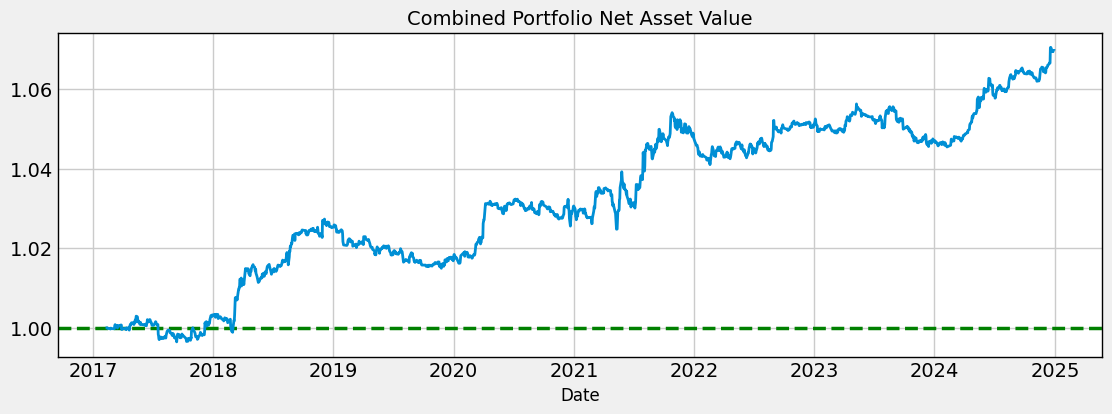

In [4]:
import pandas as pd
from pyfolio import timeseries
import matplotlib.pyplot as plt
from datetime import datetime

# 读取 CSV 文件
#==========================改下面读取的文件名字===================
file_path = "all_returns_with_equal_weight_fee.csv"
df = pd.read_csv(file_path)

date_col = df.columns[0]
return_col = df.columns[-1]

df[date_col] = pd.to_datetime(df[date_col])
df.set_index(date_col, inplace=True)

returns = df[return_col]
pm = PerformanceMetrics(returns)
pm.generate_report(risk_free=0.0, plot=True, plot_name="Combined Portfolio")
#pm.generate_report(risk_free=0.0, target_vol = 0.02, plot=True, plot_name="Combined Portfolio")

#### 合并两个策略

,Original
Cumulative Return,31.61%
Annual Return,3.63%
Annual Volatility,3.33%
Sharpe Ratio,1.09
Calmar Ratio,0.73
Max Drawdown,4.99%
Win Rate,69.48%


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

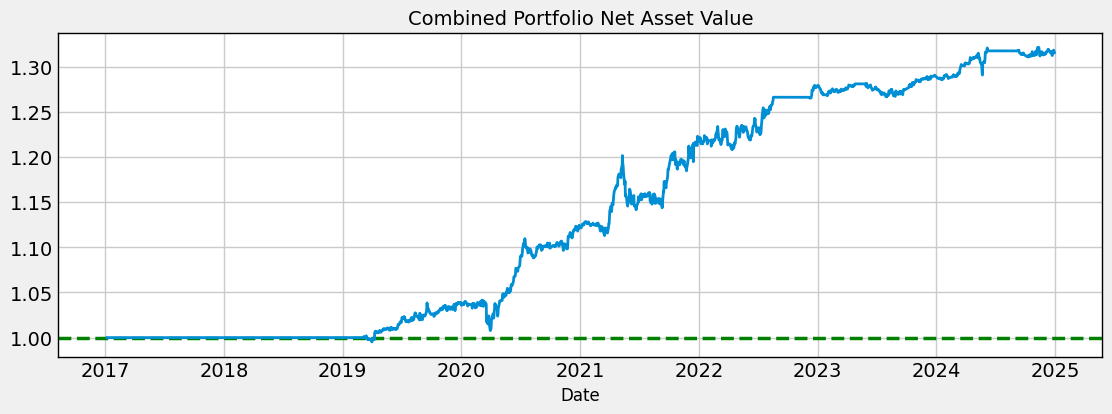

In [7]:
#=========================这里改名字读取z-score策略====================
file_path = "z_score_pair_strategy_returns_equalweighted.csv"
df2 = pd.read_csv(file_path)

date_col = df2.columns[0]
return_col = df2.columns[-1]

df2[date_col] = pd.to_datetime(df2[date_col])
df2.set_index(date_col, inplace=True)

returns_2 = df2[return_col]
pm = PerformanceMetrics(returns_2)
pm.generate_report(risk_free=0.0, plot=True, plot_name="Combined Portfolio")


df.index = pd.to_datetime(df.index)
df2.index = pd.to_datetime(df2.index)


merged_df = df.join(df2, how='right', rsuffix='_df2')

# 缺失值补 0
merged_df.fillna(0, inplace=True)


In [8]:
merged_df

,JJM,APCJ,SMSF,CCS,YP,RBI,OIY,CUBC,RBHC,AM,equal_weight_returns,J JM,RB HC,CU AL,L MA,OI Y,EqualWeighted
date,,,,,,,,,,,,,,,,,
2017-01-03,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2017-01-04,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2017-01-05,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2017-01-06,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
2017-01-09,0.000000,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-25,-0.000496,1.322450e-04,0.000000,0.0,0.000000,0.000000,0.0,0.000066,0.000743,0.0,0.000044,0.0,0.0,0.000480,-0.001042,-0.000304,-0.000173
2024-12-26,0.000000,-7.345971e-06,-0.001324,0.0,0.000000,0.000666,0.0,-0.000066,-0.000212,0.0,-0.000094,0.0,0.0,0.001777,-0.000803,0.001646,0.000524
2024-12-27,0.000000,-2.203807e-04,0.000235,0.0,0.003328,-0.000359,0.0,-0.000331,0.000000,0.0,0.000265,0.0,0.0,0.005004,0.004945,0.002138,0.002417


In [9]:
corr_value = merged_df['equal_weight_returns'].corr(merged_df['EqualWeighted'])
print("Correlation between two strategies:", corr_value)


Correlation between two strategies: 0.016990649040030153


##### 等权合并
（效果不够好）

,Original
Cumulative Return,18.78%
Annual Return,2.26%
Annual Volatility,1.74%
Sharpe Ratio,1.29
Calmar Ratio,1.02
Max Drawdown,2.21%
Win Rate,53.06%


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

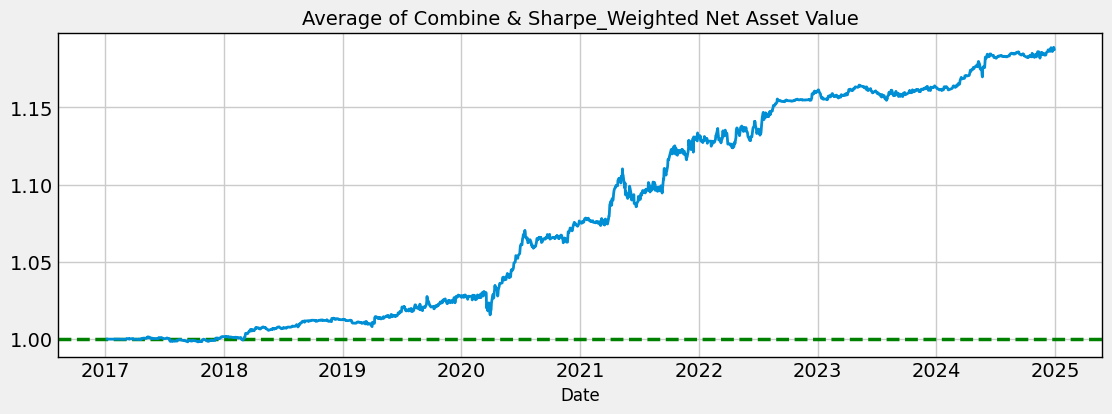

In [10]:
# Step 1: 计算平均值列
merged_df['Average_Return'] = (merged_df['EqualWeighted'] + merged_df['equal_weight_returns']) / 2

# Step 2: 调用 PerformanceMetrics 画图
pm = PerformanceMetrics(merged_df['Average_Return'])
pm.generate_report(
    risk_free=0.0,
#    target_vol= 0.03,
    plot=True,
    plot_name="Average of Combine & Sharpe_Weighted"
)


##### rolling夏普加权合并

,Original,Adjusted
Cumulative Return,36.91%,92.59%
Annual Return,4.16%,8.88%
Annual Volatility,2.22%,3.71%
Sharpe Ratio,1.84,2.31
Calmar Ratio,0.93,2.78
Max Drawdown,4.41%,3.08%
Win Rate,54.35%,54.33%


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

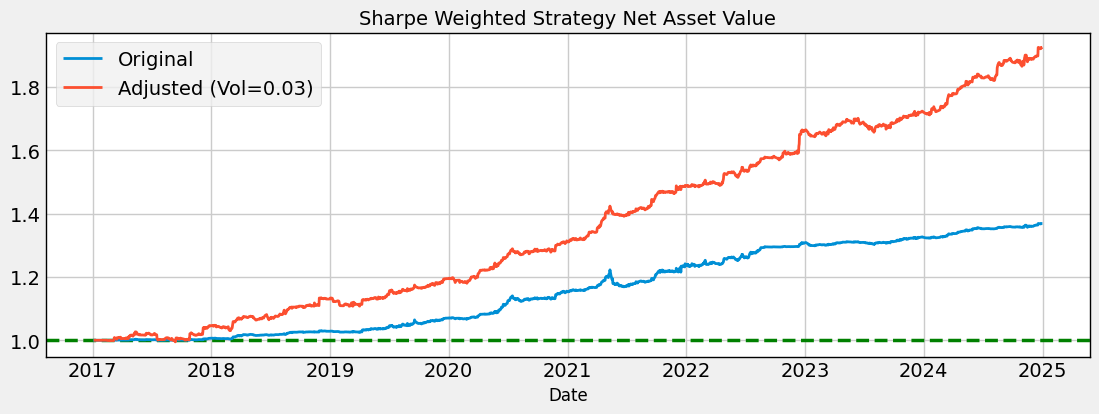

In [11]:
# Ensure SharpeWeighted is calculated
df_returns = merged_df[['EqualWeighted', 'equal_weight_returns']].copy()
window = 30
rolling_sharpes = df_returns.rolling(window).mean() / df_returns.rolling(window).std()
rolling_sharpes = rolling_sharpes.clip(lower=0).fillna(0) + 0.01
weights = rolling_sharpes.div(rolling_sharpes.sum(axis=1), axis=0)
merged_df['SharpeWeighted'] = (df_returns * weights).sum(axis=1)


# Generate performance report and plot using PerformanceMetrics
sharpe_perf = PerformanceMetrics(merged_df['SharpeWeighted'])

#============================下面的target_vol可以调整============
sharpe_perf.generate_report(plot=True, target_vol = 0.03, plot_name='Sharpe Weighted Strategy')

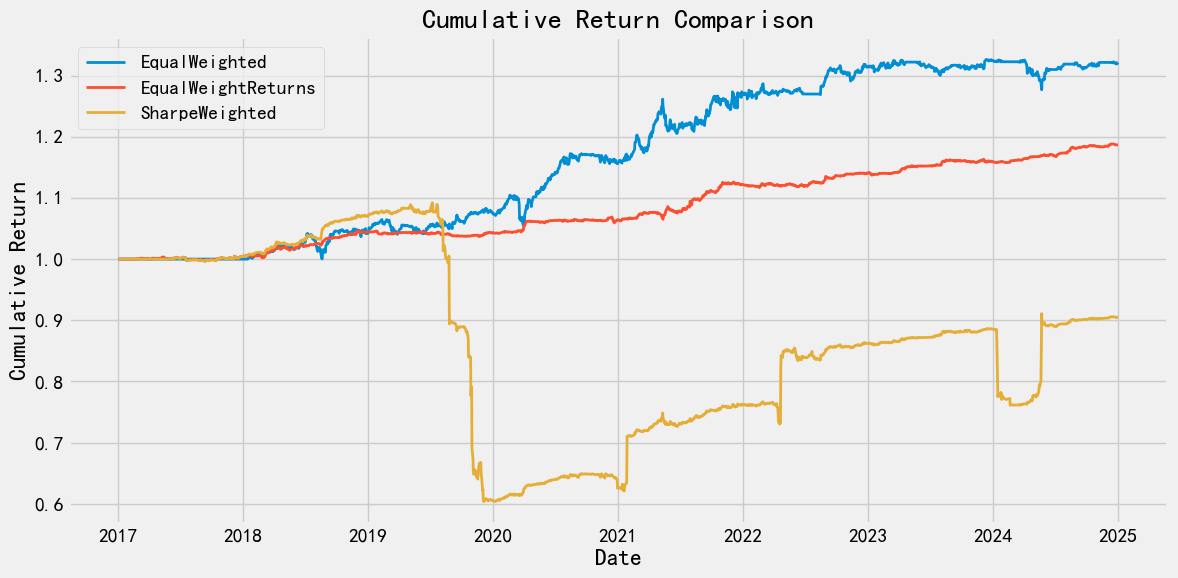

In [47]:
# extending
# window_size = 126
# window_type = 'extending'
# z_threshold = 1.5
# lower_threshold = -z_threshold

# pairs = [
#     ('/J', '/JM'),
#     ('/C', '/CS'),
#     ('/Y', '/M'),
#     ('/CU', '/AL'),
#     ('/AG', '/RU'),
#     ('/L', '/MA')
# ]

# returns = []

# for asset1, asset2 in pairs:
#     spread_data = calculate_spread_zscore_and_plot(
#         dataframes, asset1, asset2, window=window_size, window_type=window_type, plot=False
#     )
#     spread_data = generate_trading_signals_from_z_score(
#         spread_data,
#         lower_threshold=-z_threshold, upper_threshold=z_threshold,
#         lower_close_threshold=0, upper_close_threshold=0,
#         z_score_column='z_score', plot=False
#     )
#     spread_data = calculate_daily_returns(spread_data)
#     returns.append(spread_data['Return'])

# combined_return = pd.concat(returns, axis=1).mean(axis=1)

# RB_HC_data = calculate_spread_zscore_and_plot(
#     dataframes, '/RB', '/HC', window=window_size, window_type=window_type, plot=False
# )
# combined_return.index = RB_HC_data['date']

# PerformanceMetrics(combined_return).generate_report(
#     risk_free=0.00, plot=True, plot_name="Equal Weighted Combined Strategy (Z=±1.5)"
# )

# test 国际铜（忽略这个）

In [48]:
# import pandas as pd
# import numpy as np

# def generate_zscore_tuning_table(dataframes, hedge_ratio_col='hedge_ratio'):
#     """Generate Sharpe tuning table and draw performance plots for each Z threshold"""
#     pairs = [
#         ('/CU', '/BC', (5, 5), (25, 50), 'CU BC')
#     ]

#     z_thresholds = np.arange(1.0, 2.6, 0.25).round(2)
#     results = []

#     for upper_threshold in z_thresholds:
#         for asset1, asset2, lot_sizes, slippages, pair_name in pairs:
#             print(f"Running backtest for {pair_name} with Z=[{upper_threshold}, {-upper_threshold}]...")

#             # Generate spread and signals
#             spread = calculate_spread_zscore_and_plot(dataframes, asset1, asset2, plot=False)
#             signals = generate_trading_signals_from_z_score(
#                 spread,
#                 lower_threshold=-upper_threshold,
#                 upper_threshold=upper_threshold,
#                 plot=False
#             )

#             # Run backtest
#             bt = backtest_strategy(
#                 signals,
#                 hedge_ratio_col=hedge_ratio_col,
#                 sizes=lot_sizes,
#                 slippage_per_lot=slippages,
#                 pair_name=pair_name
#             )

#             # Calculate Sharpe
#             perf = PerformanceMetrics(bt['Daily_return'])
#             sharpe = perf.cal_sharpe(risk_free=0.0)

#             # Plot performance
#             perf.generate_report(risk_free=0.0, plot=True, plot_name=f"{pair_name} Z={upper_threshold}")

#             # Record result
#             results.append({
#                 'Pair': pair_name,
#                 'Z_threshold': f"[{upper_threshold},{-upper_threshold}]",
#                 'Sharpe': sharpe
#             })

#     # Make pivot table
#     df = pd.DataFrame(results)
#     pivot_table = df.pivot(index='Pair', columns='Z_threshold', values='Sharpe')

#     # Coloring logic
#     def color_sharpe(val):
#         if pd.isna(val): return ''
#         max_abs_val = max(abs(val), 1e-6)
#         normalized_val = val / max_abs_val
#         if normalized_val >= 0:
#             r = 1.0
#             g = 1.0 - normalized_val
#             b = 1.0 - normalized_val
#         else:
#             r = 1.0 + normalized_val
#             g = 1.0
#             b = 1.0 + normalized_val
#         color = '#%02x%02x%02x' % (
#             int(r * 255),
#             int(g * 255),
#             int(b * 255)
#         )
#         return f'color: {color}'

#     styled_table = pivot_table.style\
#         .applymap(color_sharpe)\
#         .format("{:.2f}")\
#         .set_caption("CU-BC Sharpe Ratio by Z-score Threshold")\
#         .set_properties(**{
#             'text-align': 'center',
#             'font-size': '11pt',
#             'font-weight': 'bold',
#             'border': '1px solid black',
#             'background-color': 'white'
#         })

#     return styled_table

# # Run and show
# tuning_table = generate_zscore_tuning_table(dataframes)
# tuning_table


# test